# Clustering

Clustering o agrupamiento es una estrategia de aprendizaje no supervisado en el cual se agrupan elementos que presentan características **similares**.

### Ejemplo:

Tenemos los siguientes serer vivos:
* vaca
* calamar
* perro
* sepia
* petunia
* ornitorrinco
* abeto
* naranjo

Queremos clasificarlos en **3 grupos** basándonos en sus características. Una posible clasificación sería:
* Grupo 1: vaca, perro, ornitorrinco
* Grupo 2: calamar, sepia
* Grupo 3: abeto, naranjo, petunia

Podemos hacer una clasificación jerárquica basada en similitudes:


![](img/organismos.png)

## Distancias

Antes de podes agrupar elementos por su similitud tenemos que definir la *similitud*. Para ello vamos a crear una media de la diferencia, de como de separados están dos elementos del grupo. Ejemplos de distancias:
* Distancia Euclídea: $L_2$=$\left \|  \vec{a}-\vec{b} \right \|_2 = \sqrt{\sum_i \left ( a_i-b_i \right )^2}$
* Distancia Manhattan: $L_1$=$\left \|  \vec{a}-\vec{b} \right \| =  \sum_i \left \| a_i-b_i \right \| $
* Distancia Minkowsky: $\left \|  \vec{a}-\vec{b} \right \|_p = \left ( \sum_i \mid a_i-b_i \mid^p \right )^\frac{1}{p}$
![](img/distancia.png)

Distancia con textos:
* Distancia Hamming: La distancia de hamming entre dos cadenas de igual longitud es el número de posiciones en el cual los simbolos son diferentes.
* Distancia Levenshtein: La distancia Levenshtein entre dos palabras es el mínimo número de ediciones de un solo caracter (inserción, eliminación o sustitución) para que las dos palabras sean iguales.


Más sobre distancias:

https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa

## Métodos de clustering

### Particionado

#### K-means

Se basa en centroides. El centroide o centro geométrico es el punto resultante de la media aritmética de la posición de todos los puntos.


```
1 - elige k centroides al azar
2 - asigna el elemento al centroide más cercano
3 - recalcular centroides
4 - Repetir desde 2 mientras los centroides se sigan actualizando.
```

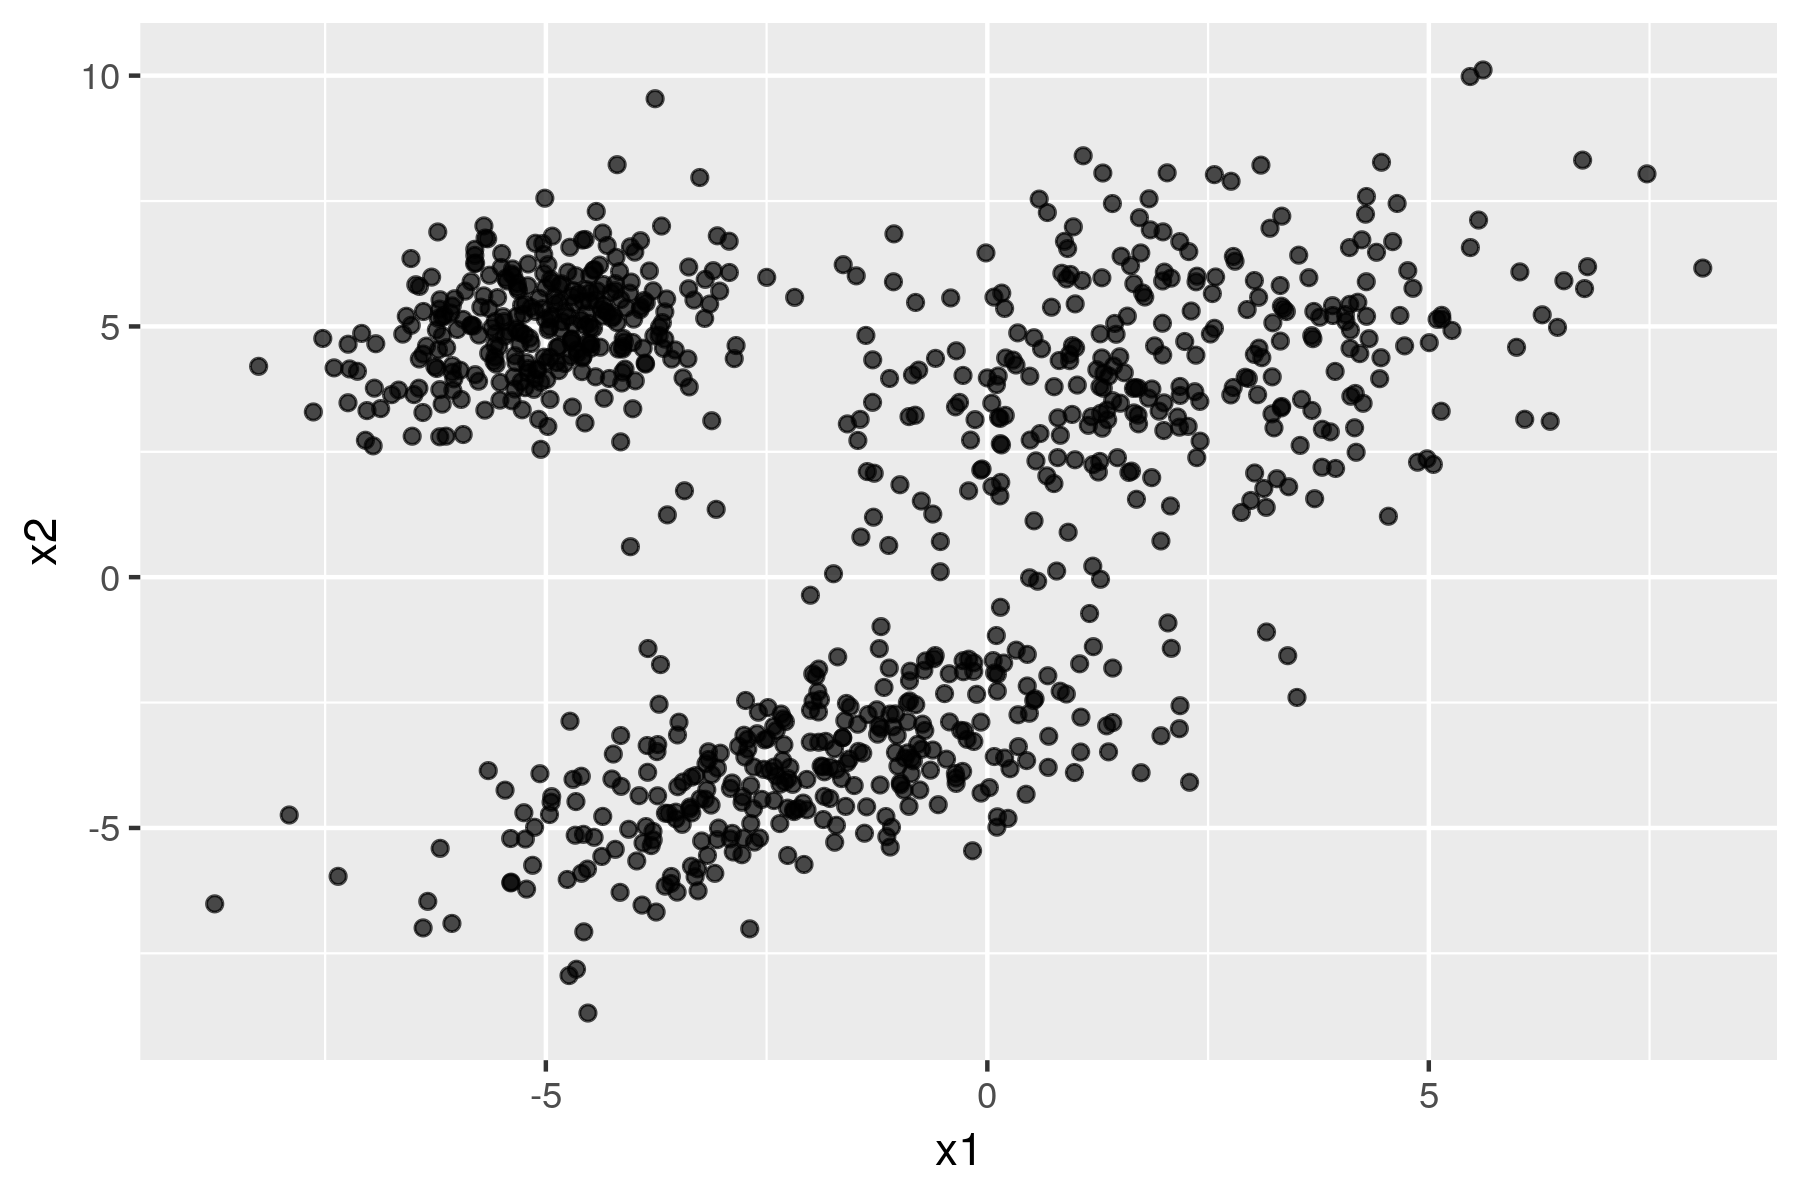

In [2]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)


N<-300
x1<-c(rnorm(N,mean=2,sd=2),rnorm(N,mean=-2,sd=2),rnorm(N,mean=-5,sd=1))
x2<-c(0.4*x1+c(rnorm(N,mean=3,sd=2),rnorm(N,mean=-3,sd=1),rnorm(N,mean=7,sd=1)))
df<-data.frame(x1,x2)

library(ggplot2)
ggplot(data=df, aes(x=x1,y=x2))+geom_point(alpha=0.7)

x1 x2
1 1  1 
2 2  1 
3 3  1

x1        x2      
1 -2.942327 1.098339
2  1.962734 3.578740
3  4.112708 4.675315

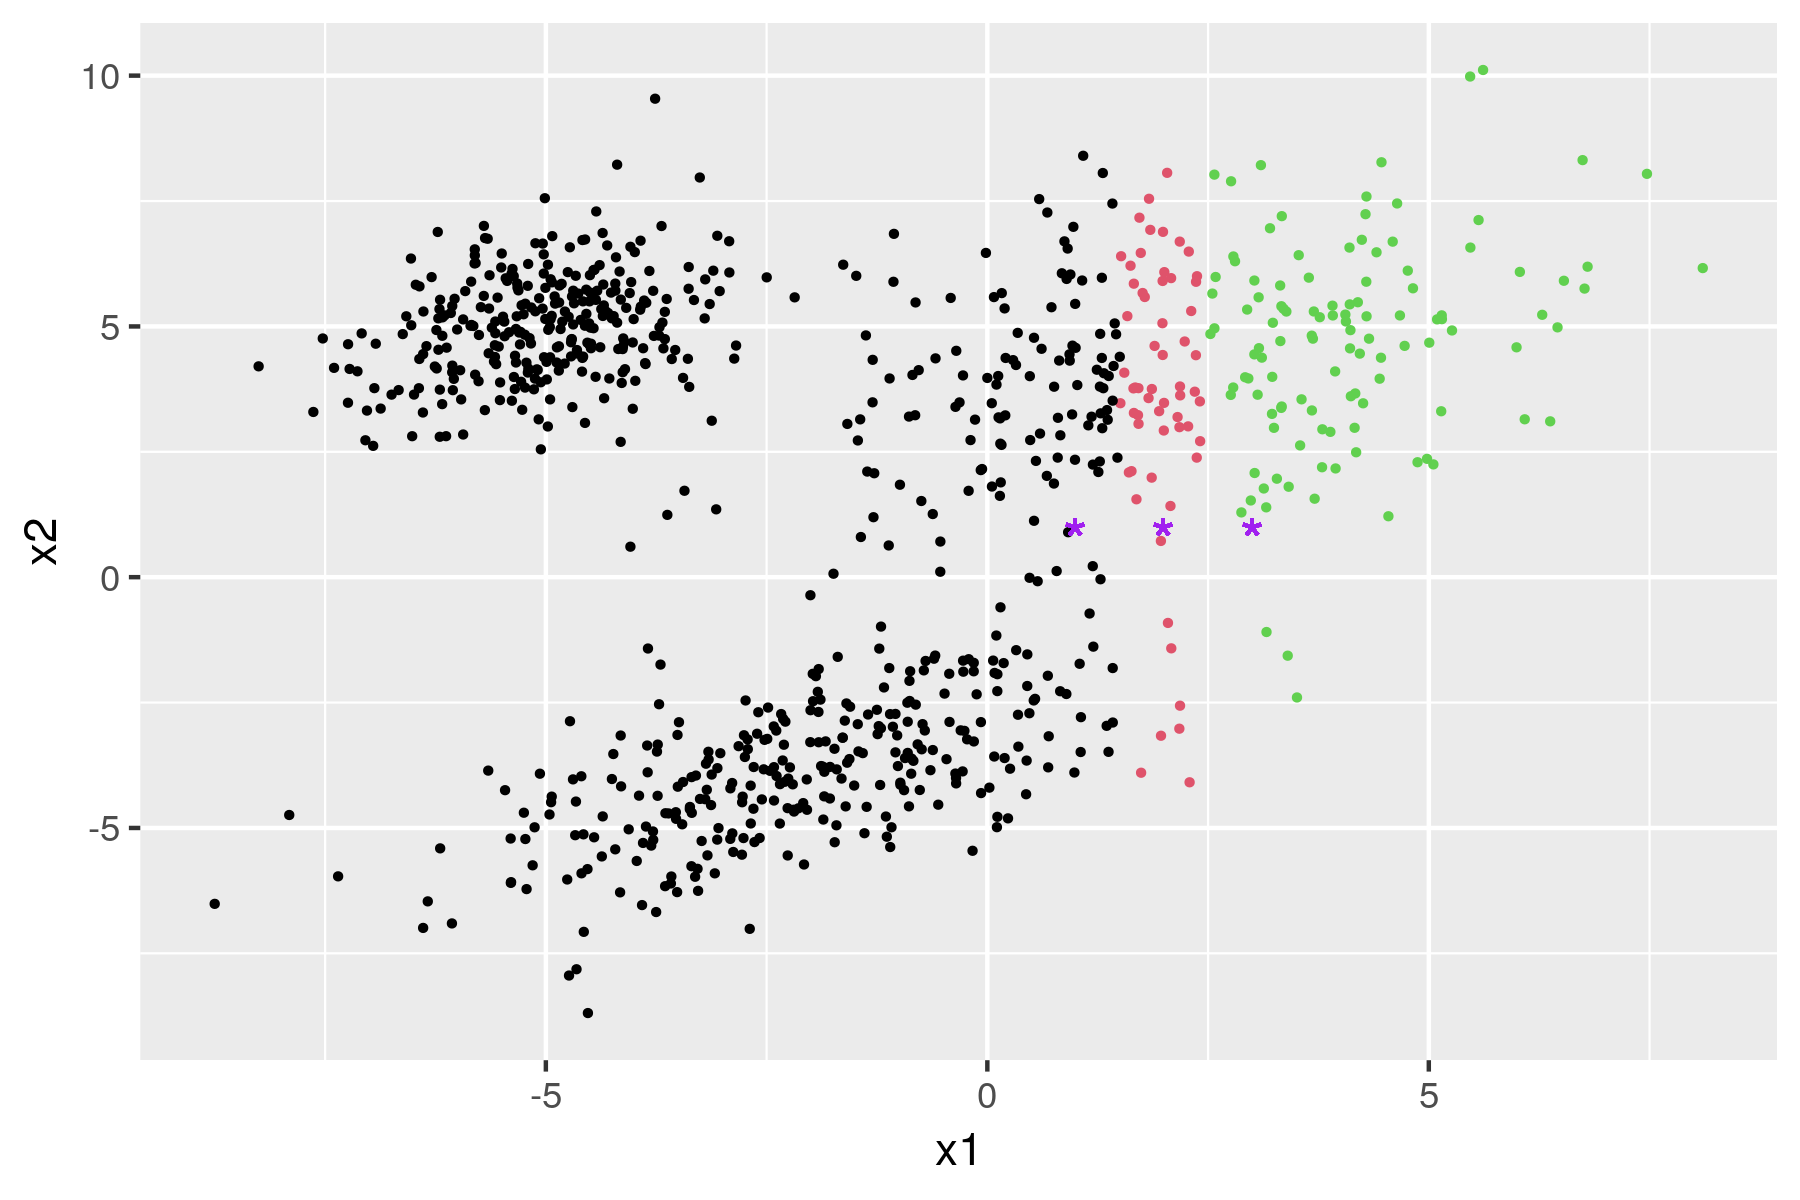

In [3]:
mydistance<-function(v1,v2){
        sqrt((v1[1]-v2[1])^2+(v1[2]-v2[2])^2)
}

assign_points_to_centroid<-function(mydata,centroids){        
    group<-rep(NA,nrow(mydata))
    for (i in 1:nrow(mydata)){
        distance_to_centroids<-rep(NA,nrow(centroids))
        for (j in 1:nrow(centroids)){
            distance_to_centroids[j]<-mydistance(mydata[i,],centroids[j,])
        }        
        group[i]<-which.min(distance_to_centroids)
    }   
    group
}

get_new_centroids<-function(mydata,group){
    k<-length(unique(group))
    centroids<-data.frame(x1=rep(NA,k),x2=rep(NA,k))
    for (i in 1:k){
        idx<-which(i == group)        
        centroids[i,]<-colMeans(mydata[idx,])
    }
    centroids
}

plot_all<-function(mydata,centroids,group){
    mydata$group<-factor(group)
    mydata$centroidx1<-centroids$x1[group]
    mydata$centroidx2<-centroids$x2[group]
    ggplot(data=mydata,aes(x=x1,y=x2))+geom_point(color=group,size=0.5)+
        geom_point(aes(x=centroidx1,y=centroidx2),shape="*",size=5,color="purple")
}


#centroids<-data.frame(x1=c(1,2),x2=c(1,1))
centroids<-data.frame(x1=c(1,2,3),x2=c(1,1,1))
centroids
group<-assign_points_to_centroid(df,centroids)
plot_all(df,centroids,group)

centroids<-get_new_centroids(df,group)
centroids

In [5]:
#i1 <- 5
#i2 <- 7
#sqrt((df$x1[i1]-df$x1[i2])+(df$x2[i1]-df$x2[i2]))

[1] 2.180154

Este algorimo lo implementa R:
```
kmeans(data.frame, k)
```

In [13]:
myclust<-kmeans(df,3)
print("Los centroides son")
myclust$centers
#myclust$cluster

[1] "Los centroides son"


x1        x2       
1 -2.001599 -3.760418
2 -4.959681  4.965032
3  2.207273  4.317349

In [14]:
#myclust$cluster

In [15]:
myclust$centers[,"x2"]

1         2         3 
-3.760418  4.965032  4.317349

In [16]:
str(myclust)

List of 9
 $ cluster     : int [1:900] 3 2 3 3 3 3 3 3 3 3 ...
 $ centers     : num [1:3, 1:2] -2 -4.96 2.21 -3.76 4.97 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:2] "x1" "x2"
 $ totss       : num 26734
 $ withinss    : num [1:3] 1889 764 1986
 $ tot.withinss: num 4639
 $ betweenss   : num 22095
 $ size        : int [1:3] 314 308 278
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [17]:
table(myclust$cluster)
#myclust$cluster


  1   2   3 
314 308 278 

       x1               x2         group     centroidx1       centroidx2    
 Min.   :-8.751   Min.   :-8.690   1:314   Min.   :-4.960   Min.   :-3.760  
 1st Qu.:-4.581   1st Qu.:-2.965   2:308   1st Qu.:-2.002   1st Qu.:-3.760  
 Median :-2.192   Median : 3.589   3:278   Median :-2.002   Median :-3.760  
 Mean   :-1.714   Mean   : 1.721           Mean   :-1.661   Mean   :-2.147  
 3rd Qu.: 0.911   3rd Qu.: 5.196           3rd Qu.:-2.002   3rd Qu.:-3.760  
 Max.   : 8.103   Max.   :10.113           Max.   : 2.207   Max.   : 4.965  

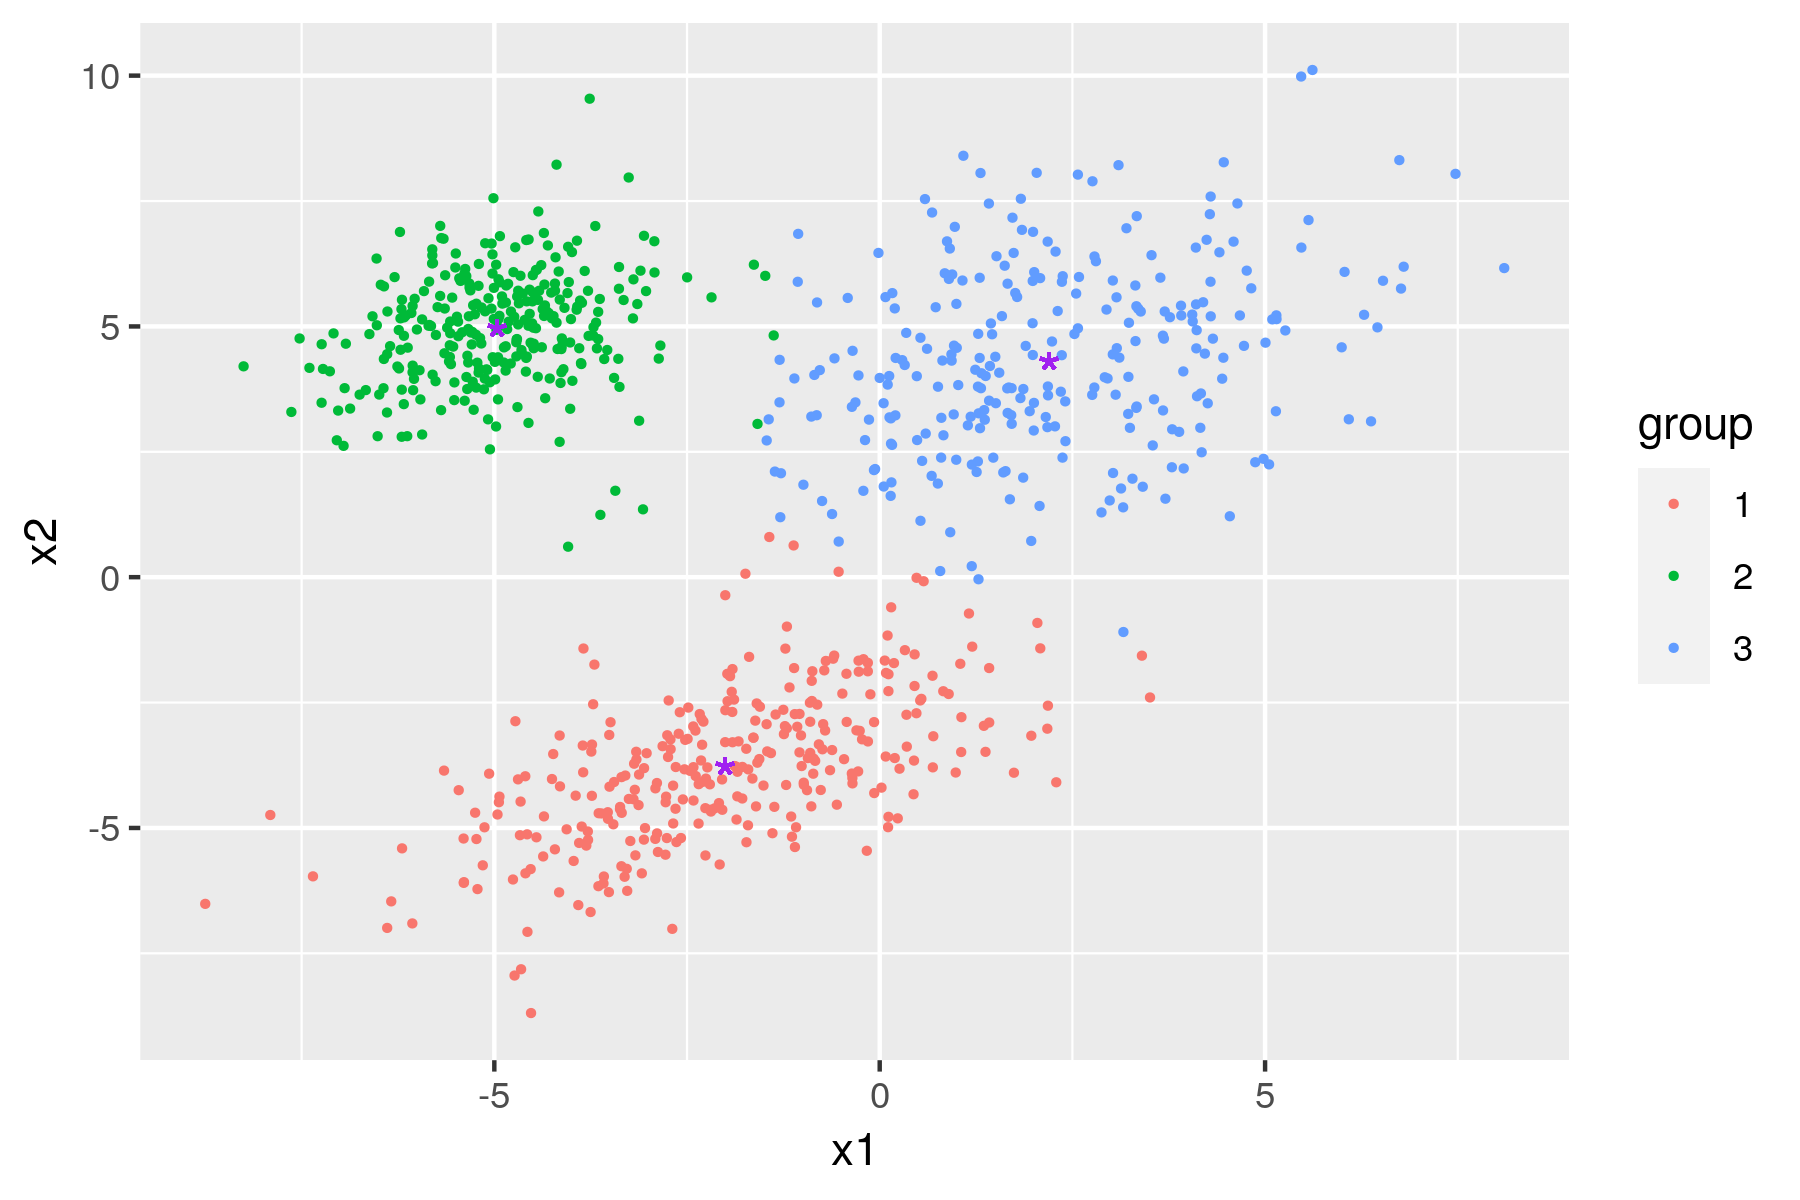

In [18]:
cl<-factor(myclust$cluster)

clustered<-cbind(df,group=cl)
clustered$centroidx1<-myclust$centers[group,"x1"]
clustered$centroidx2<-myclust$centers[group,"x2"]
ggplot(data=clustered,aes(x=x1,y=x2))+geom_point(aes(color=group),size=0.5)+
    geom_point(aes(x=centroidx1,y=centroidx2),shape="*",size=5,color="purple")

summary(clustered)


### Medidas de la calidad de un cluster

Un cluster tiene que cumplir dos propiedades:
* Los elementos dentro de un mismo grupo tienen que estar lo más cerca posible entre si. La distancia media *intracluster* tiene que ser baja.
![](img/intragrupo.png)

* Los elementos de distintos grupos tienen que estar lo más lejos posibles uno de otro. La distancia media *intercluster* tiene que ser alta.
![](img/intergrupo.png)


Una forma de medirlo es con el SSE (Sum Square Errors).

* $SSE_{intra}$: Se define para cada grupo. Es la suma de distancias al cuadrado entre los puntos de un cluster y el centroide.
* $SSE_{inter}$: Se define para todos. Es la suma de las distancias al cuadrado entre los centroides de un cluster (ponderado al número de elementos del cluster) y el centroide de los centroides.
* $SSE_{total}$: $SSE_{inter}$+$\sum SSE_{intra}$

Una forma de medir la calidad de un cluster es el ratio:
\\[
\frac{SSE_{inter}}{SSE_{total}}=\frac{SSE_{inter}}{SSE_{inter}+\sum SSE_{intra}}
\\]
Cuanto más cercano a 1, mejor es la división entre clusters

In [36]:
paste("SSE intra:", paste(round(myclust$withinss),collapse=", "))
paste("SSE inter:", myclust$betweenss)
paste("SSE total:", myclust$totss)
paste("SSE total:", sum(myclust$withinss)+myclust$betweenss)
paste("Ratio:", myclust$betweenss/myclust$totss)

[1] "SSE intra: 1909, 1665, 836"

[1] "SSE inter: 21919.7642394907"

[1] "SSE total: 26329.8833399173"

[1] "SSE total: 26329.8833399173"

[1] "Ratio: 0.832505178868733"

In [34]:
sse_per_cluser<-function(mydata_all,group,centroids){
    ssq<-rep(NA,nrow(centroids))
    for (k in 1:nrow(centroids)){
        mydata<-mydata_all[group==k,]
        h<-0
        for (i in 1:nrow(mydata)){            
            h<-h+sum((mydata[i,]-centroids[k,])^2)
        }        
        ssq[k]<-h
    }
    ssq
}
#sse_per_cluser(df,group,centroids)
sse_per_cluser(df,myclust$cluster,myclust$centers)

[1] 1909.1424 1665.0996  835.8771

In [35]:
sse_betweeness<-function(group,centroids){
    sum((centroids[group,1]-mean(centroids[group,1]))^2)+
    sum((centroids[group,2]-mean(centroids[group,2]))^2)
}
#sse_betweeness(group,centroids)
sse_betweeness(myclust$cluster,myclust$centers)

[1] 21919.76

### Determinando el número óptimo de clusters para k-means

No existe una regla fija para determinar el número de grupos. Podemos pintar como evoluciona el error cuadrádico y cuando deje de mejorar rápidamente establecer como el número de clusters.

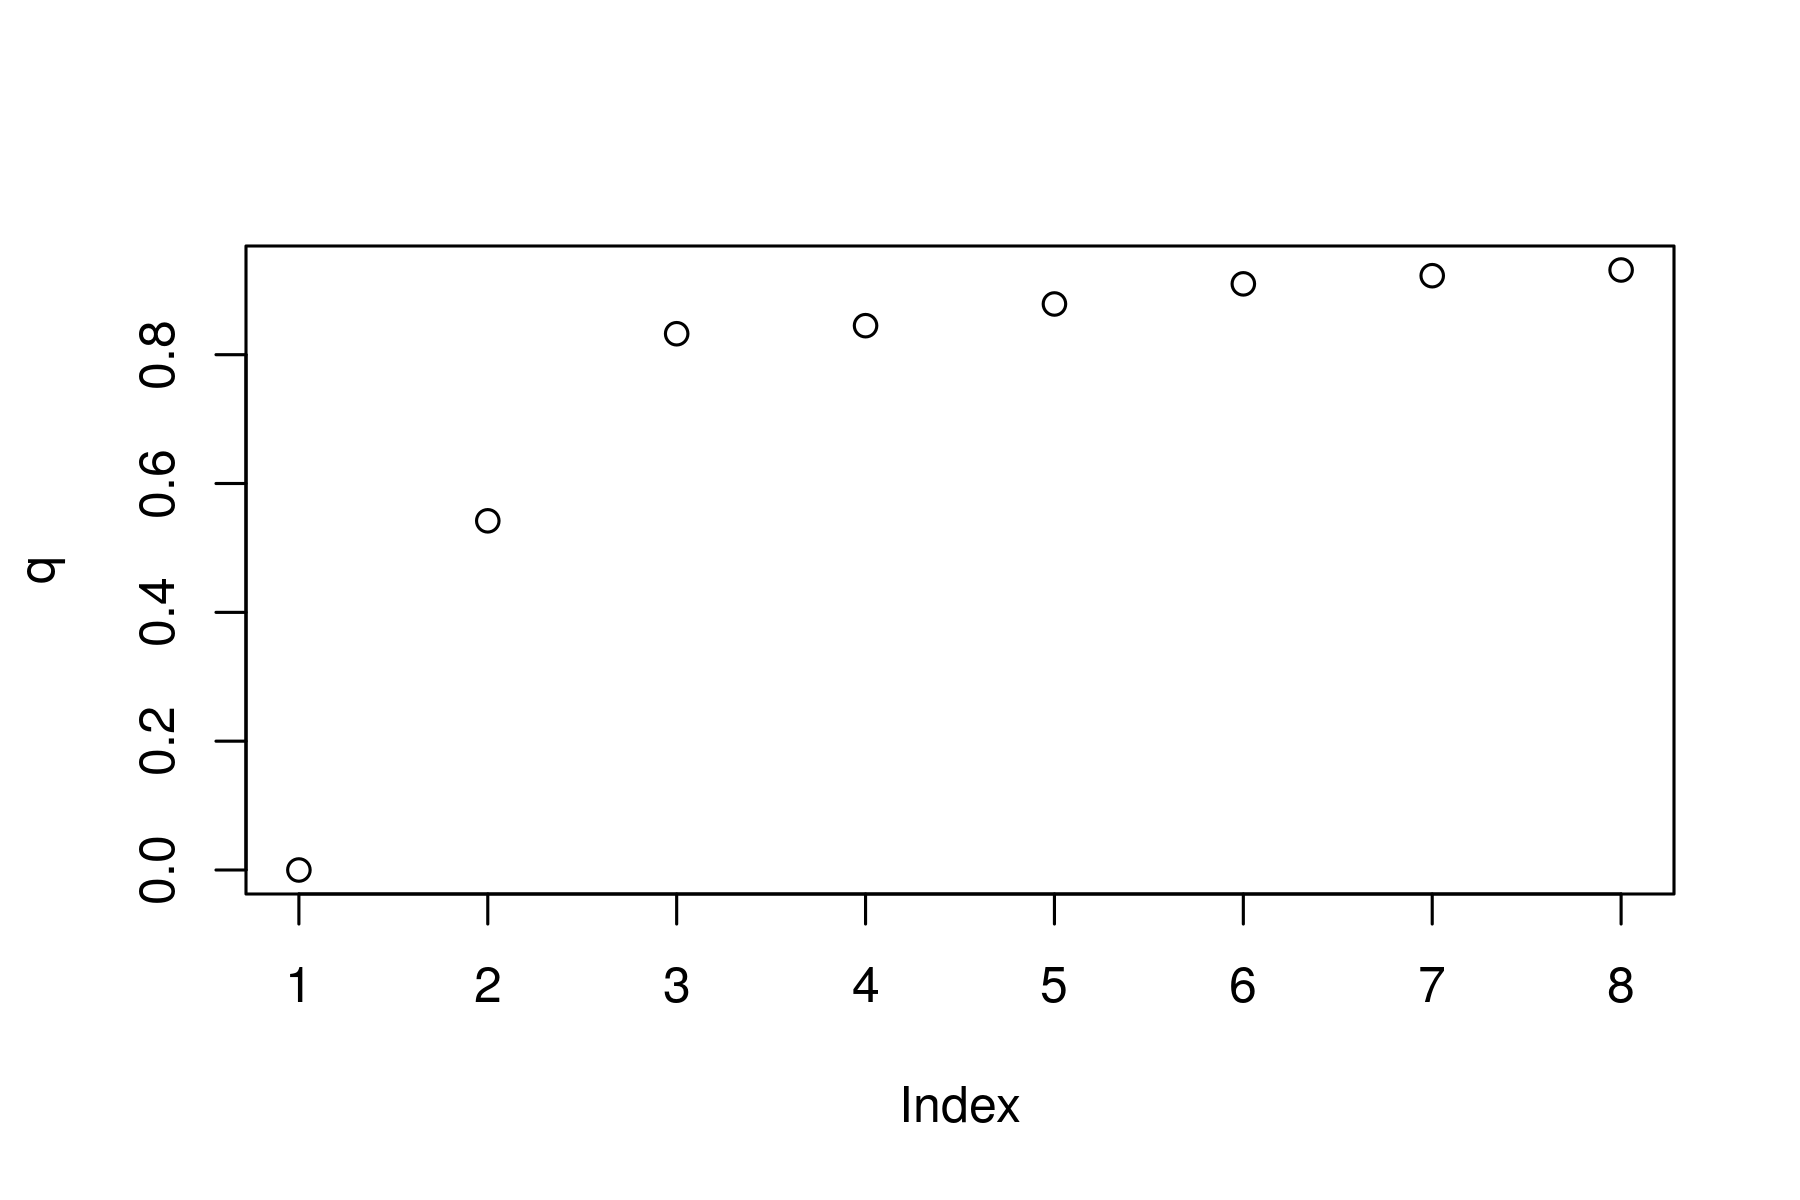

In [37]:
q<-c()
for (k in 1:8){
    myclust<-kmeans(df,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

Otra forma es mirando $\sum SSE_{intra}$:

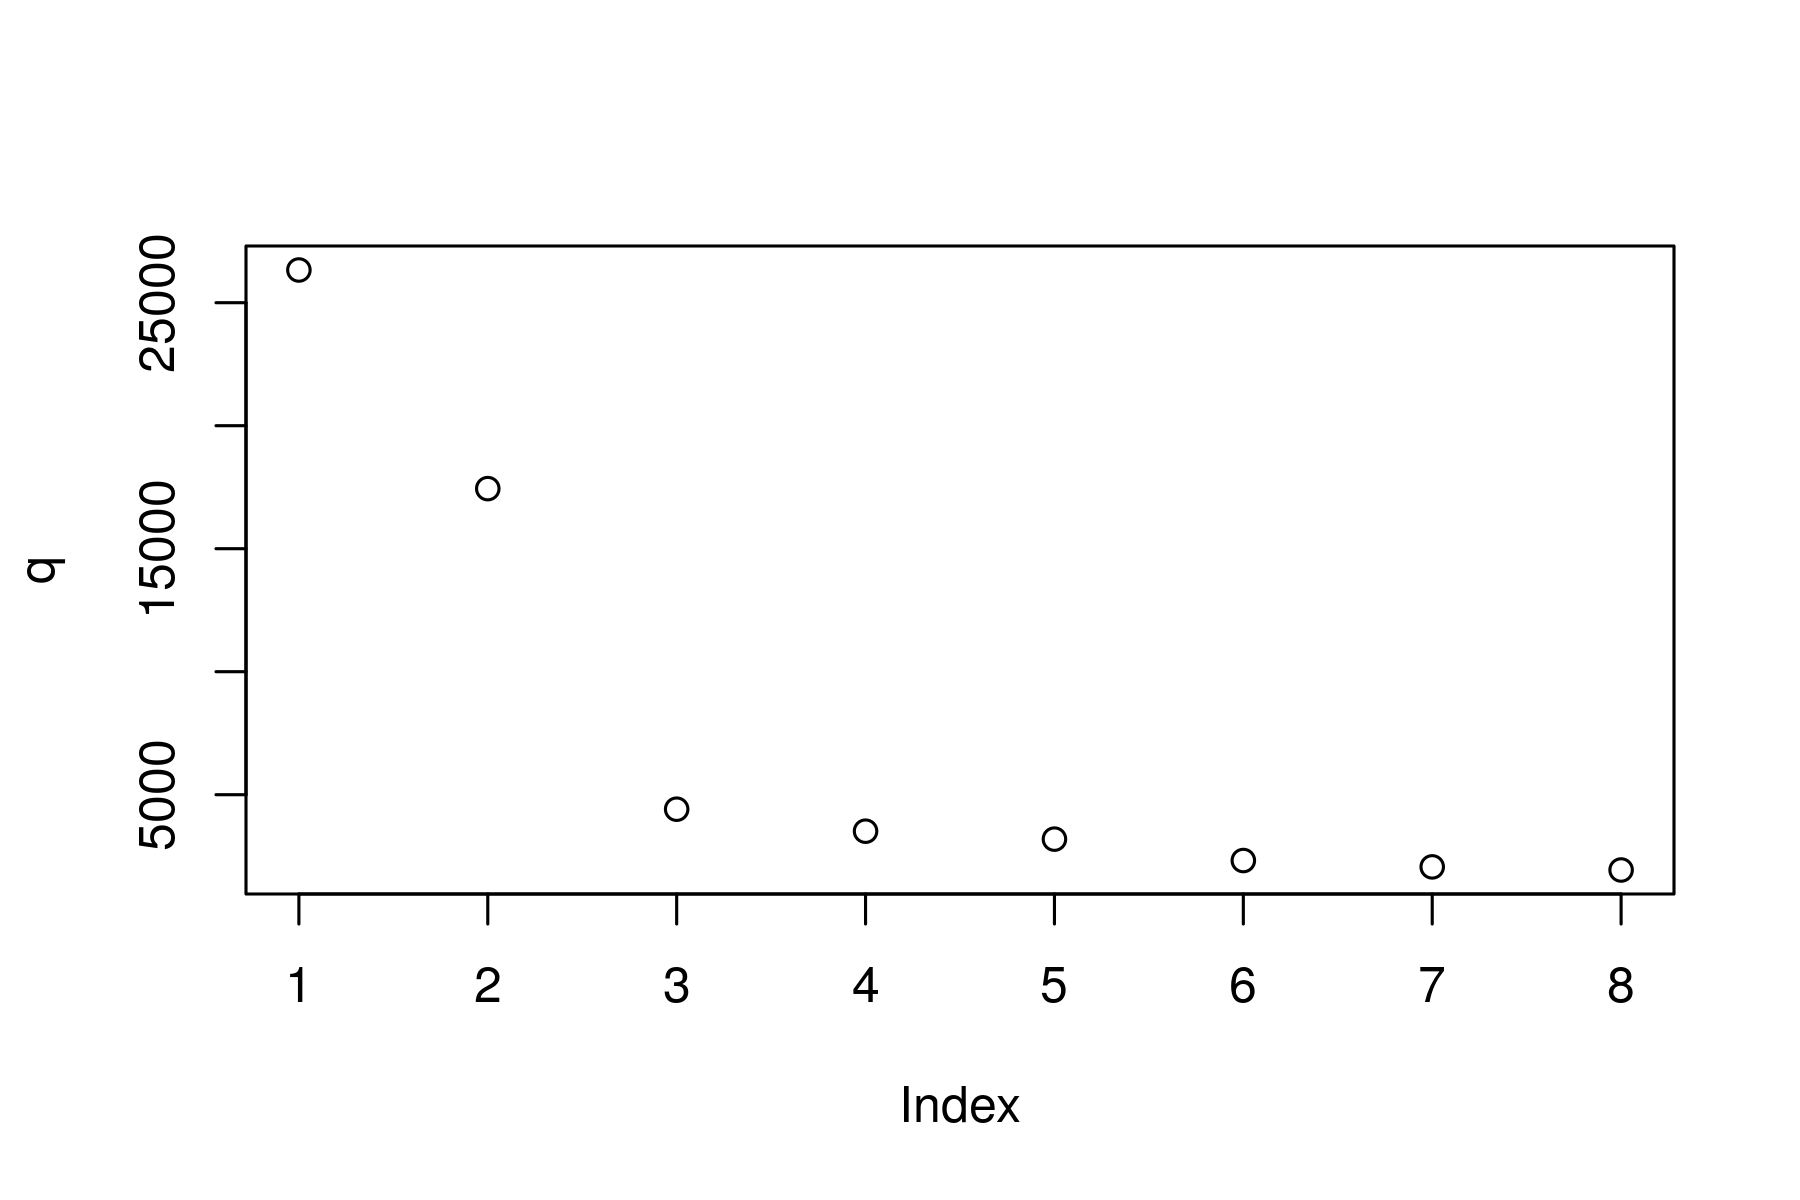

In [38]:
q<-c()
for (k in 1:8){
    myclust<-kmeans(df,k)
    q[k]<-sum(myclust$withinss)
}
plot(q)

#### Ejemplo Iris

Conjunto de datos de iris (de Fisher o Anderson) da las medidas en centímetros de las variables longitud y ancho del sépalo y longitud y ancho del pétalo, respectivamente, para 50 flores de cada una de las 3 especies de iris. Las especies son Iris setosa, versicolor y virginica.

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

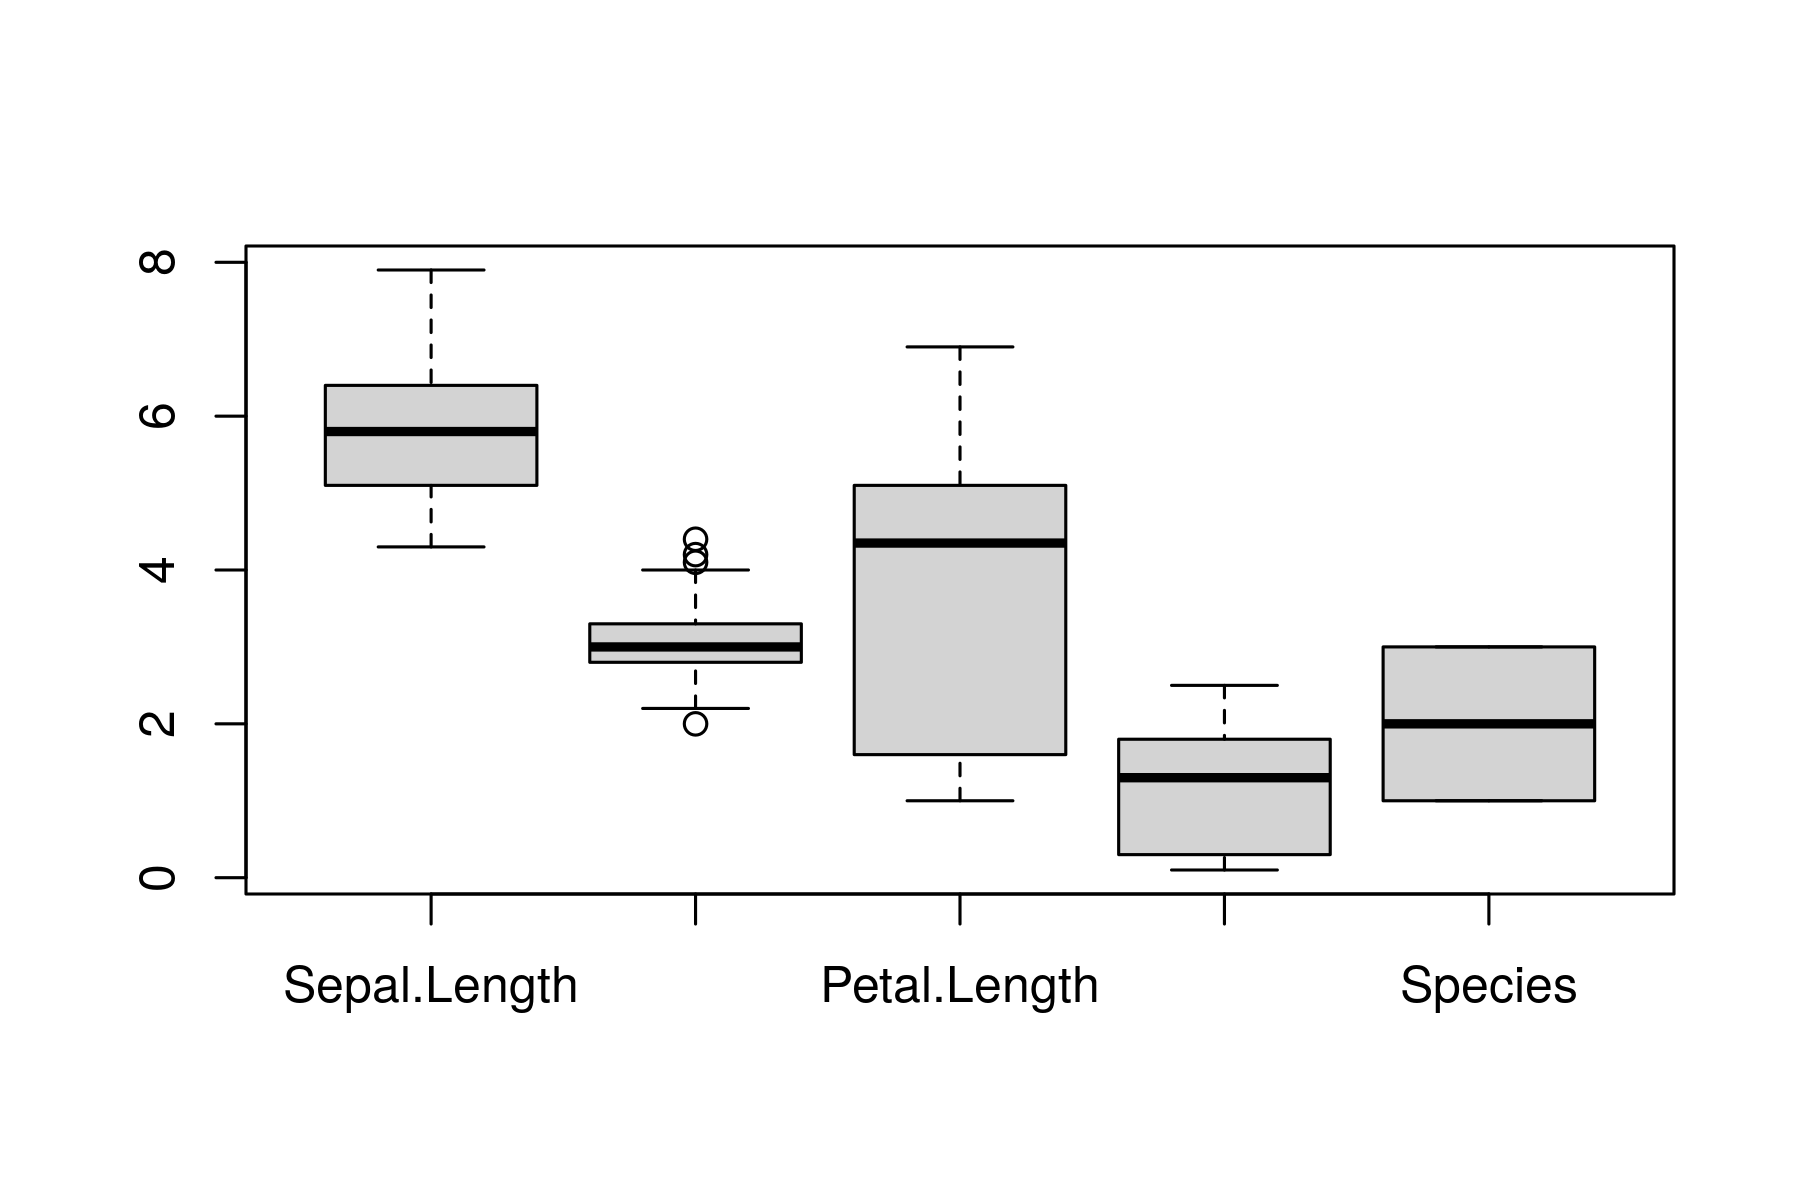

In [30]:
boxplot(iris)
summary(iris)

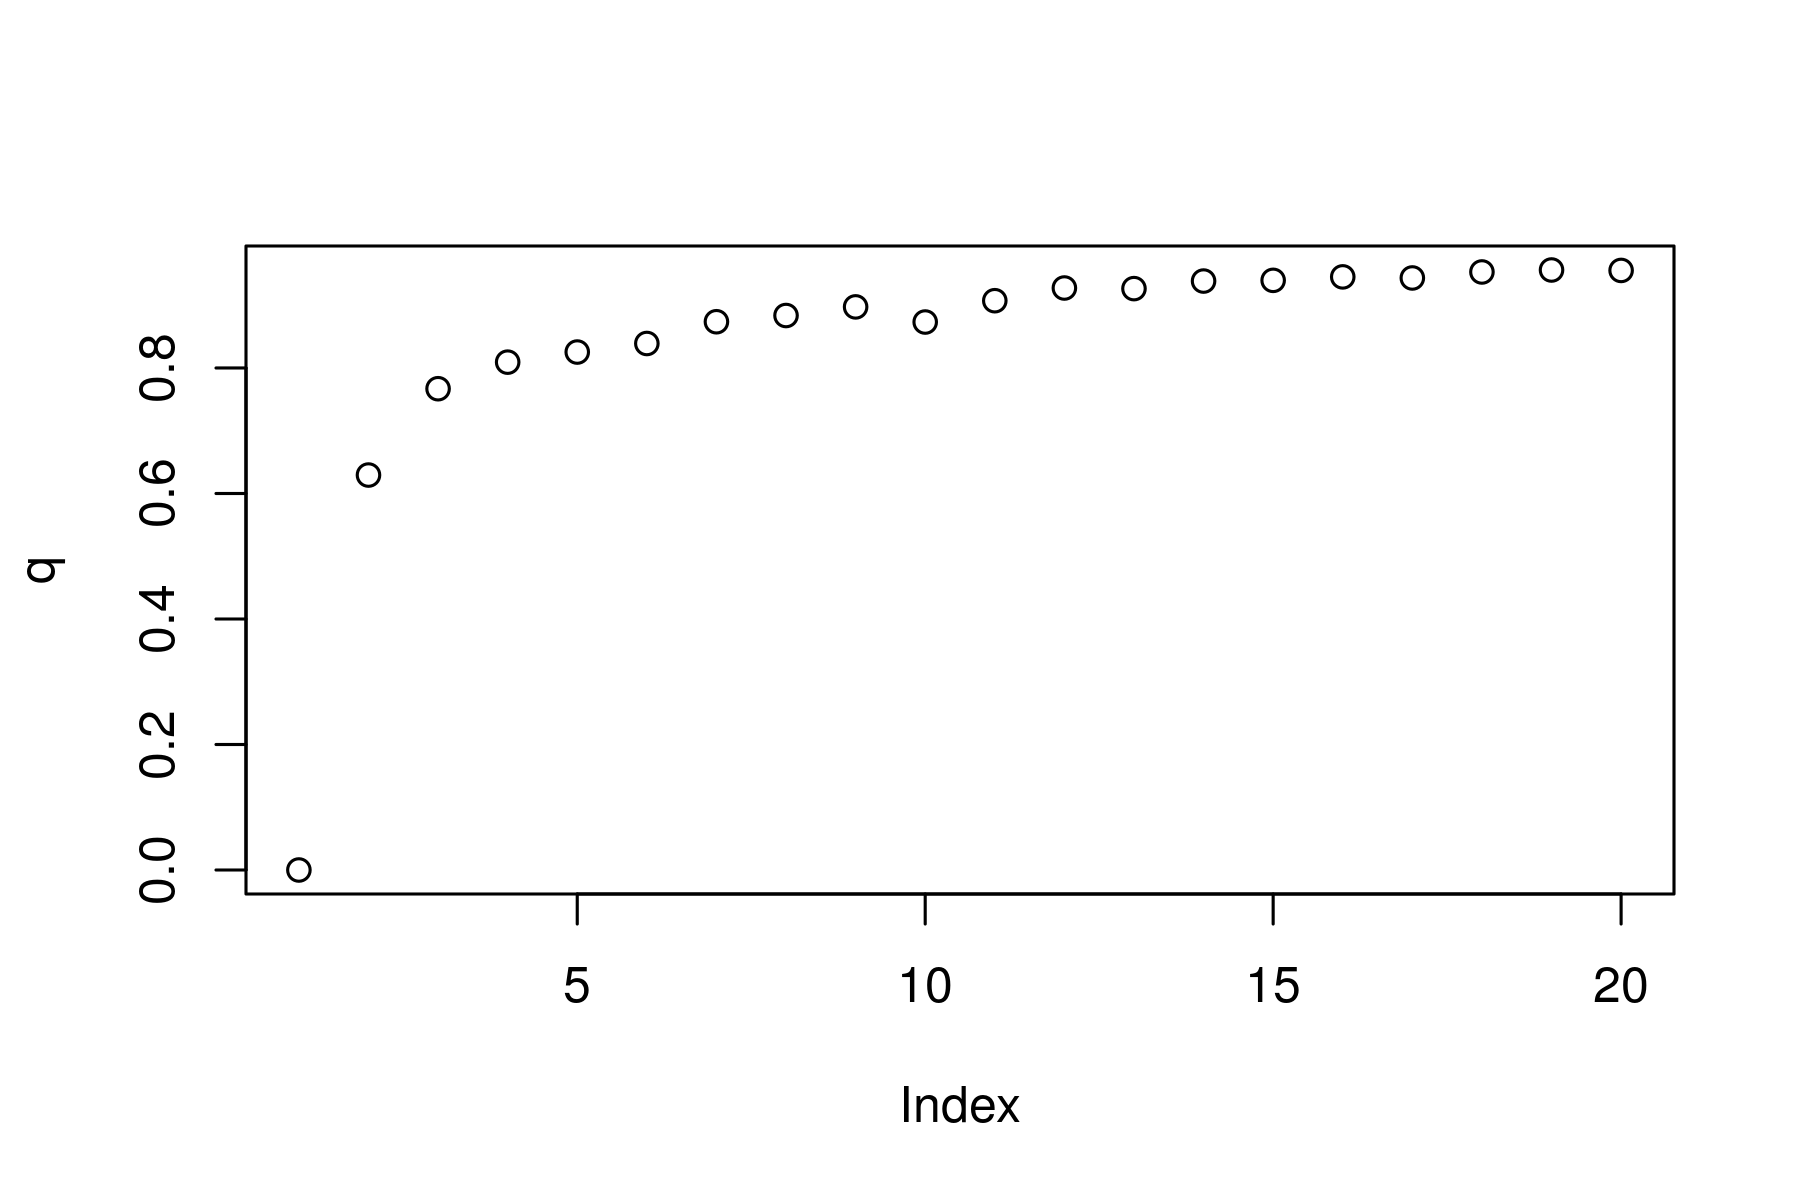

In [31]:
iris_data<-iris[,1:4]

for (i in 1:ncol(iris_data)){     
    mn<-mean(iris_data[,i],na.rm = T)
    sd<-sd(iris_data[,i],na.rm = T)
    
    iris_data[,i]<-(iris_data[,i]-mn)/sd    
}
q<-c()
for (k in 1:20){
    myclust<-kmeans(iris_data,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

In [45]:
myclust<-kmeans(iris_data,4)

#cbind(iris,cl=myclust$cluster)
table(iris$Species,myclust$cluster)

            
              1  2  3  4
  setosa     34  0 16  0
  versicolor  0 39  0 11
  virginica   0 14  0 36

#### Ejemplo proteinas


https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

El conjunto de datos consiste en los niveles de expresión de 77 proteínas / modificaciones de proteínas que produjeron señales detectables en la fracción nuclear de la corteza. Hay 38 ratones de control y 34 ratones trisómicos (síndrome de Down), para un total de 72 ratones. En los experimentos, se registraron 15 mediciones de cada proteína por muestra / ratón. Por lo tanto, para los ratones de control, hay 38x15, o 570 mediciones, y para los ratones trisómicos, hay 34x15, o 510 mediciones. El conjunto de datos contiene un total de 1080 mediciones por proteína. Cada medida puede considerarse como una muestra / ratón independiente.

Las ocho clases de ratones se describen en función de características como el genotipo, el comportamiento y el tratamiento. Según el genotipo, los ratones pueden ser de control o trisómicos. Según el comportamiento, algunos ratones han sido estimulados para aprender (shock de contexto) y otros no (contexto de shock) y para evaluar el efecto del medicamento memantina en la recuperación de la capacidad de aprender en ratones trisómicos, algunos ratones han sido inyectado con la droga y otros no.

Clases
* c-CS-s: ratones de control, estimulados para aprender, inyectados con solución salina (9 ratones)
* c-CS-m: ratones de control, estimulados para aprender, inyectados con memantina (10 ratones)
* c-SC-s: ratones de control, no estimulados para aprender, inyectados con solución salina (9 ratones)
* c-SC-m: ratones de control, no estimulados para aprender, inyectados con memantina (10 ratones)

* t-CS-s: ratones con trisomía, estimulados para aprender, inyectados con solución salina (7 ratones)
* t-CS-m: ratones con trisomía, estimulados para aprender, inyectados con memantina (9 ratones)
* t-SC-s: ratones con trisomía, no estimulados para aprender, inyectados con solución salina (9 ratones)
* t-SC-m: ratones con trisomía, no estimulados para aprender, inyectados con memantina (9 ratones)



In [46]:
mouse<-read.csv("data/Data_Cortex_Nuclear.csv")
mouse_data<-mouse[,2:78]

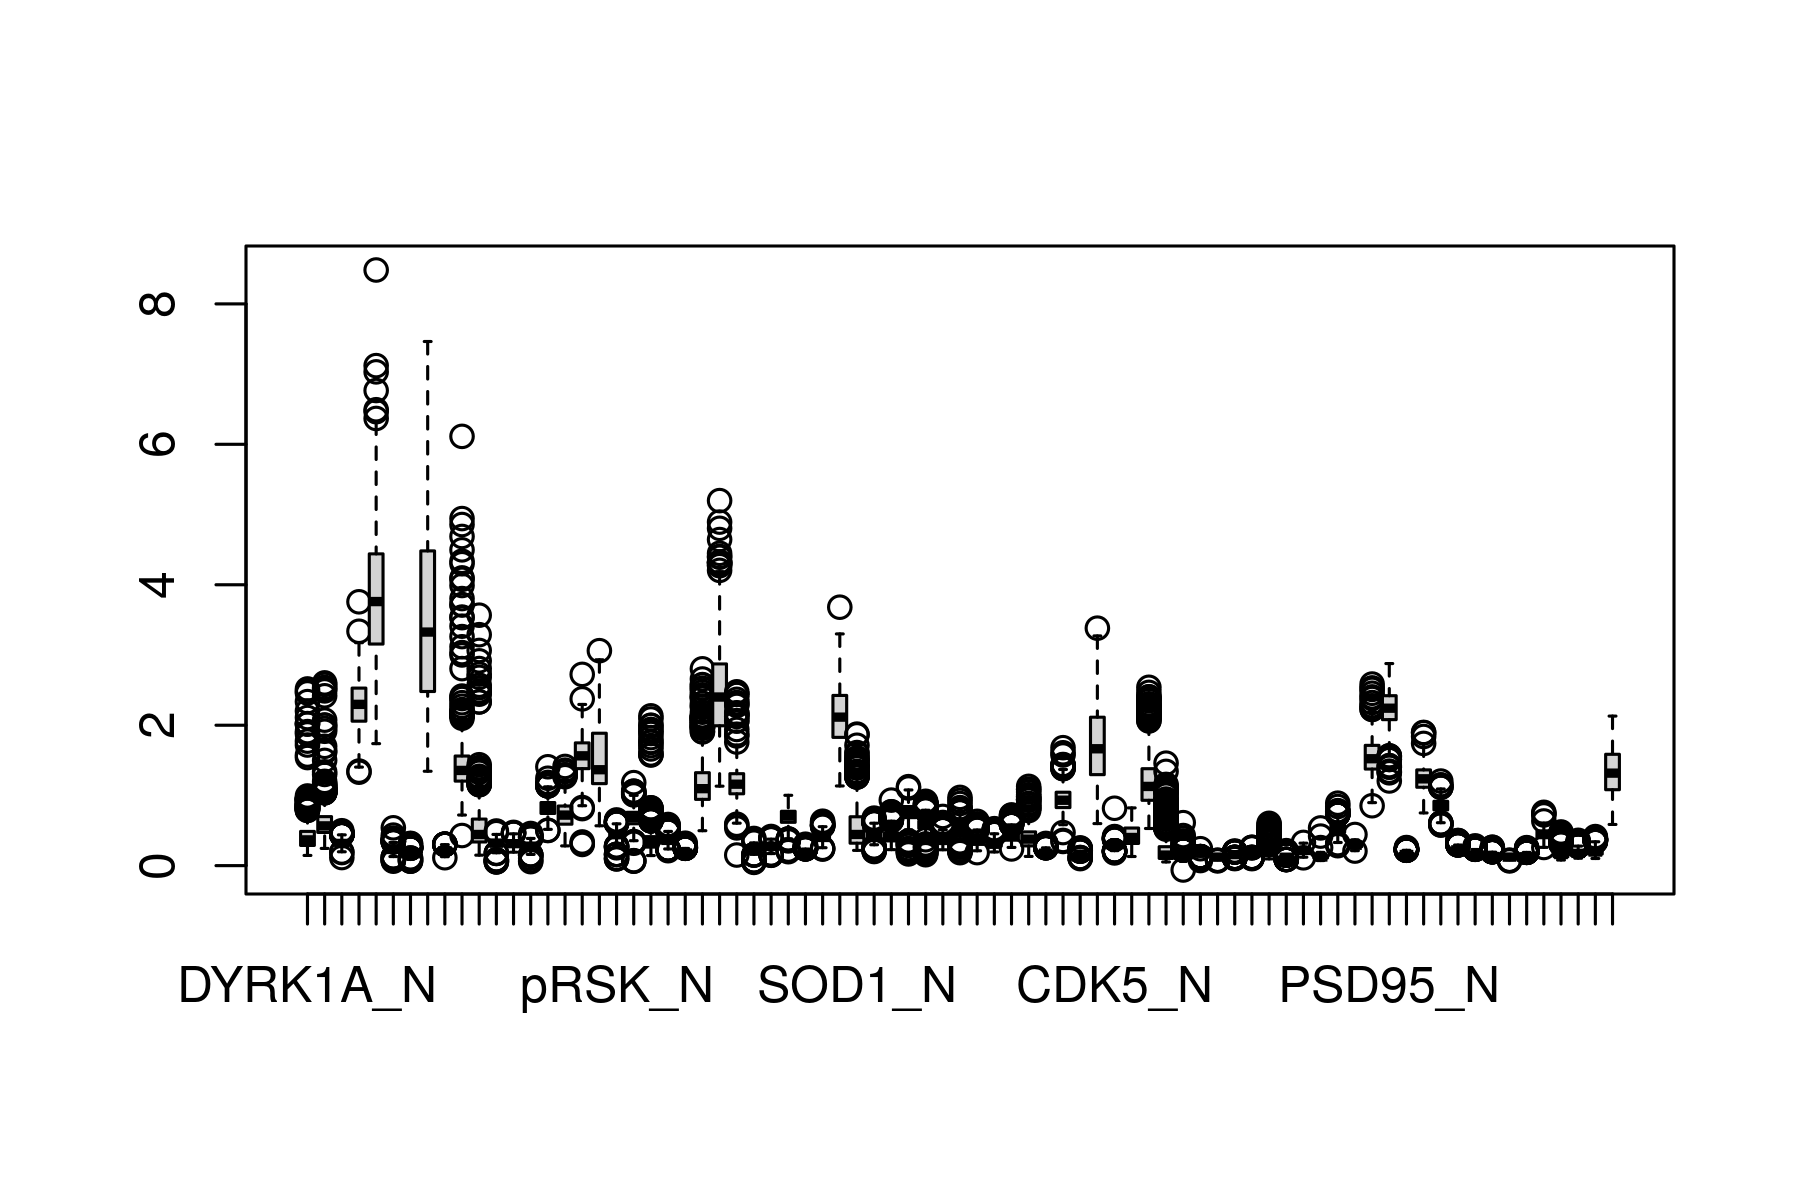

In [47]:
boxplot(mouse_data)

In [48]:
for (i in 1:ncol(mouse_data)){        
    mn<-mean(mouse_data[,i],na.rm = T)    
    mouse_data[is.na(mouse_data[,i]),i]<-mn        
}

In [49]:
library(caret)

Loading required package: lattice



In [50]:
preProcValues <- preProcess(mouse_data, method = c("center", "scale"))
preProcValues

Created from 1080 samples and 77 variables

Pre-processing:
  - centered (77)
  - ignored (0)
  - scaled (77)


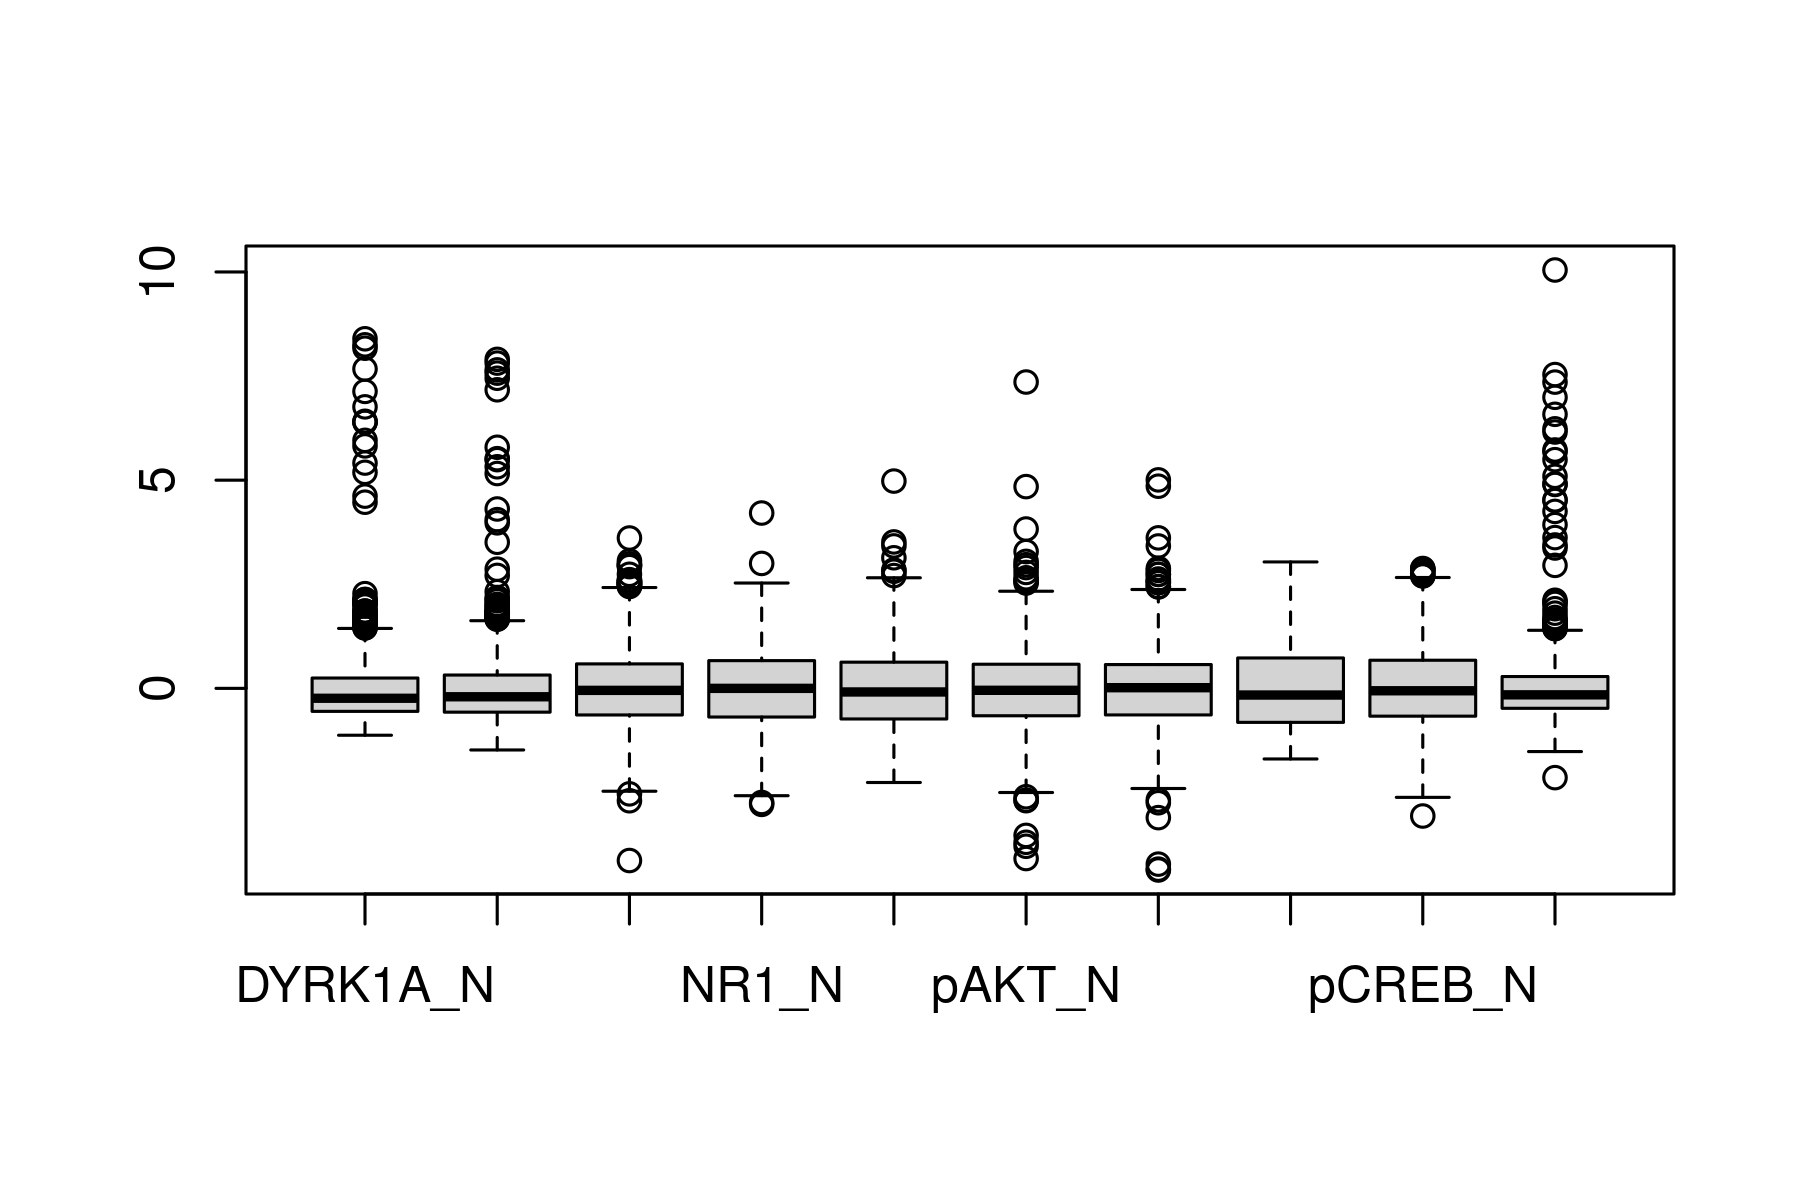

In [51]:
mouse_data_transformed <- predict(preProcValues, mouse_data)
boxplot(mouse_data_transformed[,1:10])

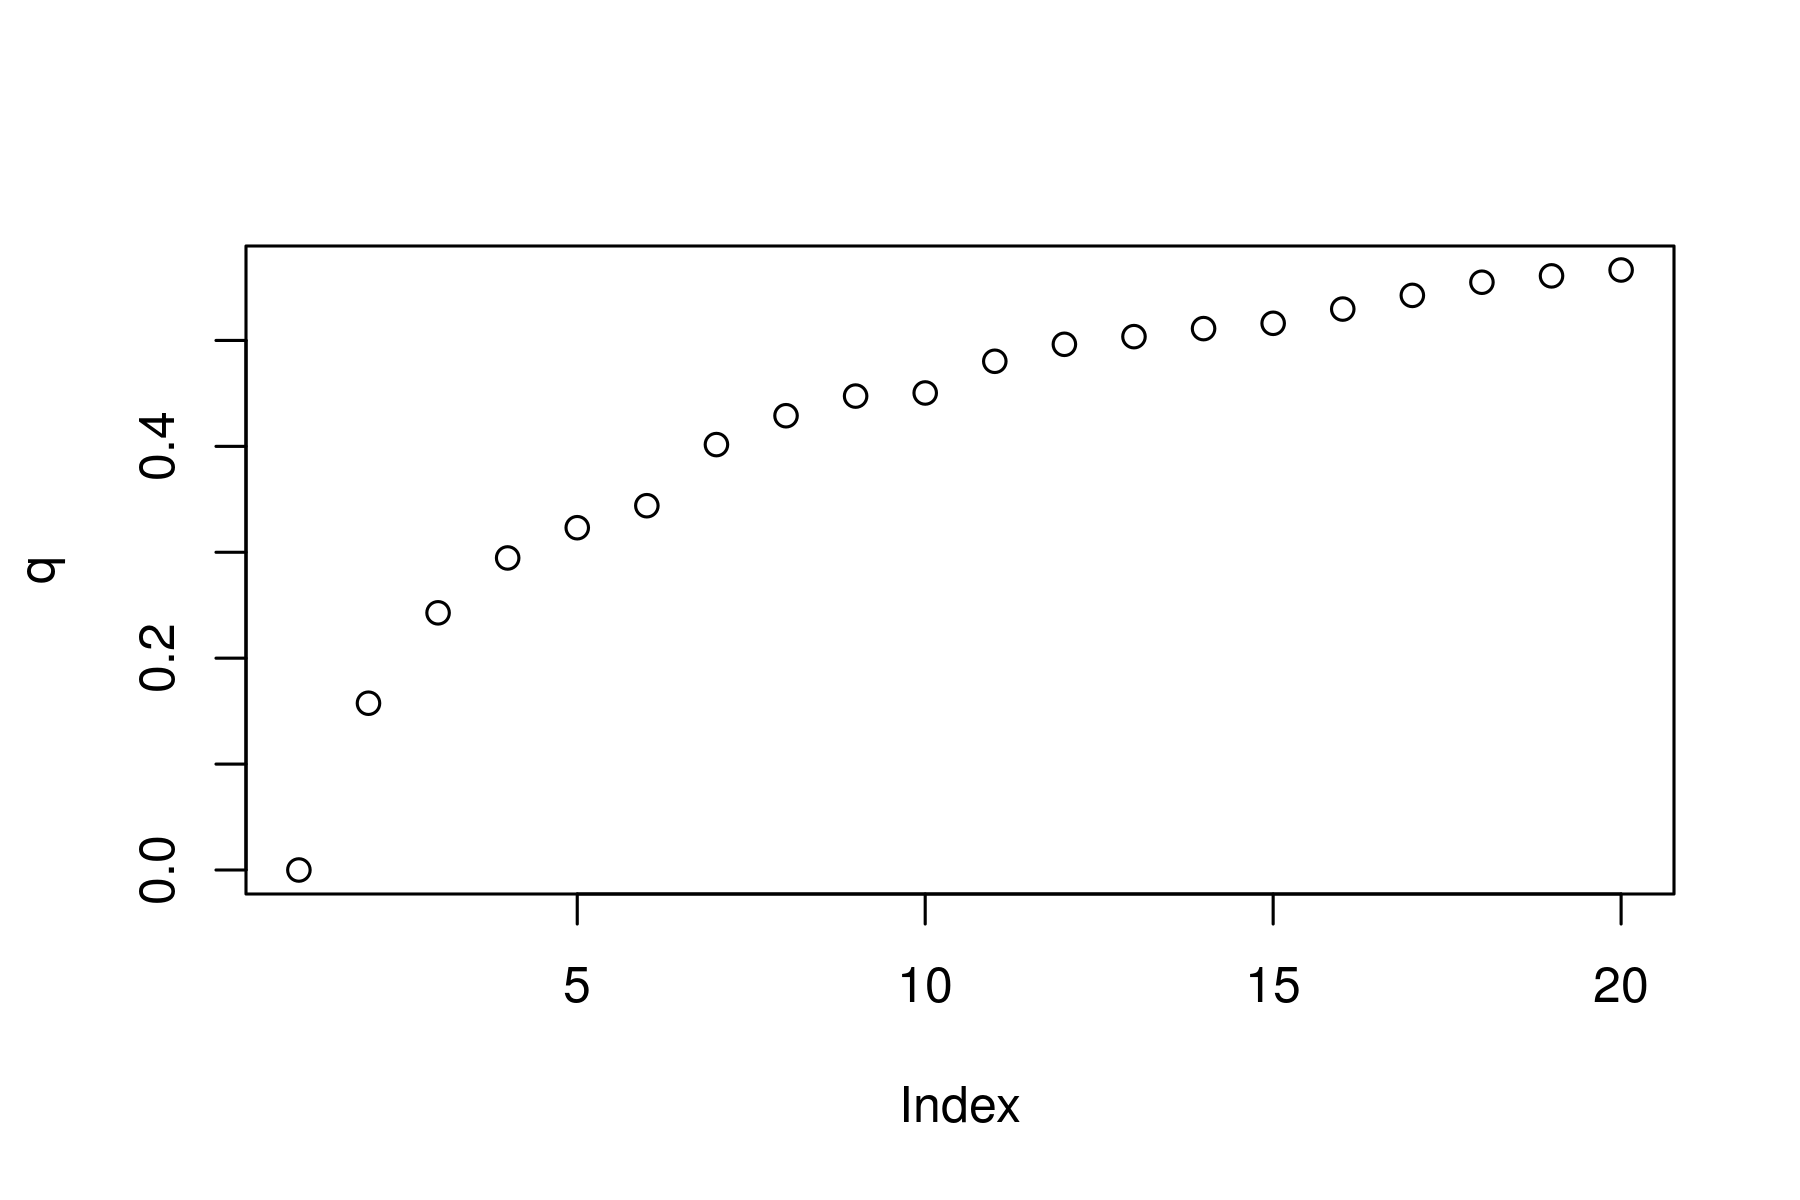

In [52]:
q<-c()
for (k in 1:20){
    myclust<-kmeans(mouse_data_transformed,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

In [53]:
myclust<-kmeans(mouse_data_transformed,8)
table(mouse$class,myclust$cluster)

        
          1  2  3  4  5  6  7  8
  c-CS-m  0 16 46 20  0 18 12 38
  c-CS-s  0  0 40 32 15 24  0 24
  c-SC-m  8 47  0  4  0 21 70  0
  c-SC-s 15 26  0  1  0 14 67 12
  t-CS-m  0  0 67 13  0 44  0 11
  t-CS-s  3  3 57 11  0 20  0 11
  t-SC-m 11 39  0 12  0  3 56 14
  t-SC-s 44  2 12 30  0  9  7 31

In [54]:
myclust<-kmeans(mouse_data_transformed,9)
table(mouse$class,myclust$cluster)
table(mouse$Genotype,myclust$cluster)
table(mouse$Treatment,myclust$cluster)
table(mouse$Behavior,myclust$cluster)

        
          1  2  3  4  5  6  7  8  9
  c-CS-m 35 10  0  6 19 17 47 16  0
  c-CS-s 36  0  0  7 32 24 21  0 15
  c-SC-m  0 72  8  1  4 20  0 45  0
  c-SC-s  0 70 15  5  1 14  5 25  0
  t-CS-m 64  0  0  0 13 44 14  0  0
  t-CS-s 53  0  3  0 11 20 15  3  0
  t-SC-m  0 53 10 30  7  3  0 32  0
  t-SC-s 12  6 44 19 26  9 19  0  0

         
            1   2   3   4   5   6   7   8   9
  Control  71 152  23  19  56  75  73  86  15
  Ts65Dn  129  59  57  49  57  76  48  35   0

           
              1   2   3   4   5   6   7   8   9
  Memantine  99 135  18  37  43  84  61  93   0
  Saline    101  76  62  31  70  67  60  28  15

     
        1   2   3   4   5   6   7   8   9
  C/S 188  10   3  13  75 105  97  19  15
  S/C  12 201  77  55  38  46  24 102   0

### Más medidas de calidad de un cluster (ASW)

Average silhouette width (ASW)

La medida de *silhouette* nos dice como de similar es un objeto a su propio cluster (cohesión) comparado con otros clusters (separación).

Su valor va entre:
* -1 : La muestra no se parece demasiado a sus vecinos y se diferencia poco de las de otro cluster
* 1  : La muestra se parece mucho a sus vecinos y muy poco a las de otro cluster

Se da un valor por muestra, si la mayor parte de las muestras tienen un valor alto entonces la configuración del cluster es buena.

Su valor s(i) se calcula como:


\\[
s(i)=\frac{b(i)-a(i)}{max \left ( a(i), b(i) \right )}
\\]

donde a(i) es la media de la distancia entre i y todos los puntos de su mismo cluster: 

\\[
a(i)=\frac{1}{\mid C(i) \mid -1 } \sum_{x \in C(i)} d(x_i,x)
\\]


y b(i) es la distancia media de *i* al cluster más parecido (el que tiene una menor distancia media):

\\[
b(i)=min_{j \notin C(i)} \frac{1}{\mid C(j) \mid } \sum_{x \in C(j)} d(x_i,x)
\\]

$C(i)$ es el cluster al cual *i* pertenece y $\mid C(i) \mid$ es el número de elementos en ese cluster.



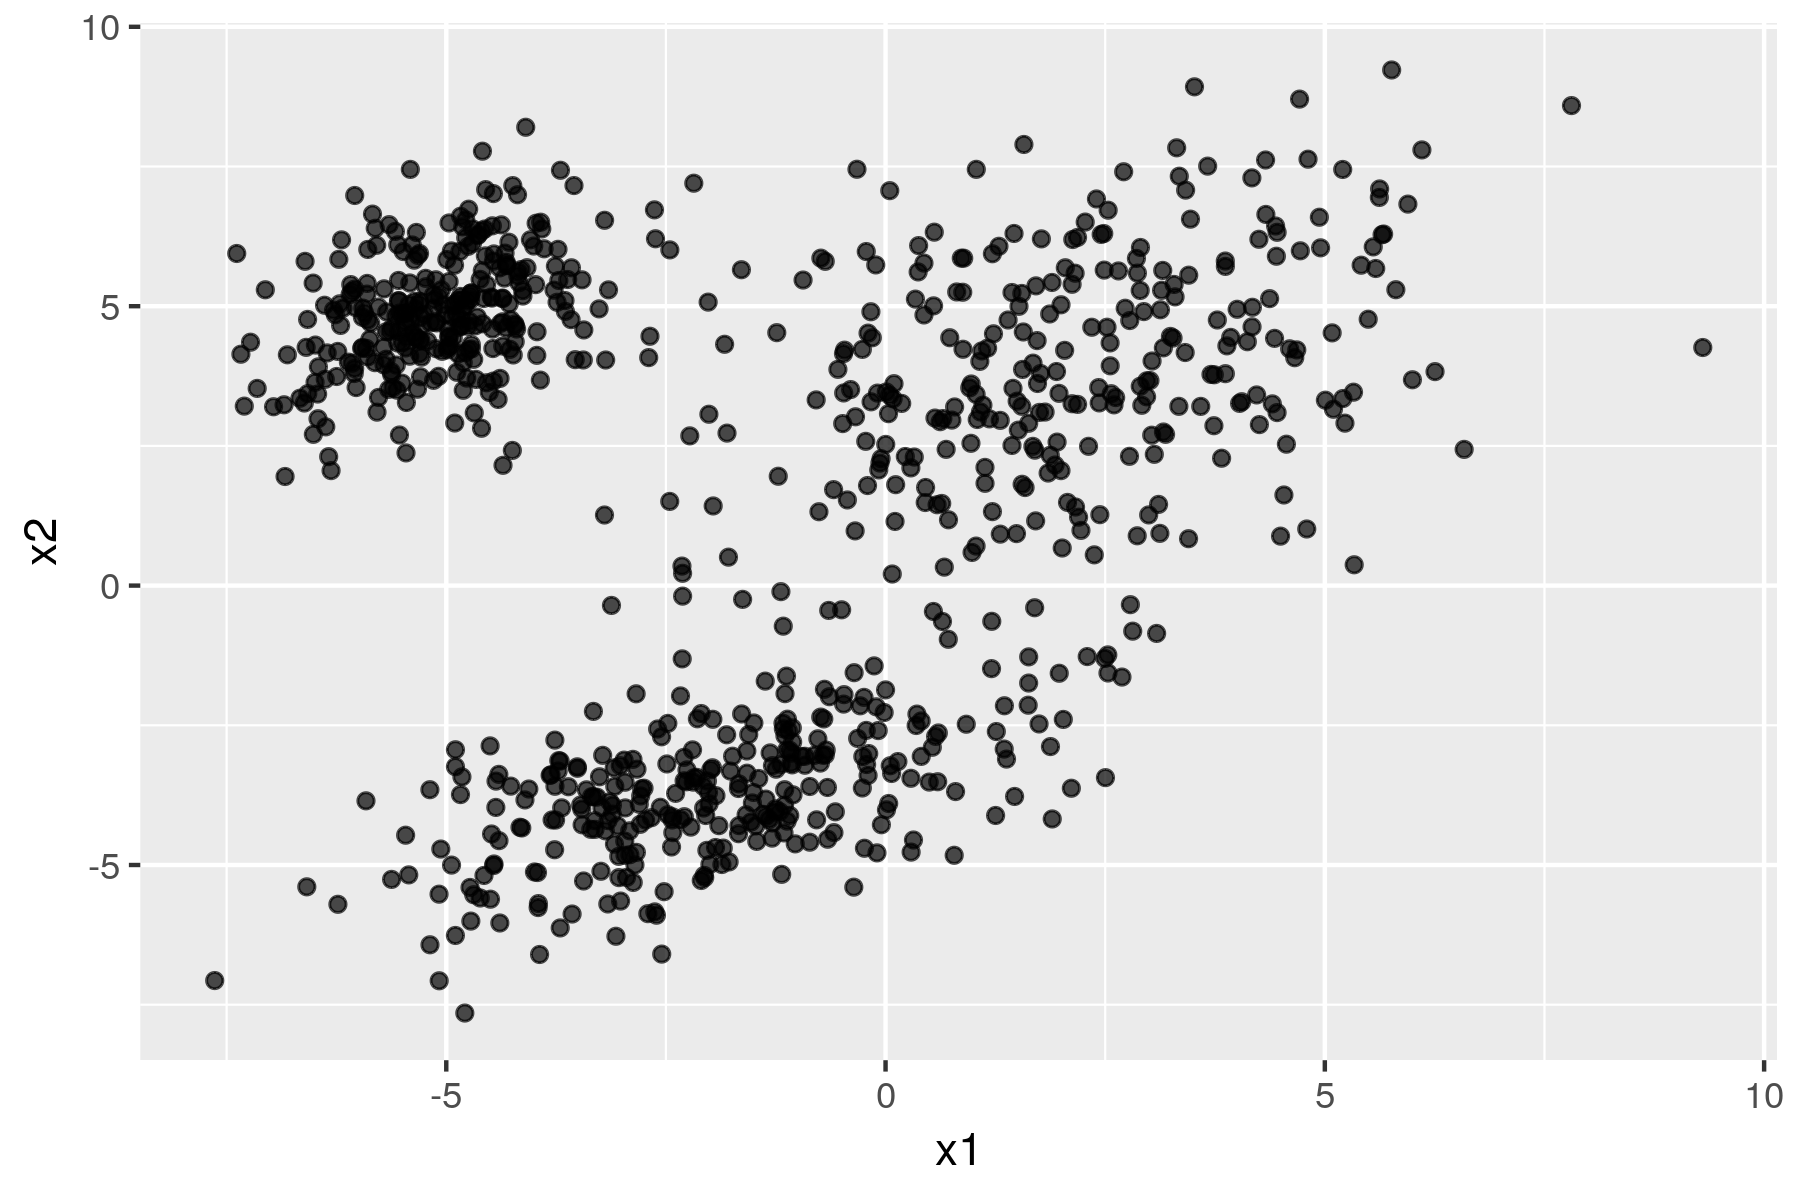

In [19]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)


N<-300
x1<-c(rnorm(N,mean=2,sd=2),rnorm(N,mean=-2,sd=2),rnorm(N,mean=-5,sd=1))
x2<-c(0.4*x1+c(rnorm(N,mean=3,sd=2),rnorm(N,mean=-3,sd=1),rnorm(N,mean=7,sd=1)))
df<-data.frame(x1,x2)

library(ggplot2)
ggplot(data=df, aes(x=x1,y=x2))+geom_point(alpha=0.7)

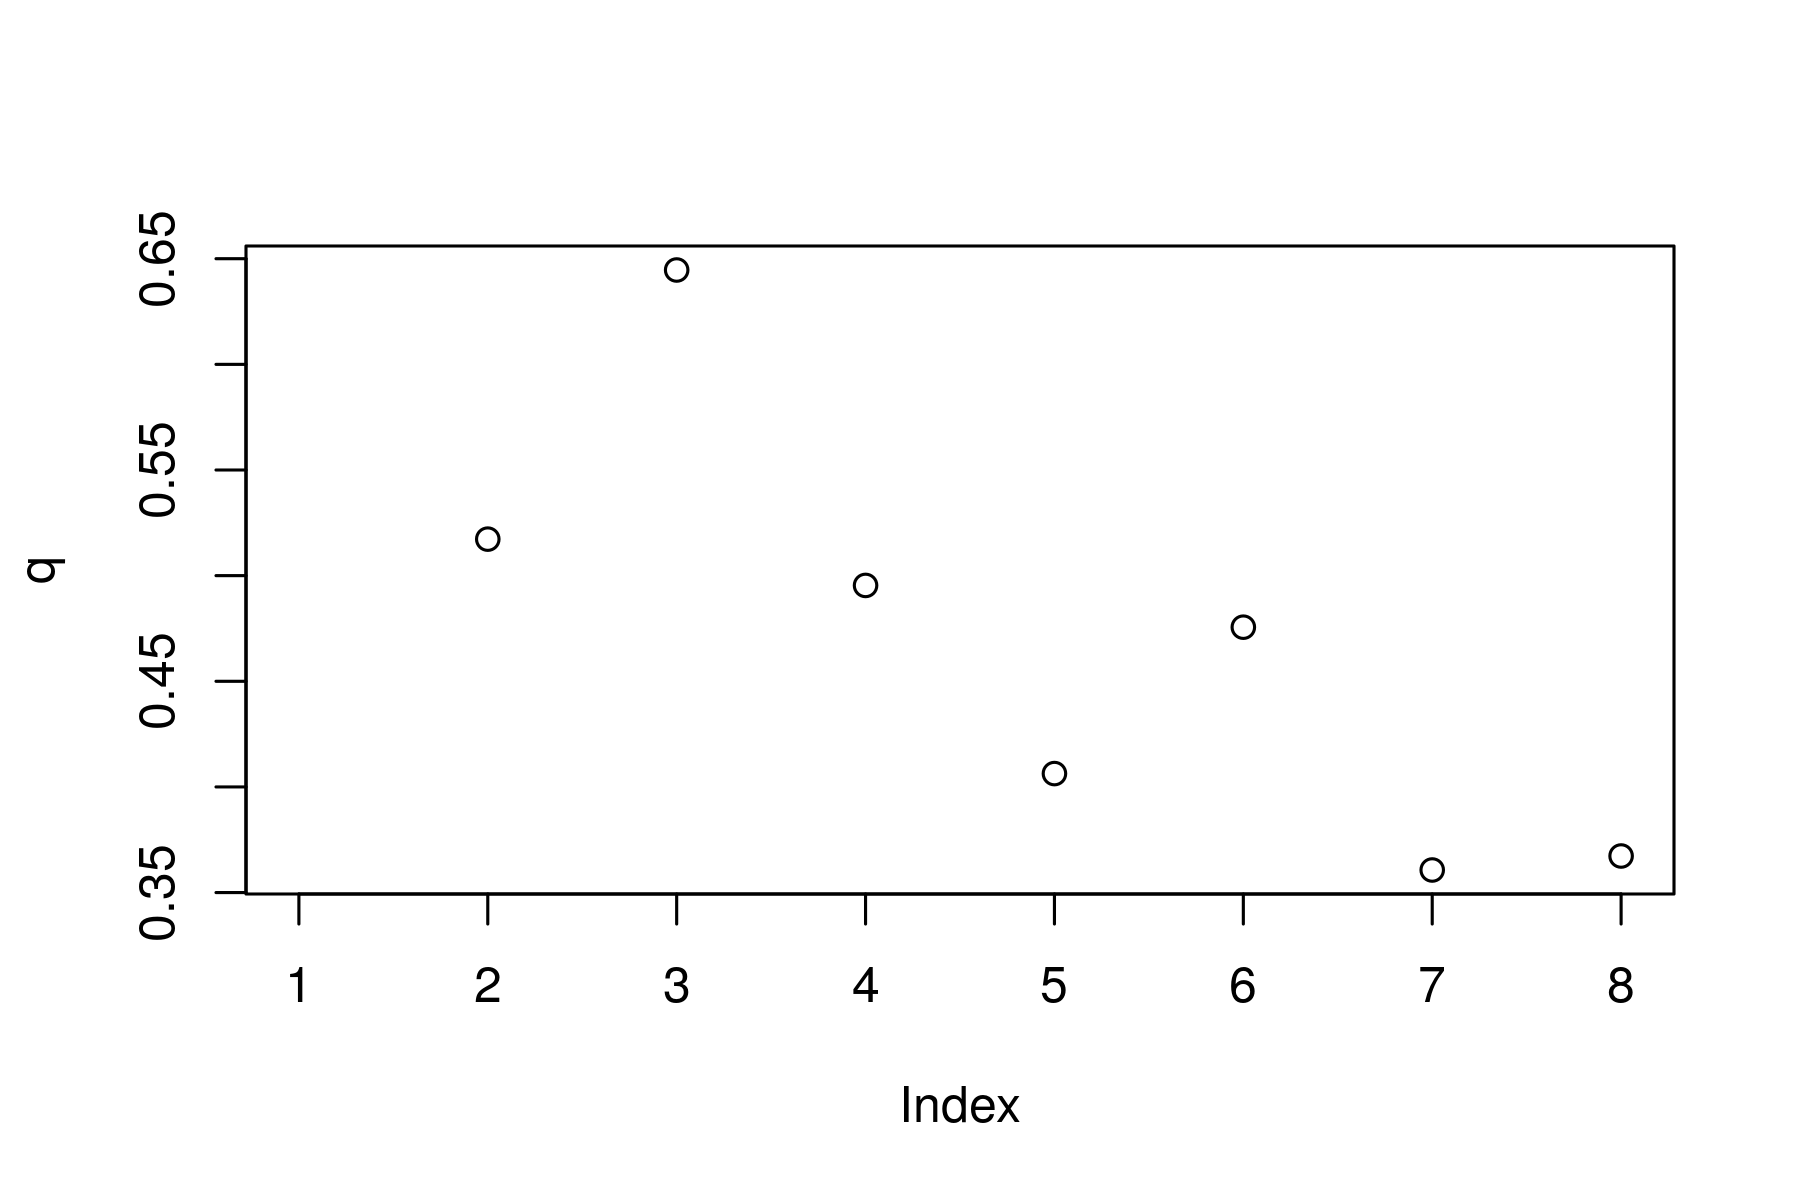

In [20]:
library(cluster)

q<-c()
for (k in 2:8){
    myclust<-kmeans(df,k)
    ss<-silhouette(myclust$cluster, dist(df))    
    q[k]<-mean(ss[, "sil_width"])
}
plot(q)

Silhouette of 900 units in 3 clusters from silhouette.default(x = myclust$cluster, dist = dist(df)) :
 Cluster sizes and average silhouette widths:
      273       311       316 
0.5200922 0.7465379 0.6520066 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.04806  0.58215  0.68663  0.64466  0.76682  0.83357 

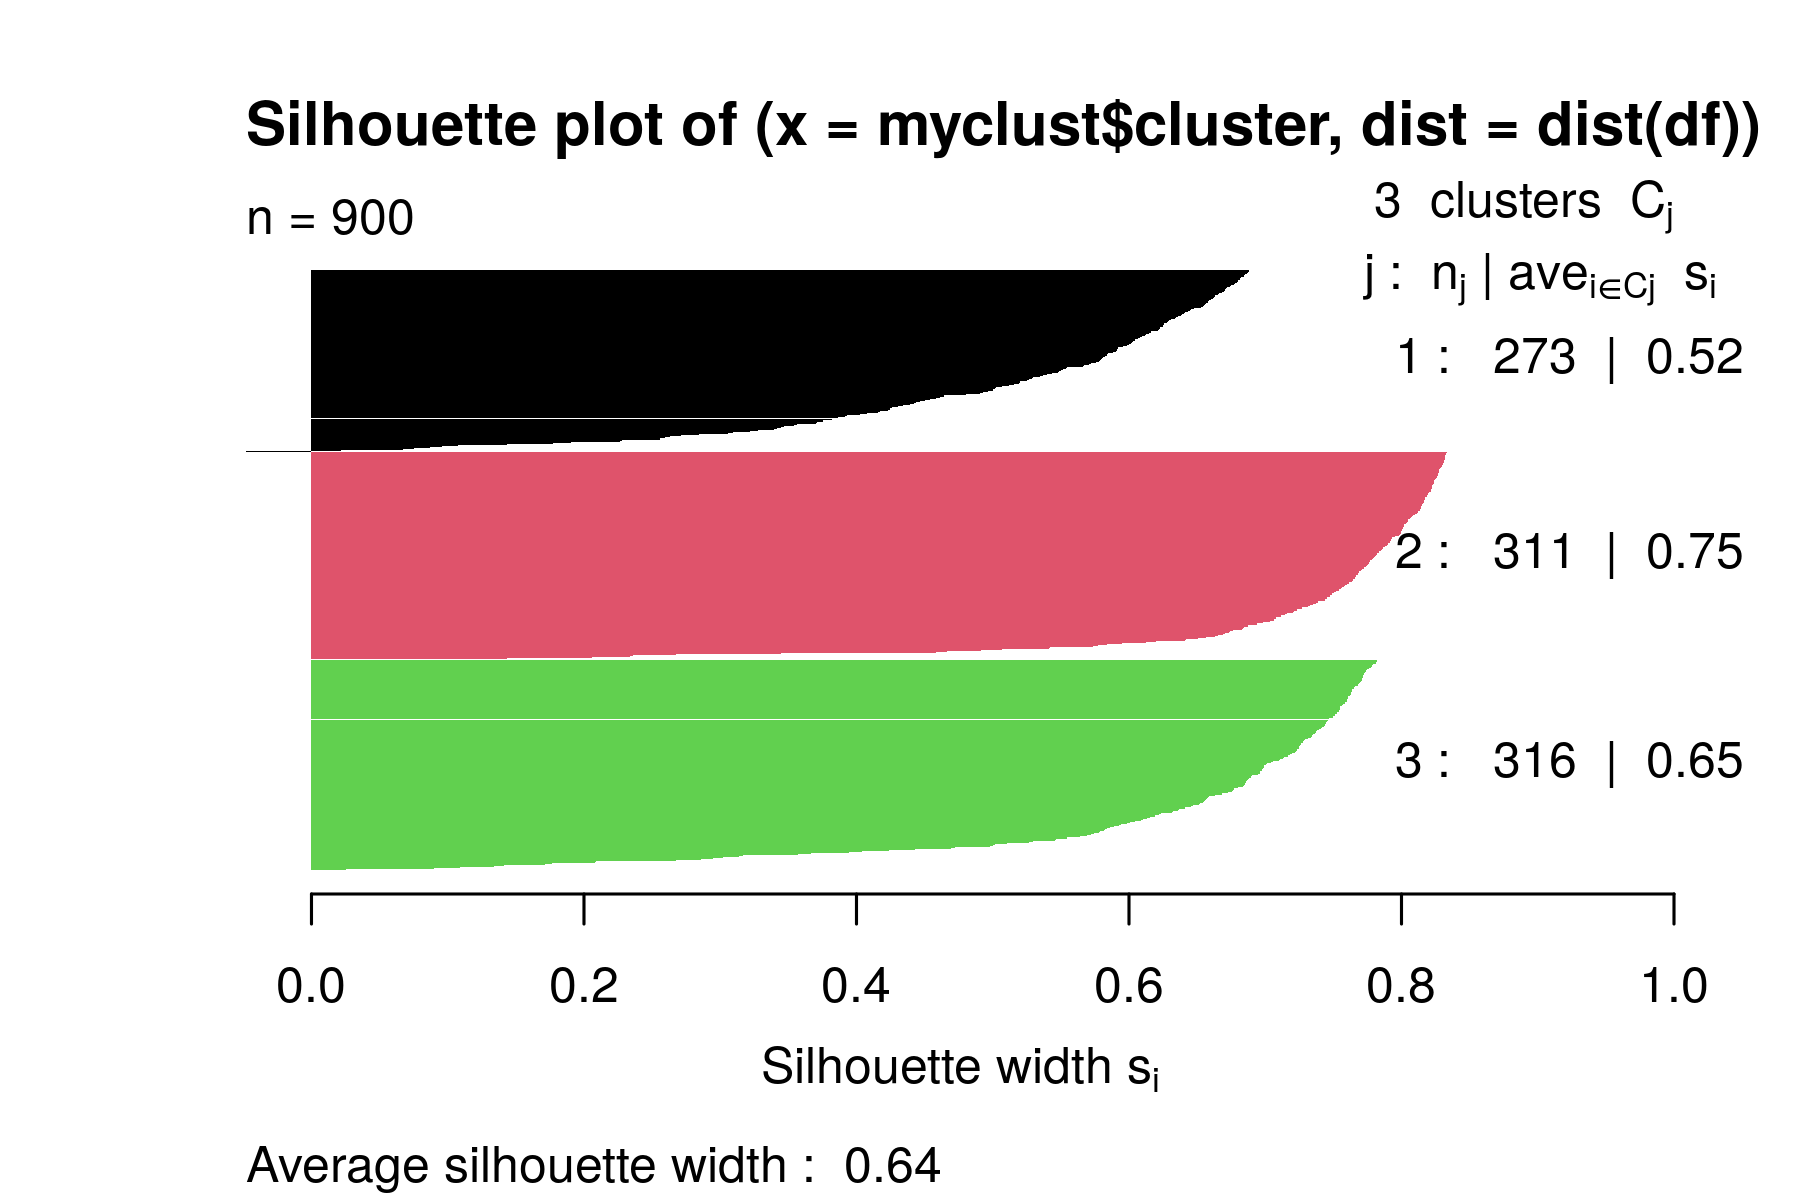

In [22]:
k<-3
myclust<-kmeans(df,k)
ss<-silhouette(myclust$cluster, dist(df))  
summary(ss)
plot(ss,col=1:k,border=NA)

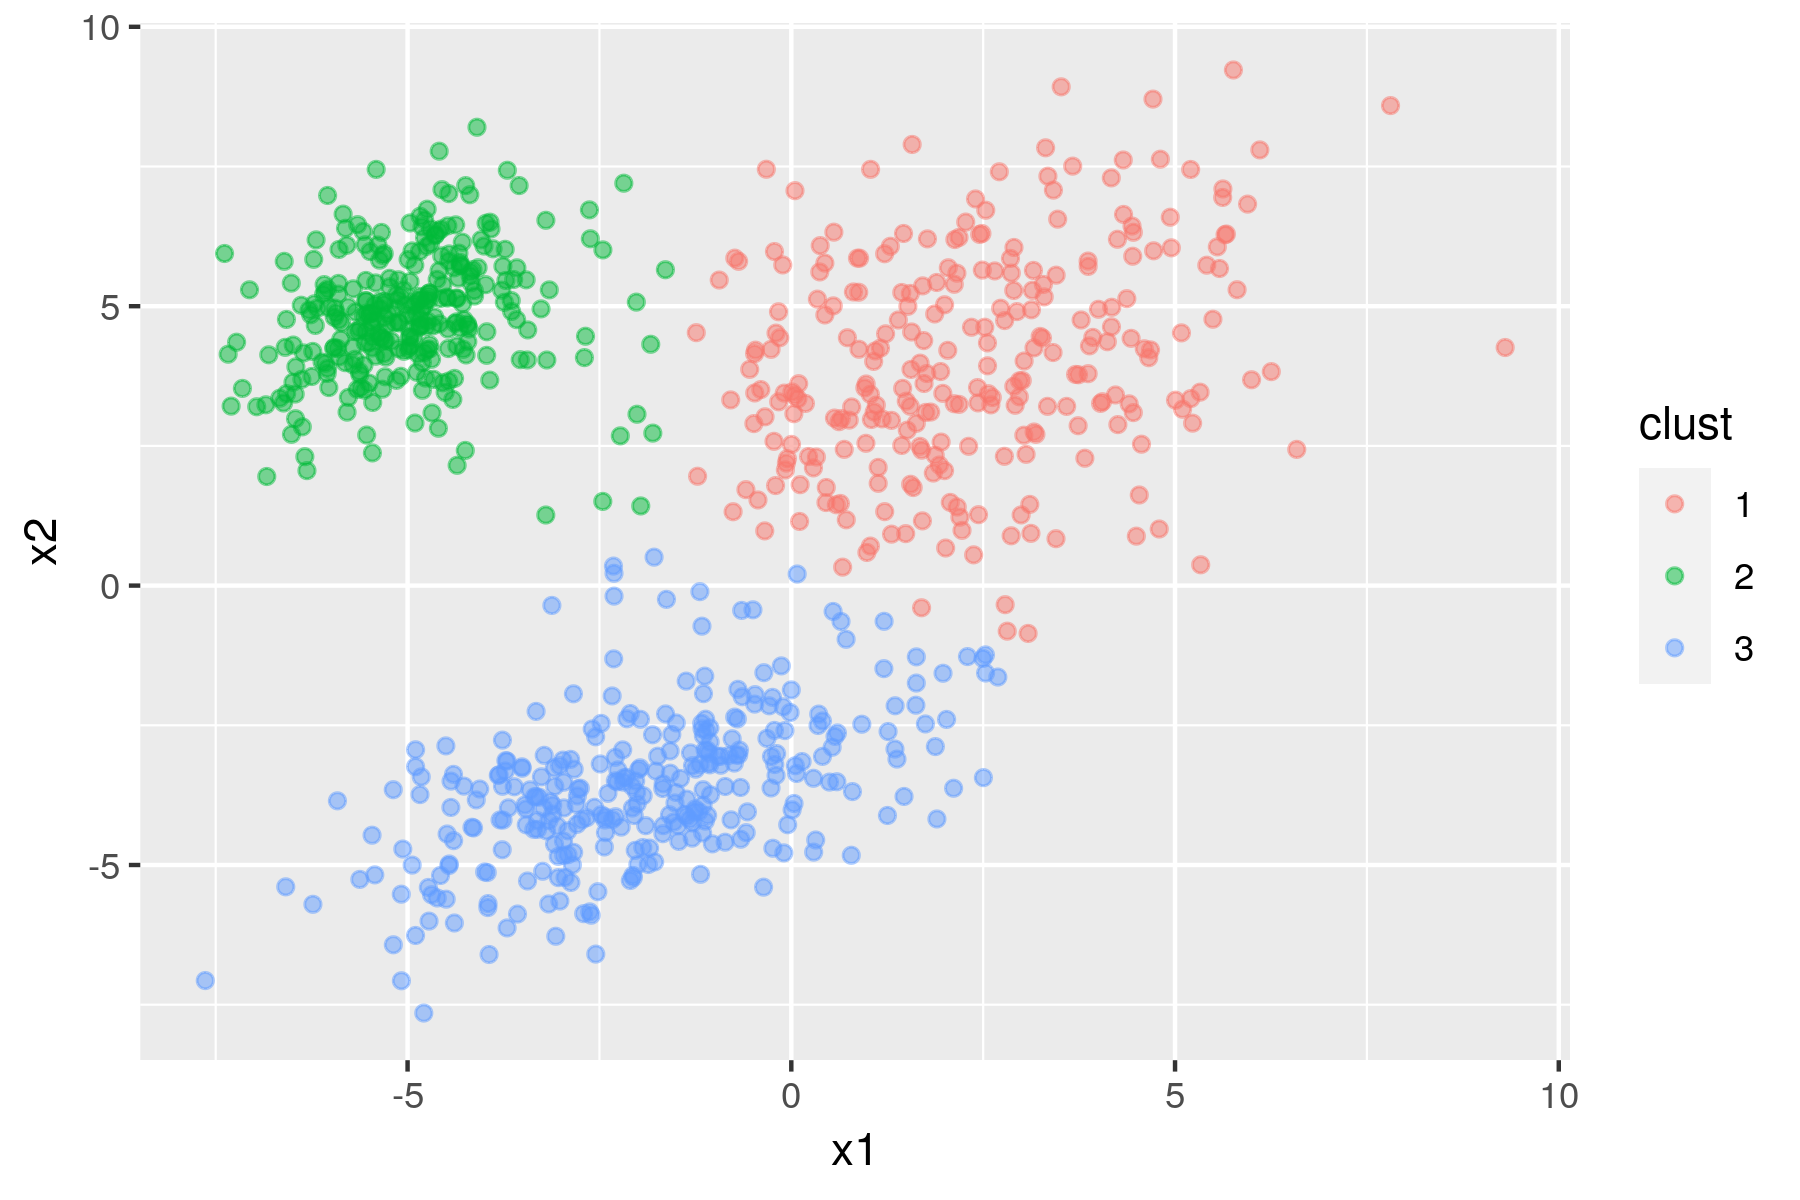

In [28]:
df$clust <- factor(myclust$cluster)
ggplot(df, aes(x=x1, y=x2, color=clust)) + geom_point(alpha=0.5)

In [32]:
str(dist(iris_data))

 'dist' num [1:11175] 1.172 0.843 1.1 0.259 1.035 ...
 - attr(*, "Size")= int 150
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 - attr(*, "method")= chr "euclidean"
 - attr(*, "call")= language dist(x = iris_data)


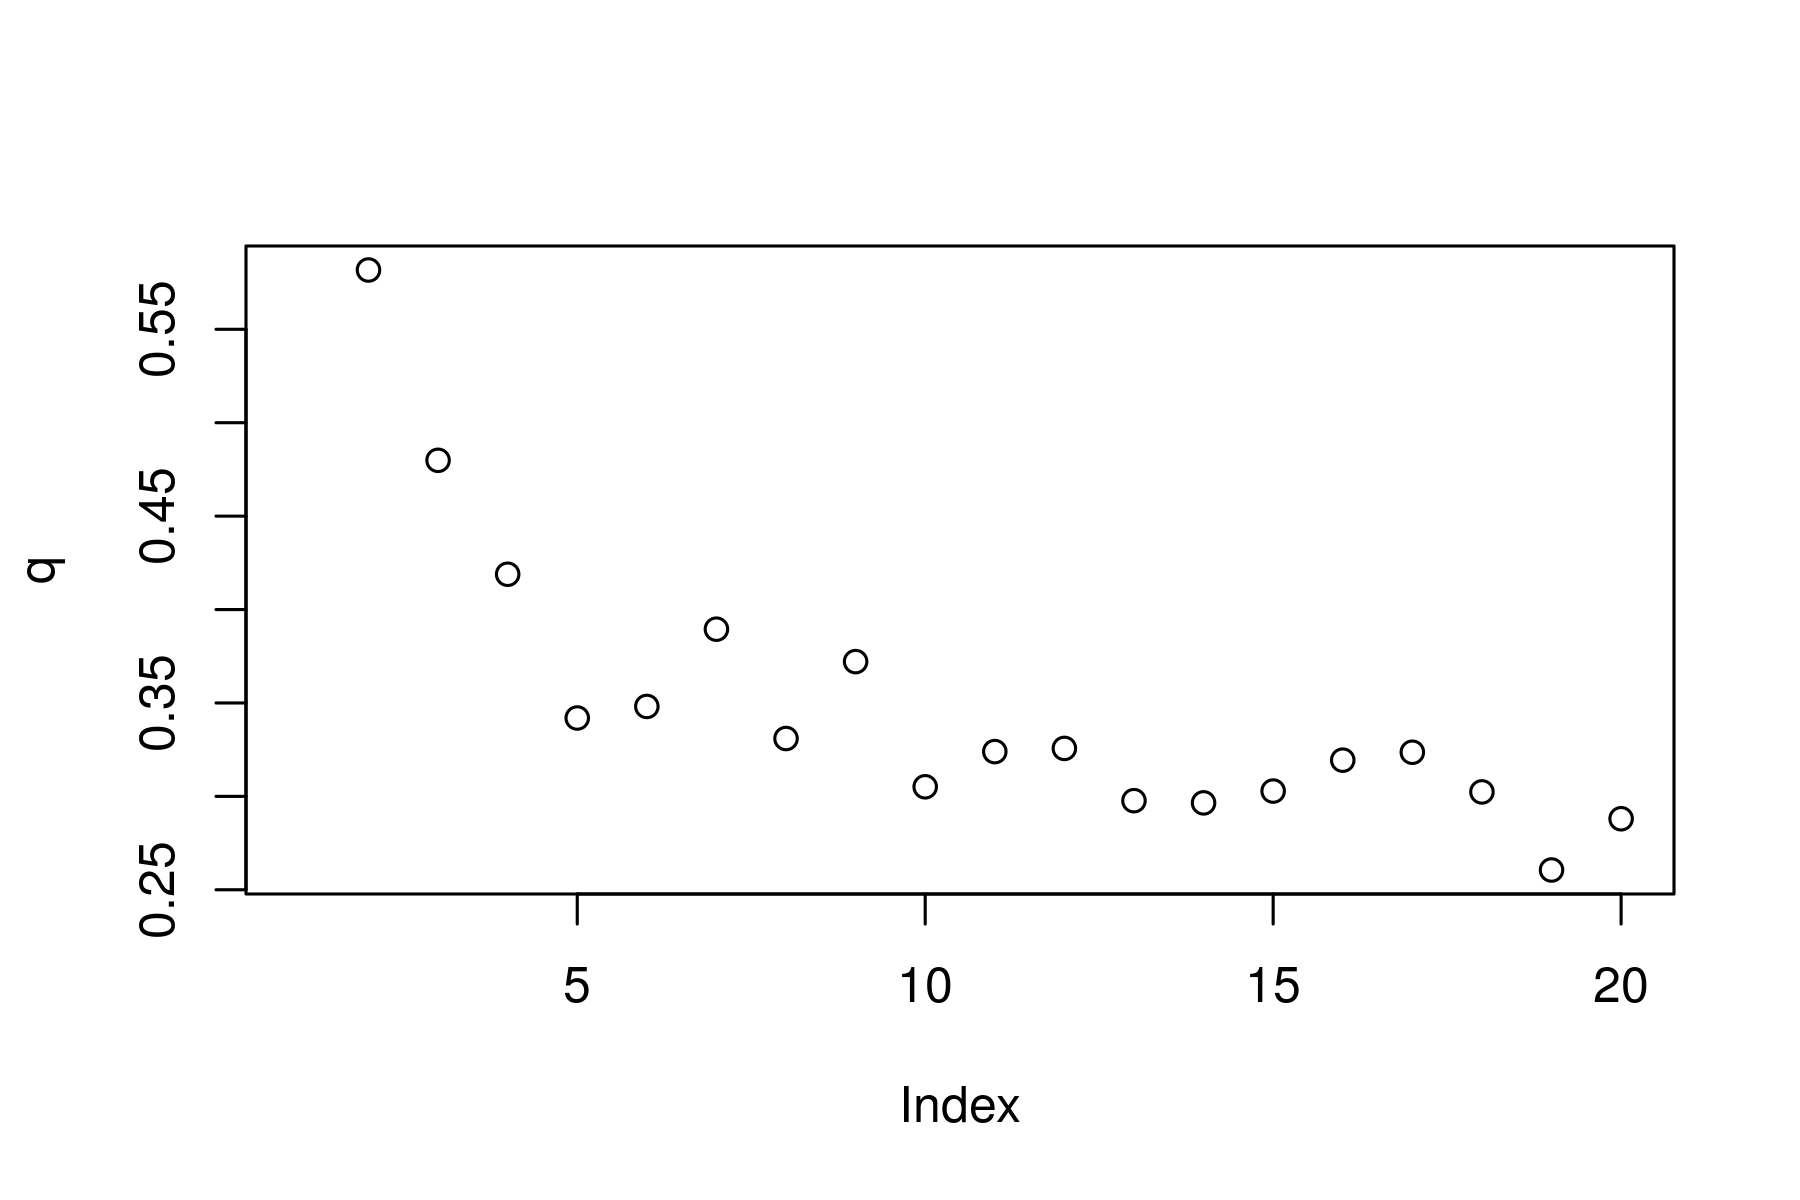

In [33]:
q<-c()
for (k in 2:20){
    myclust<-kmeans(iris_data,k)
    ss<-silhouette(myclust$cluster, dist(iris_data))    
    q[k]<-mean(ss[, "sil_width"])
}
plot(q)

Silhouette of 150 units in 2 clusters from silhouette.default(x = myclust$cluster, dist = dist(iris_data)) :
 Cluster sizes and average silhouette widths:
       50       100 
0.6807337 0.5322582 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1256  0.5256  0.6065  0.5817  0.6636  0.7648 

            
              1  2
  setosa     50  0
  versicolor  0 50
  virginica   0 50

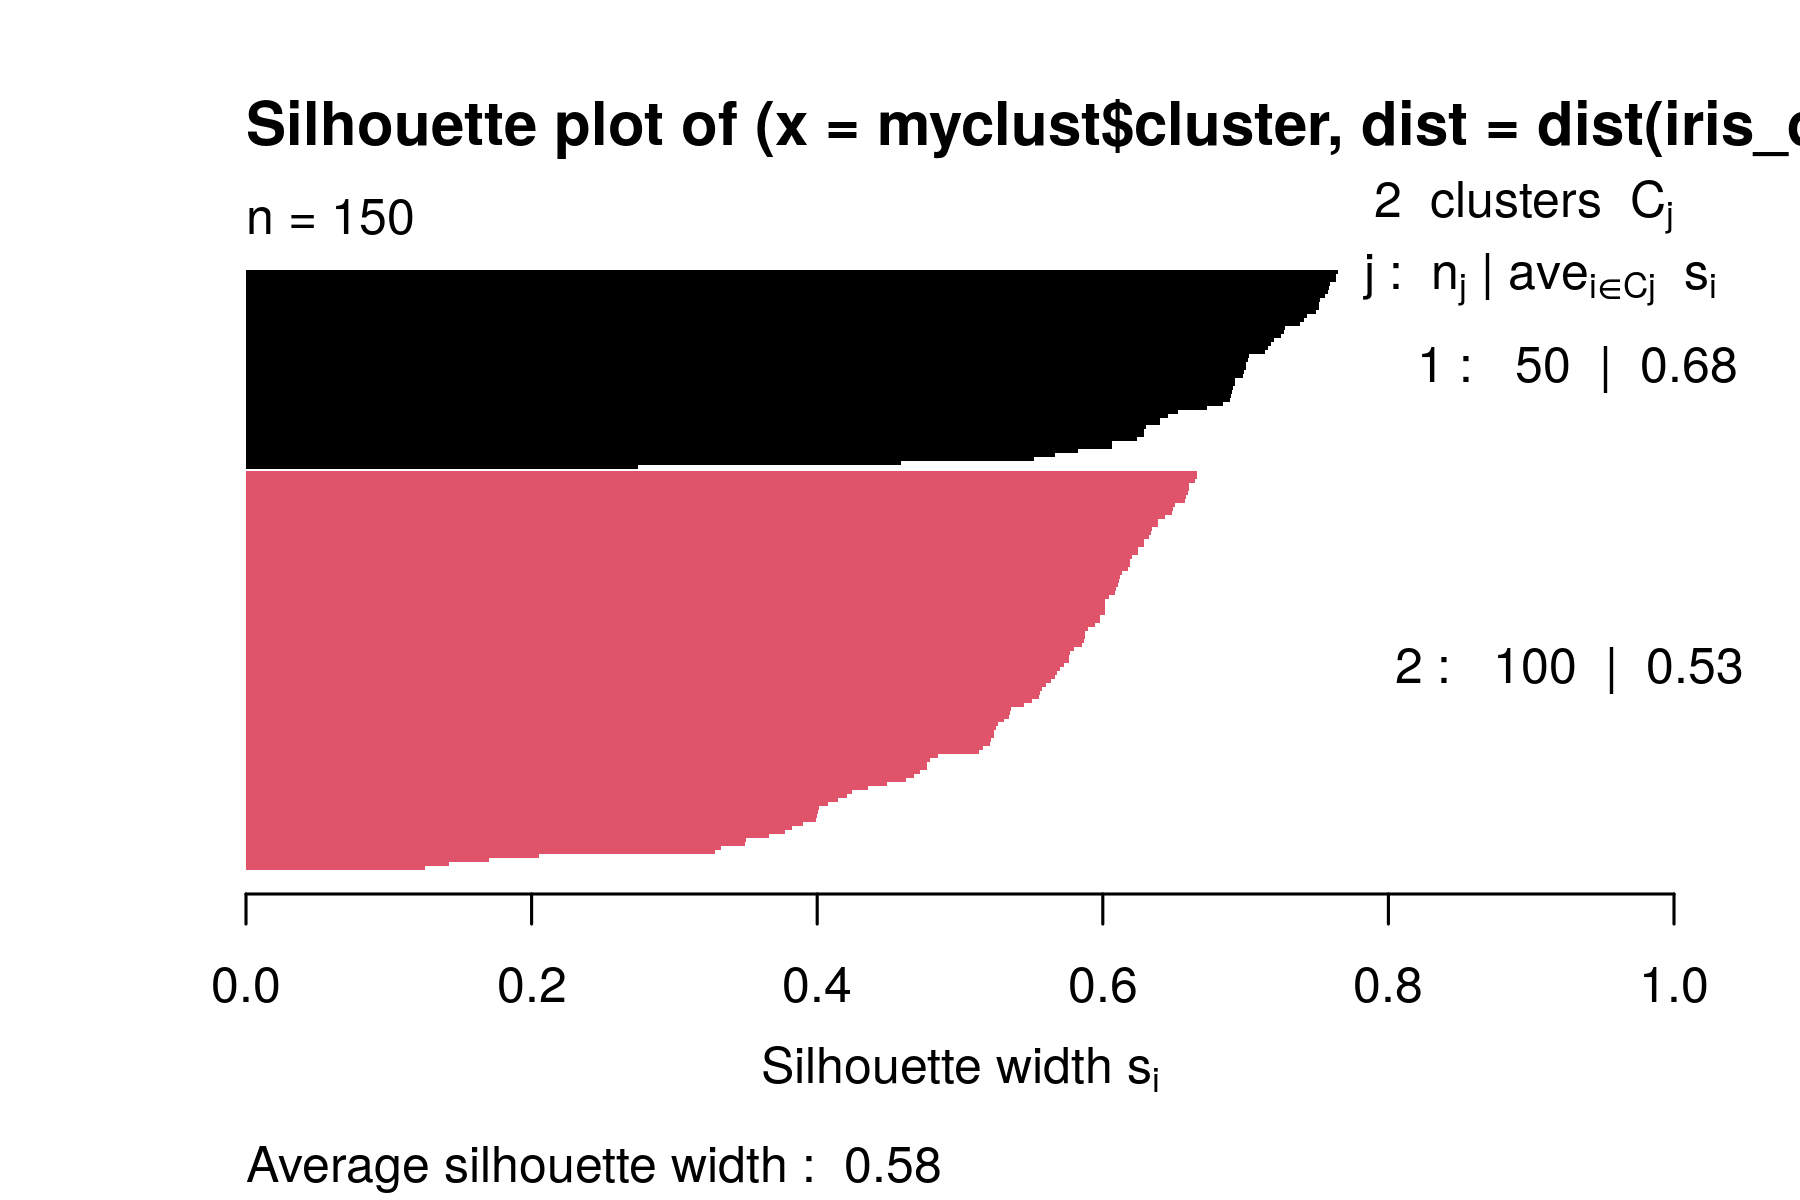

In [34]:
k<-2
myclust<-kmeans(iris_data,k)
ss<-silhouette(myclust$cluster, dist(iris_data))  
summary(ss)
plot(ss,col=1:k,border=NA)

table(iris$Species,myclust$cluster)

####  Ejemplo aceite de oliva


Composición en porcentaje de ocho ácidos grasos encontrados en 572 aceites de oliva italianos:

* region. Región de Italia.
* area. Área de Italy.
* palmitic. % de ácido palmítico en la muestra.
* palmitoleic. % de ácido palmitoleico en la muestra.
* stearic. % de ácido esteárico en la muestra.
* oleic. % de ácido oleico en la muestra.
* linoleic. % de ácido linoleico en la muestra.
* linolenic. % de ácido linolénico en la muestra.
* arachidic. % de ácido araquidónico en la muestra.
* eicosenoic. % de ácido eicosenoico en la muestra.

In [35]:
library(dslabs)

In [36]:
head(olive)

region         area         palmitic palmitoleic stearic oleic linoleic
1 Southern Italy North-Apulia 10.75    0.75        2.26    78.23 6.72    
2 Southern Italy North-Apulia 10.88    0.73        2.24    77.09 7.81    
3 Southern Italy North-Apulia  9.11    0.54        2.46    81.13 5.49    
4 Southern Italy North-Apulia  9.66    0.57        2.40    79.52 6.19    
5 Southern Italy North-Apulia 10.51    0.67        2.59    77.71 6.72    
6 Southern Italy North-Apulia  9.11    0.49        2.68    79.24 6.78    
  linolenic arachidic eicosenoic
1 0.36      0.60      0.29      
2 0.31      0.61      0.29      
3 0.31      0.63      0.29      
4 0.50      0.78      0.35      
5 0.50      0.80      0.46      
6 0.51      0.70      0.44

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



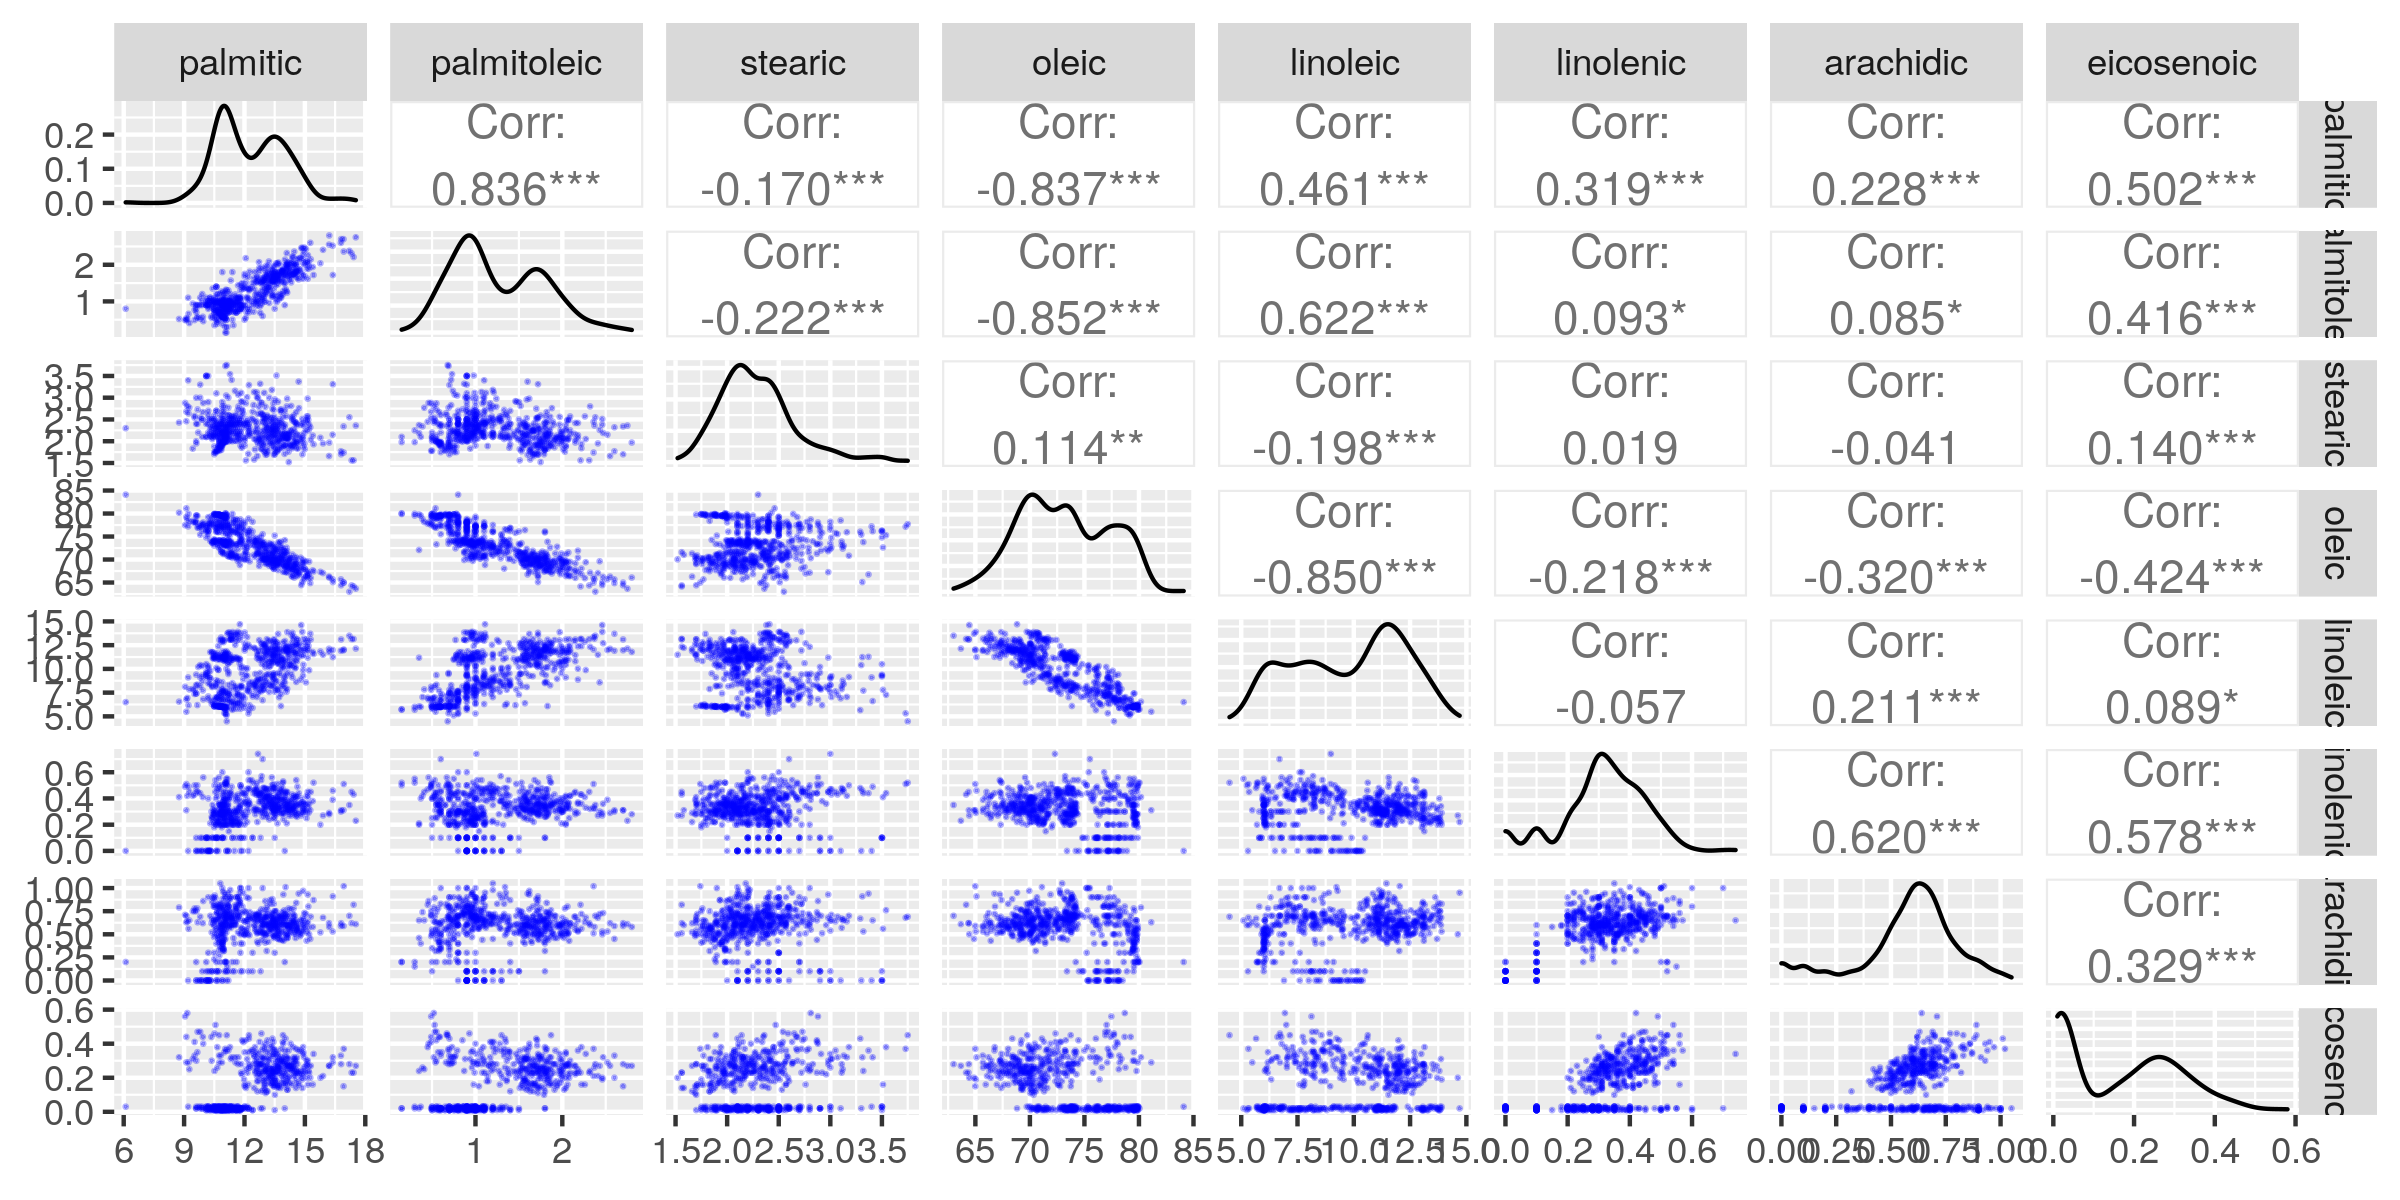

In [37]:
library(GGally)
options(repr.plot.height=4,repr.plot.width=8,repr.plot.res = 300)
ggpairs(olive[,c("palmitic","palmitoleic","stearic","oleic","linoleic","linolenic","arachidic","eicosenoic")],
       lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )

In [38]:
standarized_model <- caret::preProcess(olive, method = c("center", "scale"))
standarized_model

Created from 572 samples and 10 variables

Pre-processing:
  - centered (8)
  - ignored (2)
  - scaled (8)


In [41]:
olive_standarized = predict(standarized_model,olive)

In [42]:
summary(olive_standarized)

            region                 area        palmitic        palmitoleic     
 Northern Italy:151   South-Apulia   :206   Min.   :-3.6878   Min.   :-2.1163  
 Sardinia      : 98   Inland-Sardinia: 65   1st Qu.:-0.8111   1st Qu.:-0.7304  
 Southern Italy:323   Calabria       : 56   Median :-0.1823   Median :-0.3066  
                      Umbria         : 51   Mean   : 0.0000   Mean   : 0.0000  
                      East-Liguria   : 50   3rd Qu.: 0.7608   3rd Qu.: 0.8221  
                      West-Liguria   : 50   Max.   : 3.0918   Max.   : 2.9318  
                      (Other)        : 94                                      
    stearic            oleic             linoleic         linolenic       
 Min.   :-2.0919   Min.   :-2.49316   Min.   :-2.1933   Min.   :-2.45885  
 1st Qu.:-0.6495   1st Qu.:-0.76821   1st Qu.:-0.8640   1st Qu.:-0.45403  
 Median :-0.1596   Median :-0.02279   Median : 0.2038   Median : 0.08574  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean

In [43]:
colMeans(olive_standarized[,3:10])

palmitic   palmitoleic       stearic         oleic      linoleic 
 2.073419e-16  1.044473e-16 -3.448218e-17  7.326841e-16 -2.305787e-16 
    linolenic     arachidic    eicosenoic 
 1.499626e-16 -2.742804e-17 -2.127766e-17

In [44]:
sapply(olive_standarized[,3:10],sd)

palmitic palmitoleic     stearic       oleic    linoleic   linolenic 
          1           1           1           1           1           1 
  arachidic  eicosenoic 
          1           1

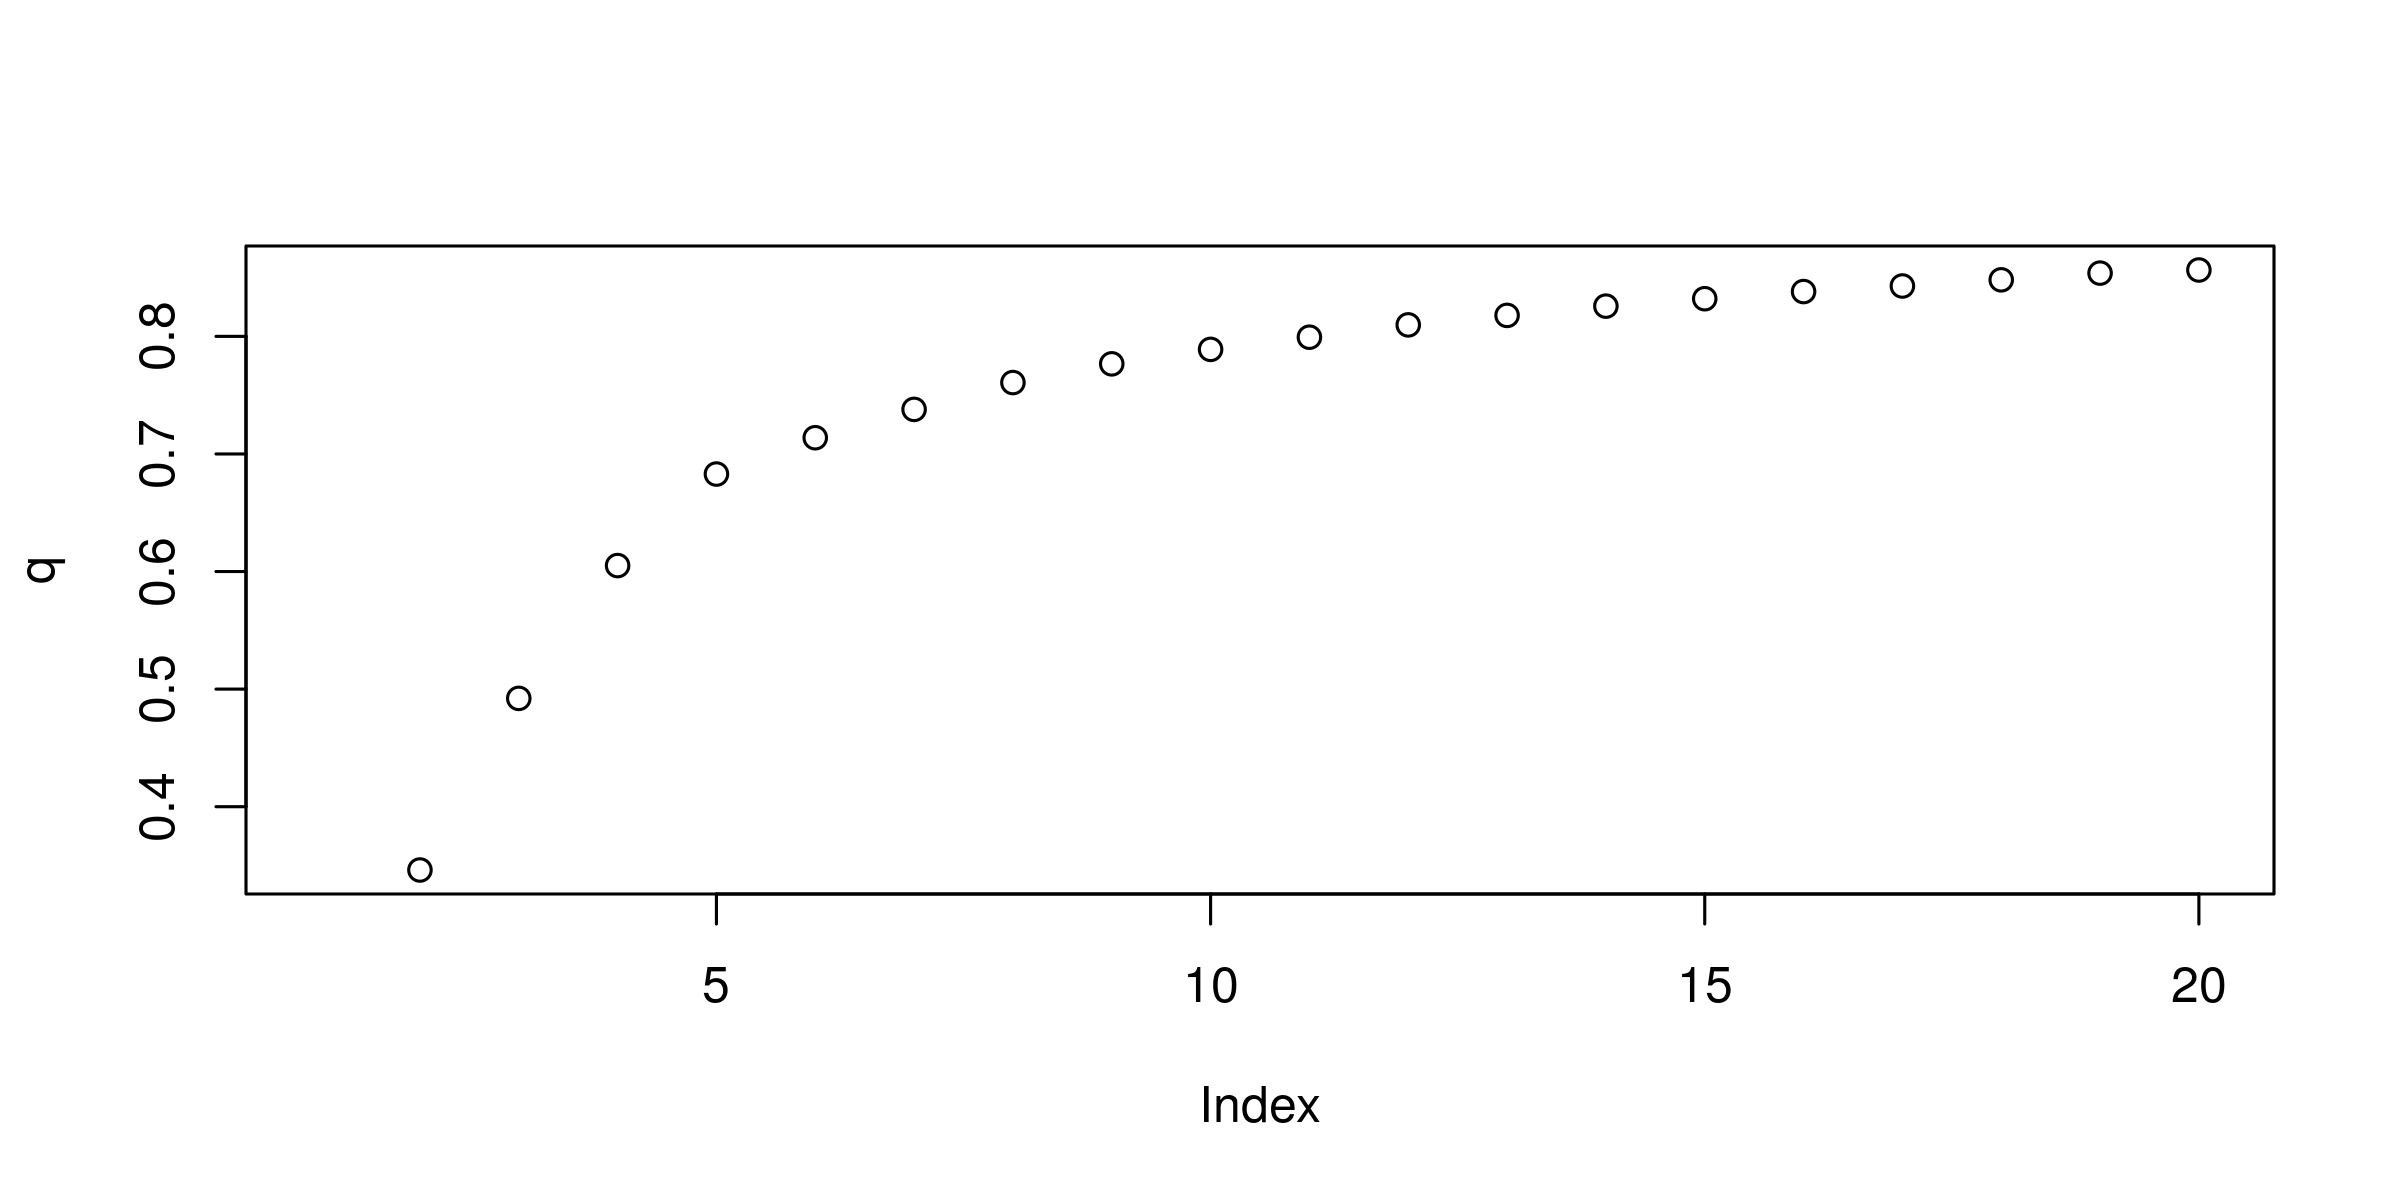

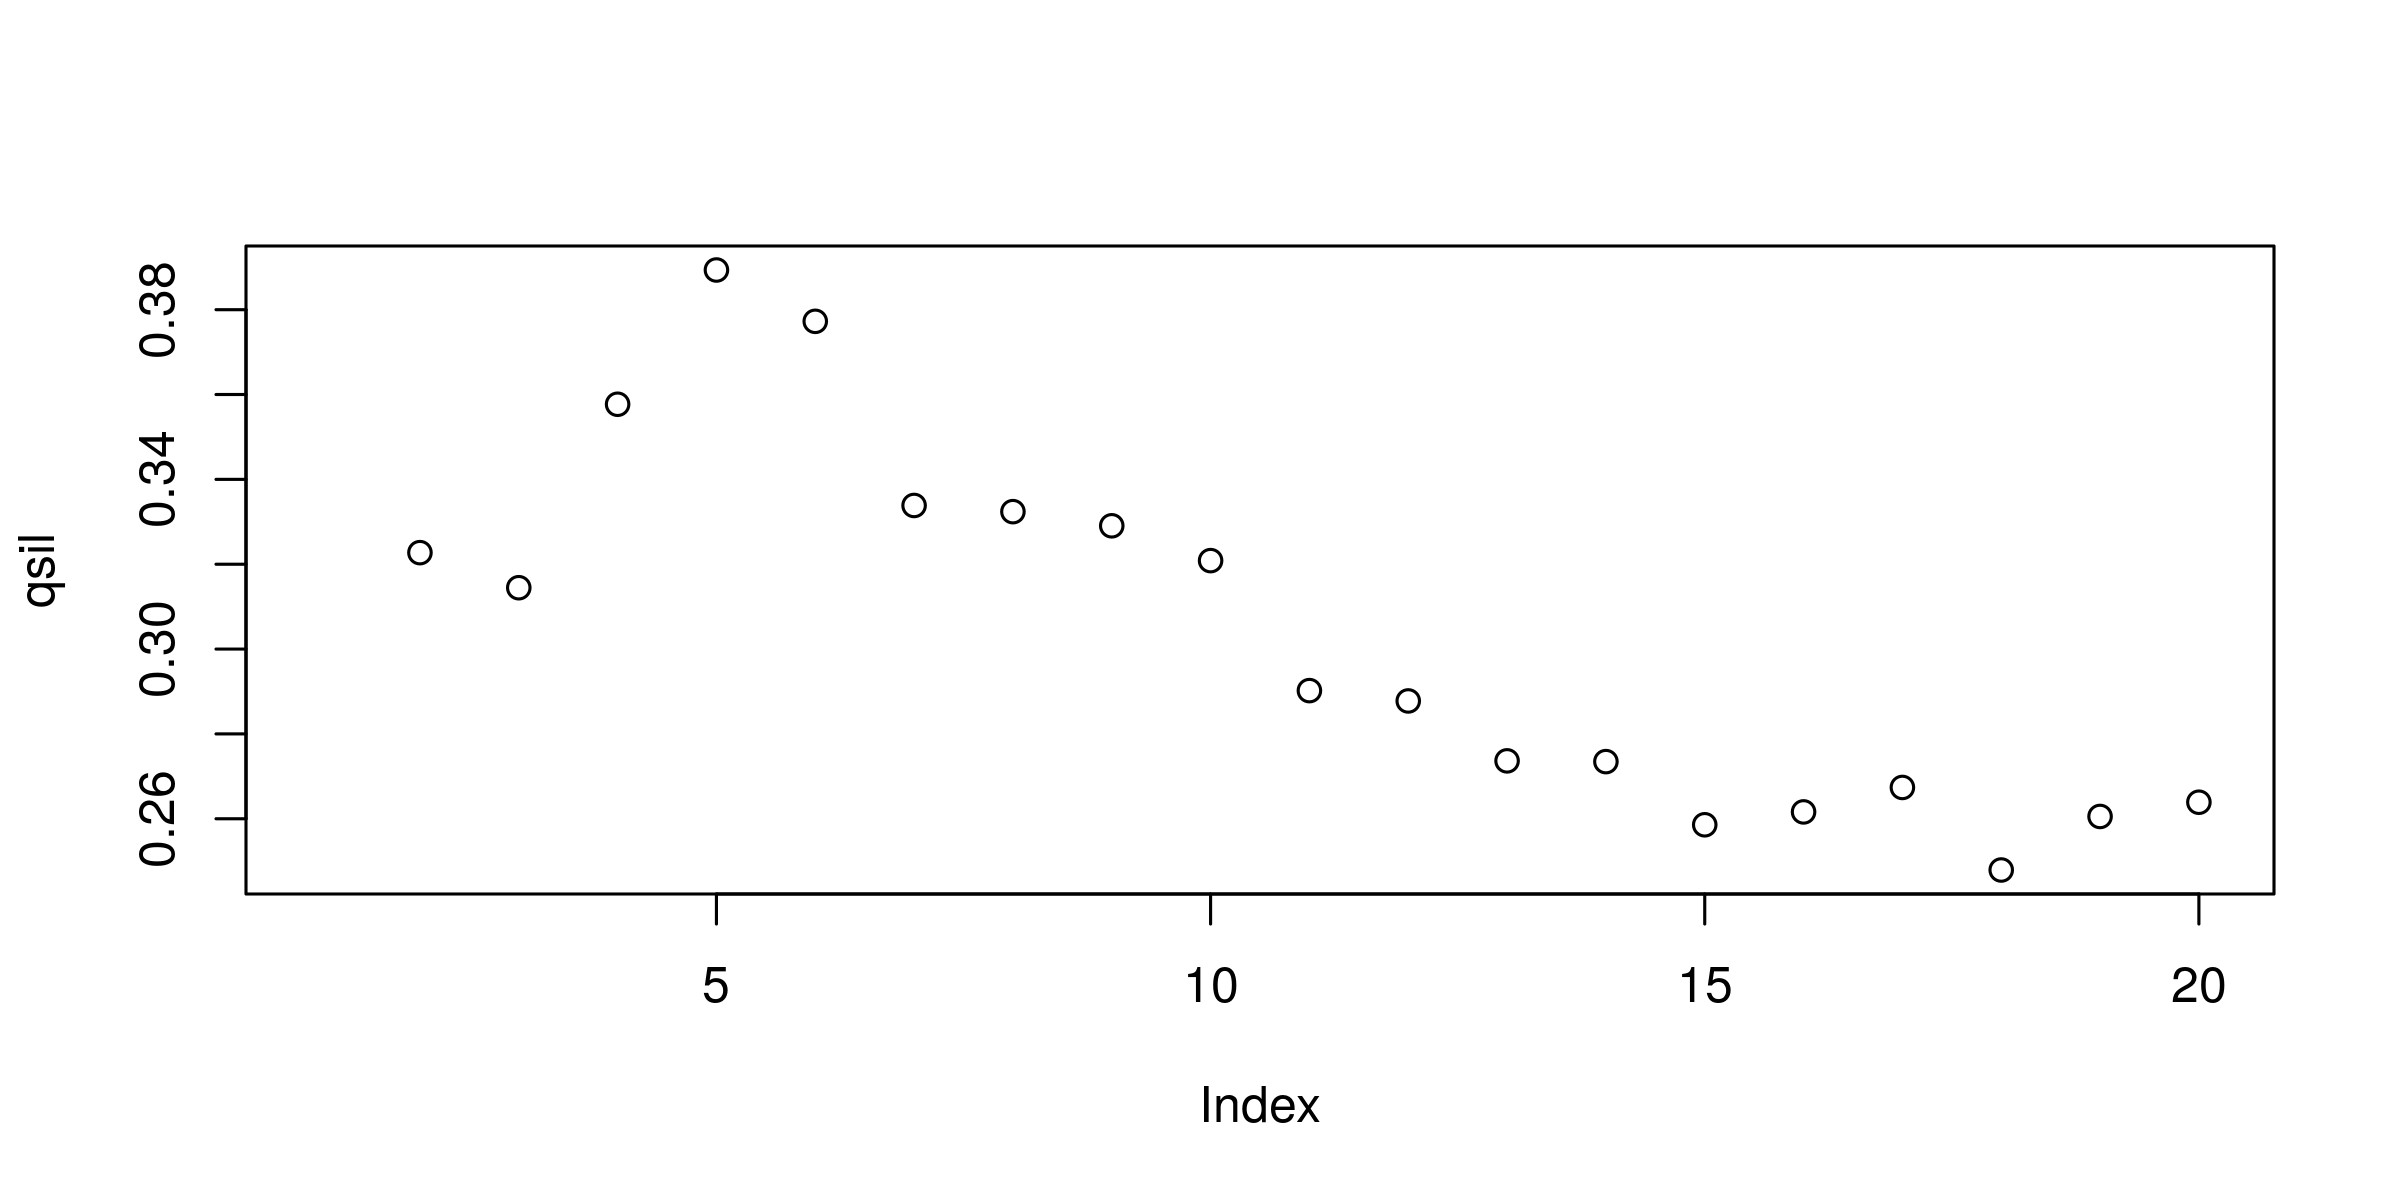

In [45]:
library(cluster)

q<-c()
qsil<-c()
data_olive<-olive_standarized[,3:10]
for (k in 2:20){
    myclust<-kmeans(data_olive,centers=k,nstart=30)
    q[k]<-myclust$betweenss/myclust$totss
    
    ss<-silhouette(myclust$cluster, dist(data_olive))    
    qsil[k]<-mean(ss[, "sil_width"])
}
plot(q)
plot(qsil)

In [46]:
?kmeans

In [47]:
k<-5
myclust<-kmeans(olive_standarized[,3:10],centers=k,nstart=30)

In [48]:
olive$cluster=factor(myclust$cluster)
summary(olive)

            region                 area        palmitic      palmitoleic    
 Northern Italy:151   South-Apulia   :206   Min.   : 6.10   Min.   :0.1500  
 Sardinia      : 98   Inland-Sardinia: 65   1st Qu.:10.95   1st Qu.:0.8775  
 Southern Italy:323   Calabria       : 56   Median :12.01   Median :1.1000  
                      Umbria         : 51   Mean   :12.32   Mean   :1.2609  
                      East-Liguria   : 50   3rd Qu.:13.60   3rd Qu.:1.6925  
                      West-Liguria   : 50   Max.   :17.53   Max.   :2.8000  
                      (Other)        : 94                                   
    stearic          oleic          linoleic        linolenic     
 Min.   :1.520   Min.   :63.00   Min.   : 4.480   Min.   :0.0000  
 1st Qu.:2.050   1st Qu.:70.00   1st Qu.: 7.707   1st Qu.:0.2600  
 Median :2.230   Median :73.03   Median :10.300   Median :0.3300  
 Mean   :2.289   Mean   :73.12   Mean   : 9.805   Mean   :0.3189  
 3rd Qu.:2.490   3rd Qu.:76.80   3rd Qu.:11.807  

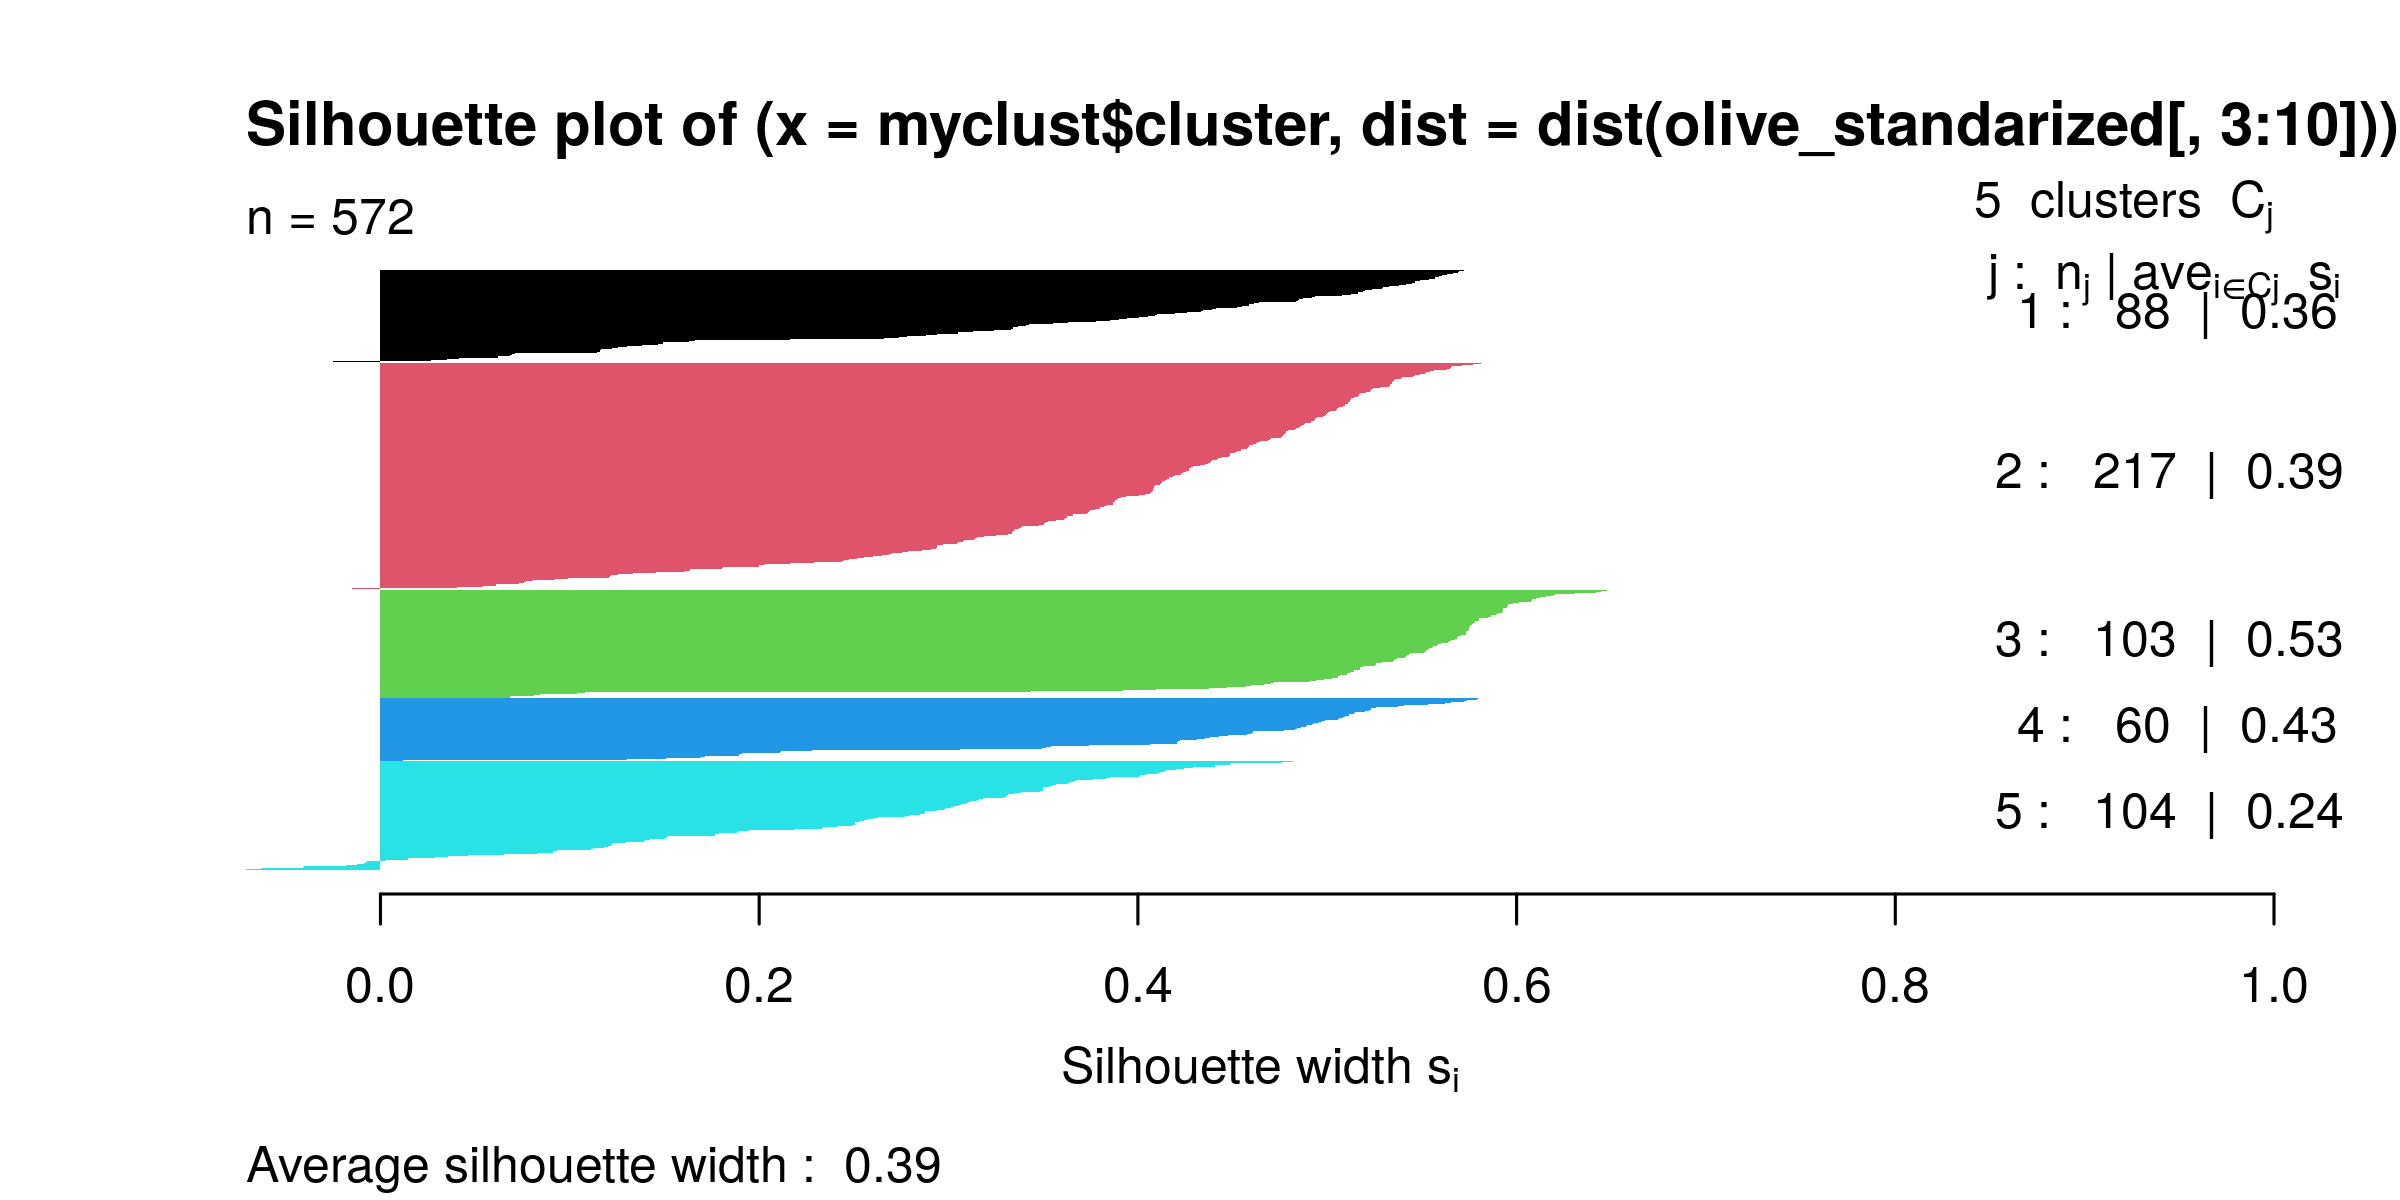

In [49]:
ss<-silhouette(myclust$cluster, dist(olive_standarized[,3:10]))
plot(ss,col=1:k,border=NA)

In [51]:
#olive %>% summary()
summary(olive)

            region                 area        palmitic      palmitoleic    
 Northern Italy:151   South-Apulia   :206   Min.   : 6.10   Min.   :0.1500  
 Sardinia      : 98   Inland-Sardinia: 65   1st Qu.:10.95   1st Qu.:0.8775  
 Southern Italy:323   Calabria       : 56   Median :12.01   Median :1.1000  
                      Umbria         : 51   Mean   :12.32   Mean   :1.2609  
                      East-Liguria   : 50   3rd Qu.:13.60   3rd Qu.:1.6925  
                      West-Liguria   : 50   Max.   :17.53   Max.   :2.8000  
                      (Other)        : 94                                   
    stearic          oleic          linoleic        linolenic     
 Min.   :1.520   Min.   :63.00   Min.   : 4.480   Min.   :0.0000  
 1st Qu.:2.050   1st Qu.:70.00   1st Qu.: 7.707   1st Qu.:0.2600  
 Median :2.230   Median :73.03   Median :10.300   Median :0.3300  
 Mean   :2.289   Mean   :73.12   Mean   : 9.805   Mean   :0.3189  
 3rd Qu.:2.490   3rd Qu.:76.80   3rd Qu.:11.807  

In [50]:
suppressMessages(library(dplyr))
olive %>% filter(cluster==1) %>% summary()

            region                area       palmitic      palmitoleic    
 Northern Italy:81   Umbria         :51   Min.   : 9.11   Min.   :0.1500  
 Sardinia      : 0   East-Liguria   :30   1st Qu.:10.75   1st Qu.:0.5800  
 Southern Italy: 7   North-Apulia   : 6   Median :10.95   Median :0.7000  
                     Calabria       : 1   Mean   :10.99   Mean   :0.6878  
                     Coast-Sardinia : 0   3rd Qu.:11.20   3rd Qu.:0.8000  
                     Inland-Sardinia: 0   Max.   :12.20   Max.   :1.3600  
                     (Other)        : 0                                   
    stearic          oleic          linoleic       linolenic     
 Min.   :1.700   Min.   :76.10   Min.   :5.100   Min.   :0.1000  
 1st Qu.:1.900   1st Qu.:78.15   1st Qu.:6.000   1st Qu.:0.2425  
 Median :2.035   Median :79.45   Median :6.050   Median :0.3000  
 Mean   :2.117   Mean   :78.87   Mean   :6.288   Mean   :0.3124  
 3rd Qu.:2.322   3rd Qu.:79.61   3rd Qu.:6.700   3rd Qu.:0.3900  
 Max

In [52]:
olive %>% filter(cluster==2) %>% summary()

            region                 area        palmitic      palmitoleic   
 Northern Italy:  0   South-Apulia   :204   Min.   :11.68   Min.   :1.290  
 Sardinia      :  0   Sicily         : 10   1st Qu.:13.30   1st Qu.:1.630  
 Southern Italy:217   Calabria       :  3   Median :13.87   Median :1.780  
                      Coast-Sardinia :  0   Mean   :13.98   Mean   :1.831  
                      East-Liguria   :  0   3rd Qu.:14.53   3rd Qu.:1.990  
                      Inland-Sardinia:  0   Max.   :17.53   Max.   :2.800  
                      (Other)        :  0                                  
    stearic          oleic          linoleic       linolenic     
 Min.   :1.520   Min.   :63.00   Min.   : 8.23   Min.   :0.2000  
 1st Qu.:1.930   1st Qu.:68.04   1st Qu.:10.86   1st Qu.:0.3100  
 Median :2.090   Median :69.38   Median :11.80   Median :0.3400  
 Mean   :2.124   Mean   :69.14   Mean   :11.57   Mean   :0.3498  
 3rd Qu.:2.290   3rd Qu.:70.32   3rd Qu.:12.33   3rd Qu.:0.390

In [53]:
olive %>% filter(cluster==3) %>% summary()

            region                area       palmitic      palmitoleic    
 Northern Italy: 5   Inland-Sardinia:65   Min.   :10.30   Min.   :0.3500  
 Sardinia      :98   Coast-Sardinia :33   1st Qu.:10.87   1st Qu.:0.8850  
 Southern Italy: 0   East-Liguria   : 5   Median :11.10   Median :0.9600  
                     Calabria       : 0   Mean   :11.14   Mean   :0.9661  
                     North-Apulia   : 0   3rd Qu.:11.40   3rd Qu.:1.0400  
                     Sicily         : 0   Max.   :12.13   Max.   :1.3500  
                     (Other)        : 0                                   
    stearic          oleic          linoleic       linolenic     
 Min.   :1.900   Min.   :68.82   Min.   : 7.40   Min.   :0.1500  
 1st Qu.:2.120   1st Qu.:71.44   1st Qu.:11.09   1st Qu.:0.2300  
 Median :2.220   Median :73.35   Median :11.42   Median :0.2700  
 Mean   :2.264   Mean   :72.83   Mean   :11.76   Mean   :0.2752  
 3rd Qu.:2.400   3rd Qu.:73.86   3rd Qu.:13.05   3rd Qu.:0.3050  
 Max

In [54]:
olive %>% filter(cluster==4) %>% summary()

            region                area       palmitic      palmitoleic   
 Northern Italy:60   West-Liguria   :50   Min.   : 6.10   Min.   :0.700  
 Sardinia      : 0   East-Liguria   :10   1st Qu.:10.10   1st Qu.:0.900  
 Southern Italy: 0   Calabria       : 0   Median :10.55   Median :1.000  
                     Coast-Sardinia : 0   Mean   :10.68   Mean   :1.038  
                     Inland-Sardinia: 0   3rd Qu.:11.12   3rd Qu.:1.100  
                     North-Apulia   : 0   Max.   :14.00   Max.   :1.800  
                     (Other)        : 0                                  
    stearic          oleic          linoleic        linolenic   
 Min.   :2.000   Min.   :73.40   Min.   : 5.300   Min.   :0.00  
 1st Qu.:2.275   1st Qu.:76.10   1st Qu.: 7.850   1st Qu.:0.00  
 Median :2.500   Median :77.10   Median : 8.650   Median :0.05  
 Mean   :2.555   Mean   :77.01   Mean   : 8.573   Mean   :0.05  
 3rd Qu.:2.725   3rd Qu.:78.03   3rd Qu.: 9.625   3rd Qu.:0.10  
 Max.   :3.500   M

In [55]:
olive %>% filter(cluster==5) %>% summary()

            region               area       palmitic      palmitoleic    
 Northern Italy: 5   Calabria      :52   Min.   : 8.75   Min.   :0.3900  
 Sardinia      : 0   Sicily        :26   1st Qu.:11.08   1st Qu.:0.6975  
 Southern Italy:99   North-Apulia  :19   Median :12.48   Median :1.0050  
                     East-Liguria  : 5   Mean   :12.09   Mean   :0.9779  
                     South-Apulia  : 2   3rd Qu.:13.04   3rd Qu.:1.2025  
                     Coast-Sardinia: 0   Max.   :14.69   Max.   :1.8300  
                     (Other)       : 0                                   
    stearic          oleic          linoleic        linolenic     
 Min.   :1.890   Min.   :66.75   Min.   : 4.480   Min.   :0.3000  
 1st Qu.:2.388   1st Qu.:72.73   1st Qu.: 7.190   1st Qu.:0.4200  
 Median :2.590   Median :73.94   Median : 7.940   Median :0.4500  
 Mean   :2.648   Mean   :74.58   Mean   : 7.880   Mean   :0.4583  
 3rd Qu.:2.873   3rd Qu.:76.83   3rd Qu.: 8.562   3rd Qu.:0.4900  
 Max. 

#### PAM (Partitioning Around Medoids) - k-medoids

Se basa en medoides. Es similar al kmeans pero en lugar de usar centroides se basa en medoides El centroide o centro geométrico es el punto resultante de la media aritmética de la posición de todos los puntos.


```
1 - elige k muestras al azar entre todas las muestras
2 - asigna el elemento al medoide más cercano
3 - recalcular medoides:
3.1 - Calcula la suma de la distancia de cada candidato a medoide con el resto de los puntos.
3.2 - Elije como medoide el punto cuya suma de las distancias sea menor.
4 - Repetir desde 2 mientras los medoides se sigan actualizando y el error siga disminuyendo.
```

El ligeramente más robusto que el kmeans porque este depende de la suma de elementos, no de la suma al cuadrado.

Funciona con definiciones de medidas arbitrarias.

https://www.rdocumentation.org/packages/cluster/versions/2.1.0/topics/pam

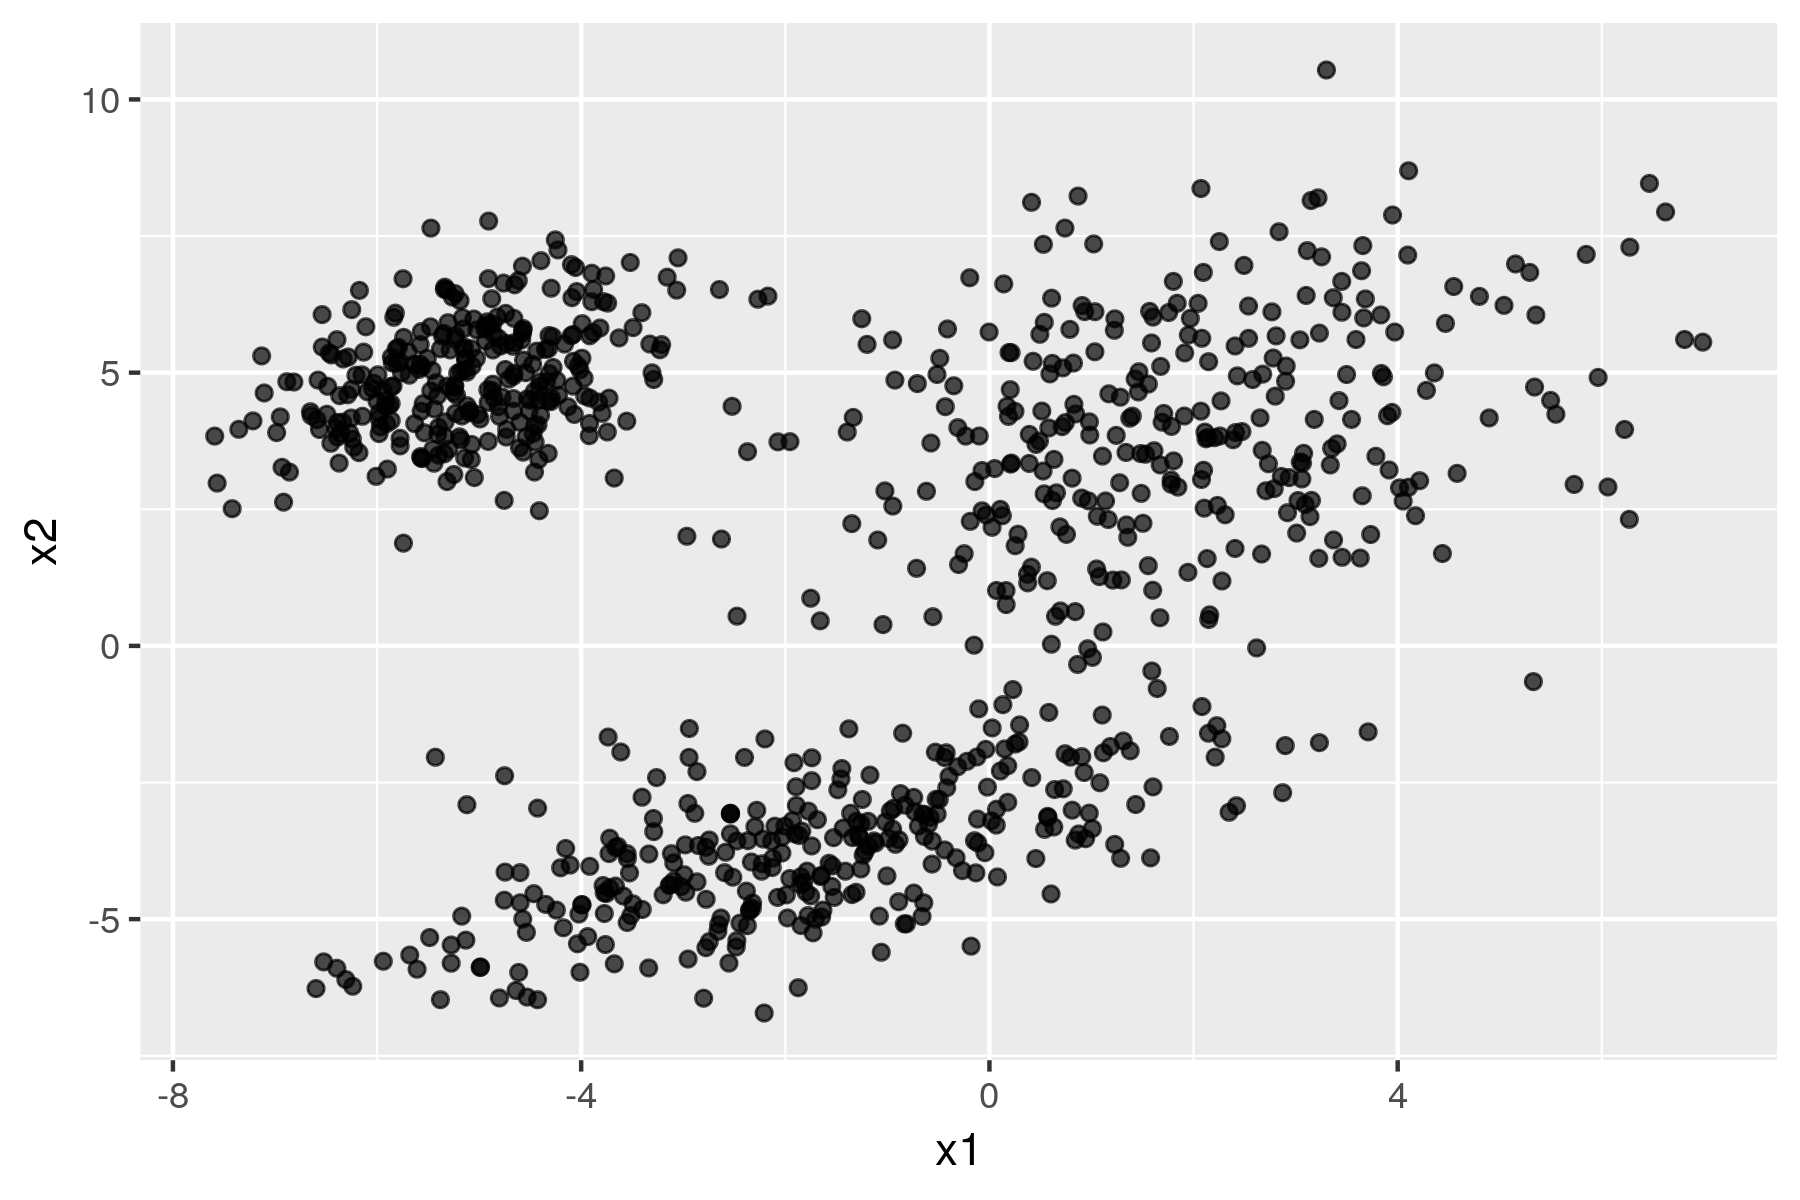

In [56]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)


N<-300
x1<-c(rnorm(N,mean=2,sd=2),rnorm(N,mean=-2,sd=2),rnorm(N,mean=-5,sd=1))
x2<-c(0.4*x1+c(rnorm(N,mean=3,sd=2),rnorm(N,mean=-3,sd=1),rnorm(N,mean=7,sd=1)))
df<-data.frame(x1,x2)

library(ggplot2)
ggplot(data=df, aes(x=x1,y=x2))+geom_point(alpha=0.7)

In [59]:
pam(df,k=3, cluster.only=FALSE)

Medoids:
      ID        x1        x2
[1,] 205  1.783886  4.016315
[2,] 591 -1.741750 -3.660574
[3,] 890 -5.120420  5.008771
Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1
 [38] 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
[149] 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
[186] 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[334] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[371] 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 

       x1                x2         group  
 Min.   :-7.5908   Min.   :-6.719   1:284  
 1st Qu.:-4.6412   1st Qu.:-2.969   2:311  
 Median :-1.8931   Median : 3.467   3:305  
 Mean   :-1.7032   Mean   : 1.671          
 3rd Qu.: 0.8698   3rd Qu.: 4.997          
 Max.   : 6.9891   Max.   :10.539          

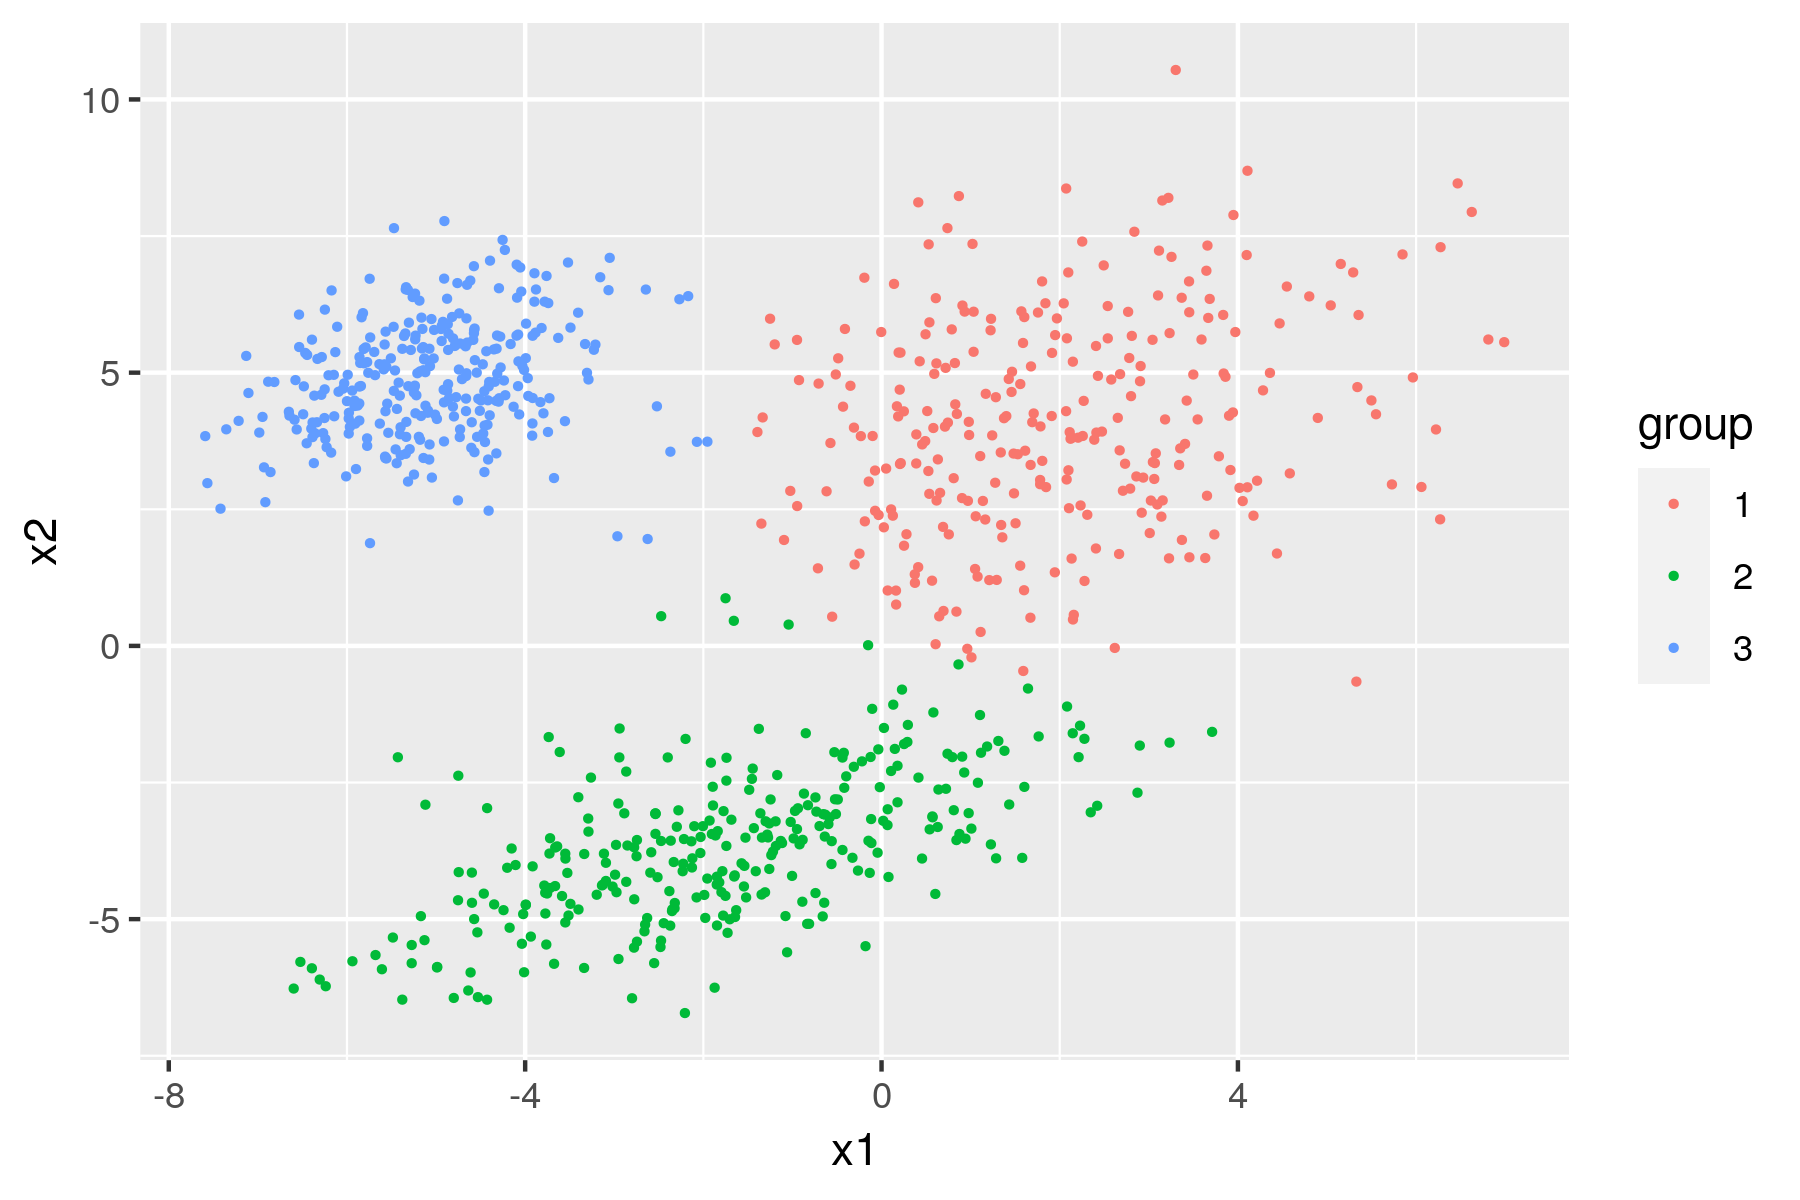

In [57]:
cl <- factor(pam(df,k=3, cluster.only=TRUE))

clustered<-cbind(df,group=cl)
summary(clustered)
ggplot(data=clustered,aes(x=x1,y=x2,color=group))+geom_point(size=0.5)

In [60]:
pam_cl<-pam(df,k=3, metric="manhattan")
pam_cl$medoids

x1        x2       
[1,]  1.783886  4.016315
[2,] -1.741750 -3.660574
[3,] -5.120420  5.008771

       x1                x2         group  
 Min.   :-7.5908   Min.   :-6.719   1:288  
 1st Qu.:-4.6412   1st Qu.:-2.969   2:307  
 Median :-1.8931   Median : 3.467   3:305  
 Mean   :-1.7032   Mean   : 1.671          
 3rd Qu.: 0.8698   3rd Qu.: 4.997          
 Max.   : 6.9891   Max.   :10.539          

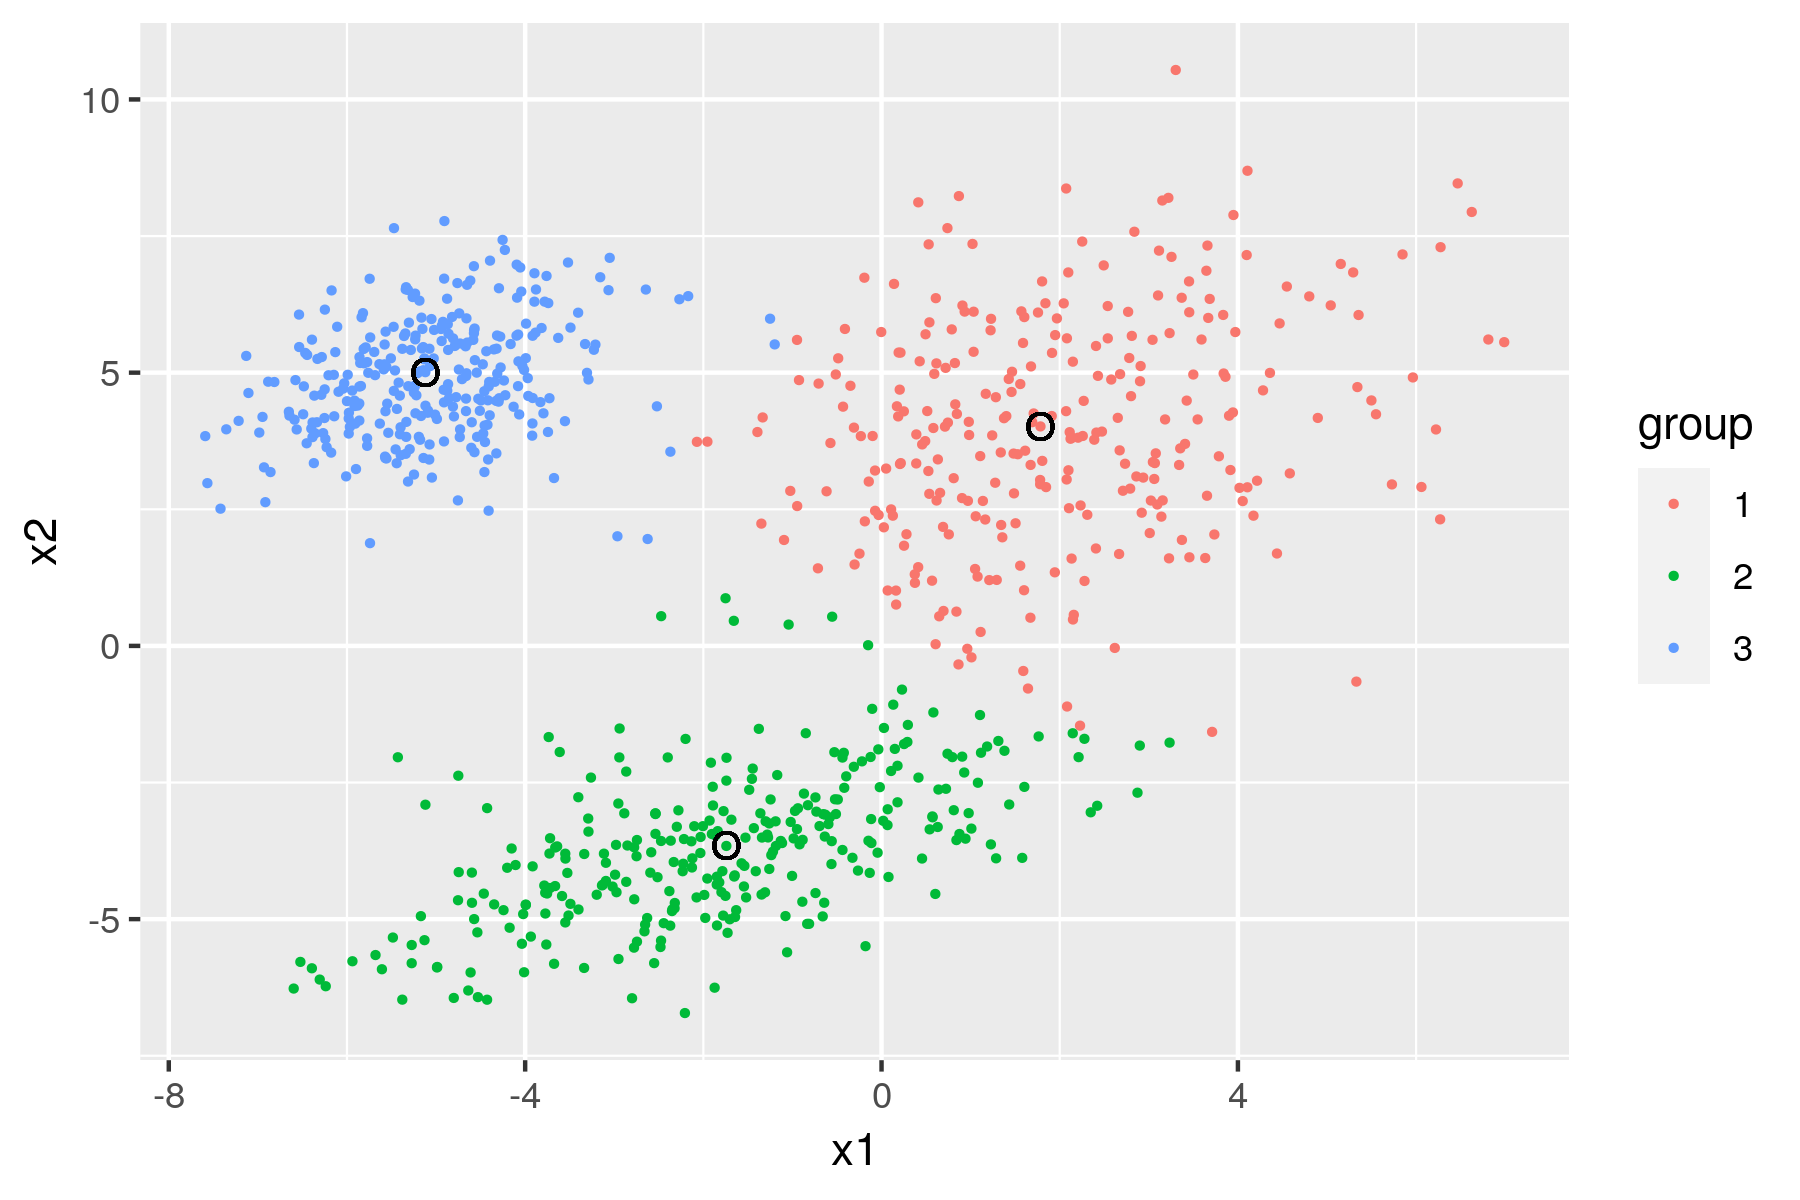

In [61]:

cl<-factor(pam_cl$clustering)

clustered<-cbind(df,group=cl)
summary(clustered)
ggplot(data=clustered,aes(x=x1,y=x2,color=group))+geom_point(size=0.5)+
 geom_point(x=pam_cl$medoids[1,1],y=pam_cl$medoids[1,2],color="black",shape='O',size=3)+
 geom_point(x=pam_cl$medoids[2,1],y=pam_cl$medoids[2,2],color="black",shape='O',size=3)+
 geom_point(x=pam_cl$medoids[3,1],y=pam_cl$medoids[3,2],color="black",shape='O',size=3)

In [62]:
pr<-pam(df,k=3, metric="manhattan")
str(pr)

List of 10
 $ medoids   : num [1:3, 1:2] 1.78 -1.74 -5.12 4.02 -3.66 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "x1" "x2"
 $ id.med    : int [1:3] 205 591 890
 $ clustering: int [1:900] 1 1 1 1 1 1 1 1 1 1 ...
 $ objective : Named num [1:2] 3.21 2.45
  ..- attr(*, "names")= chr [1:2] "build" "swap"
 $ isolation : Factor w/ 3 levels "no","L","L*": 1 1 1
  ..- attr(*, "names")= chr [1:3] "1" "2" "3"
 $ clusinfo  : num [1:3, 1:5] 288 307 305 9.13 7.47 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:5] "size" "max_diss" "av_diss" "diameter" ...
 $ silinfo   :List of 3
  ..$ widths         : num [1:900, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:900] "189" "66" "242" "217" ...
  .. .. ..$ : chr [1:3] "cluster" "neighbor" "sil_width"
  ..$ clus.avg.widths: num [1:3] 0.478 0.621 0.732
  ..$ avg.width      : num 0.613
 $ diss      : NULL
 $ call      : language pam(x = df, k = 3, metric = 

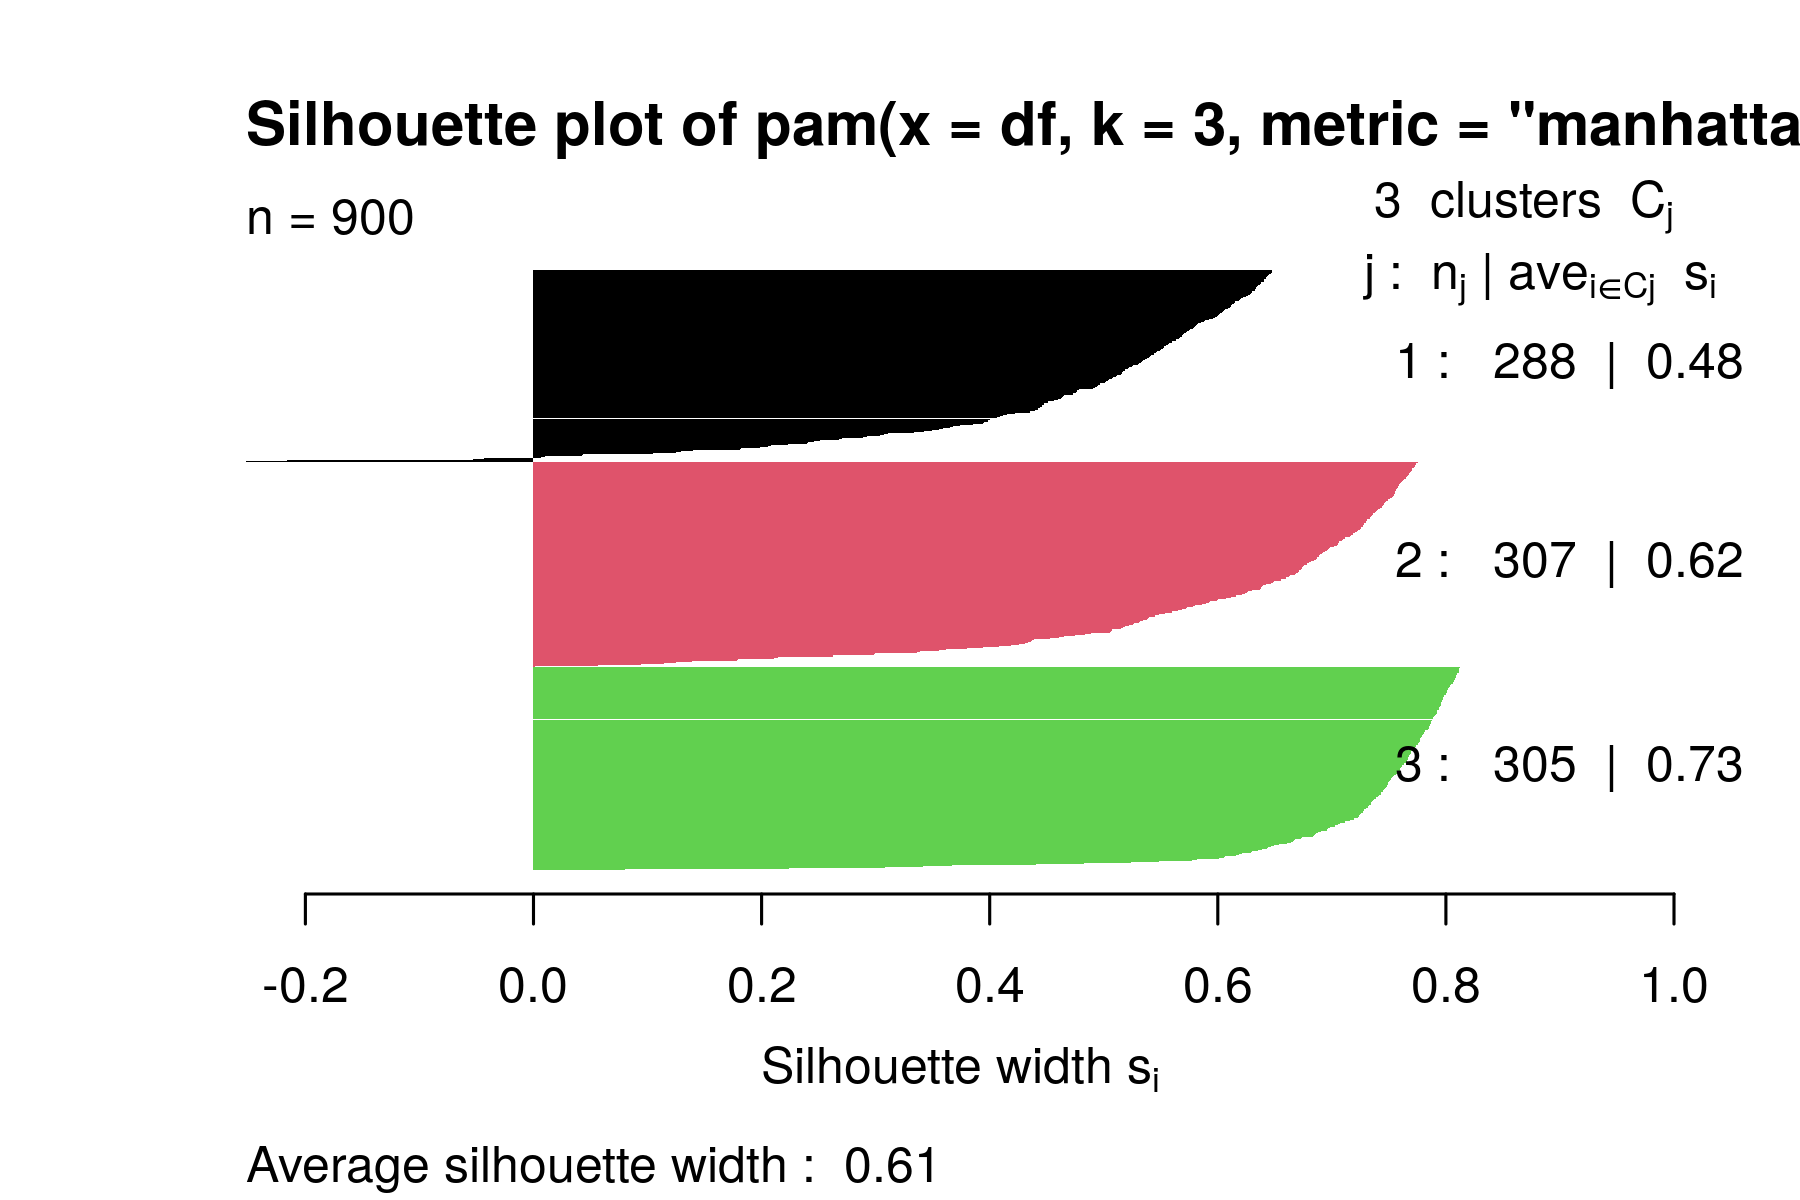

In [65]:
silhouette(pr)
plot(silhouette(pr),col=1:3,border=NA)

#### Ejemplo con mouse_data

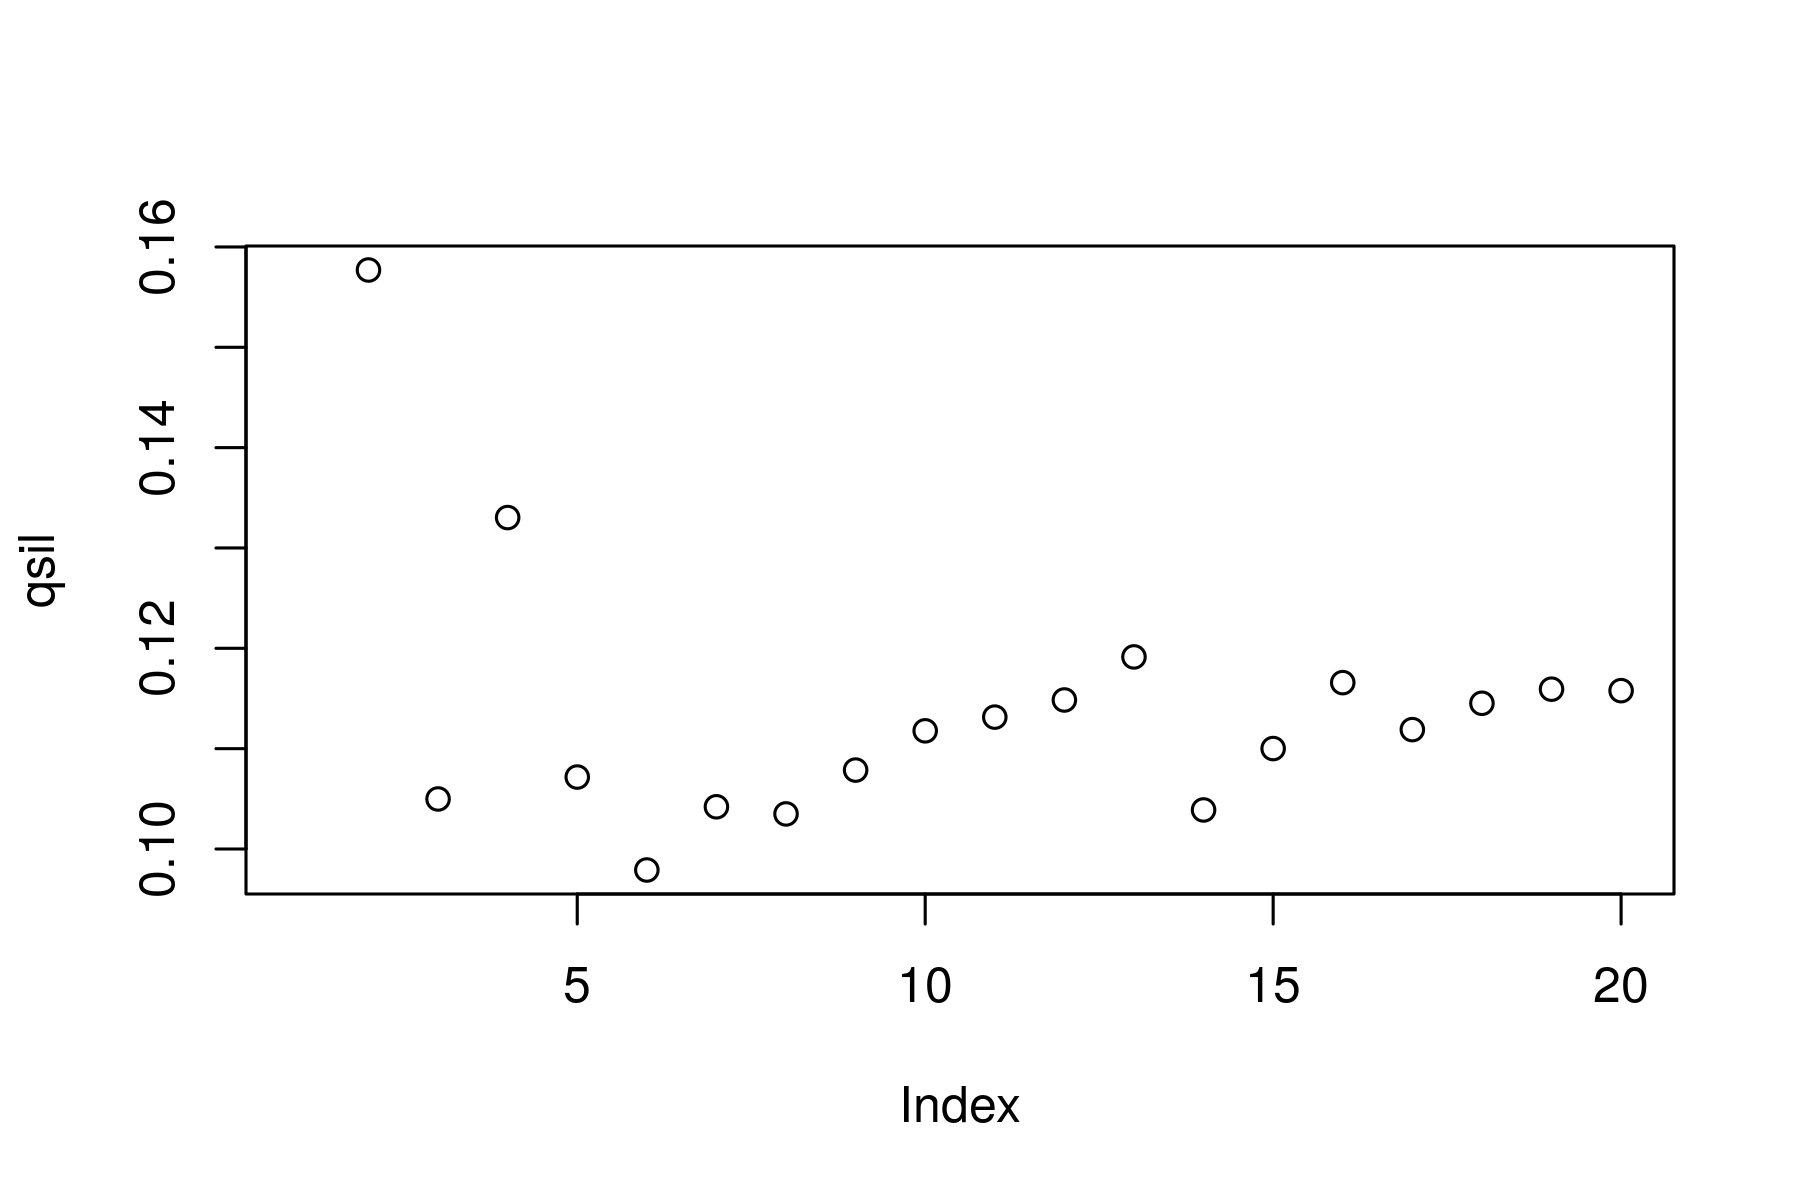

In [66]:
mouse<-read.csv("data/Data_Cortex_Nuclear.csv")
mouse_data<-mouse[,2:78]

preProcValues <- caret::preProcess(mouse_data, method = c("center", "scale"))
mouse_data_transformed <- predict(preProcValues, mouse_data)

qsil<-c()
for (k in 2:20){
    pr<-pam(mouse_data_transformed,k=k, metric="manhattan")
    ss<-silhouette(pr)
    qsil[k]<-mean(ss[, "sil_width"])
}
plot(qsil)

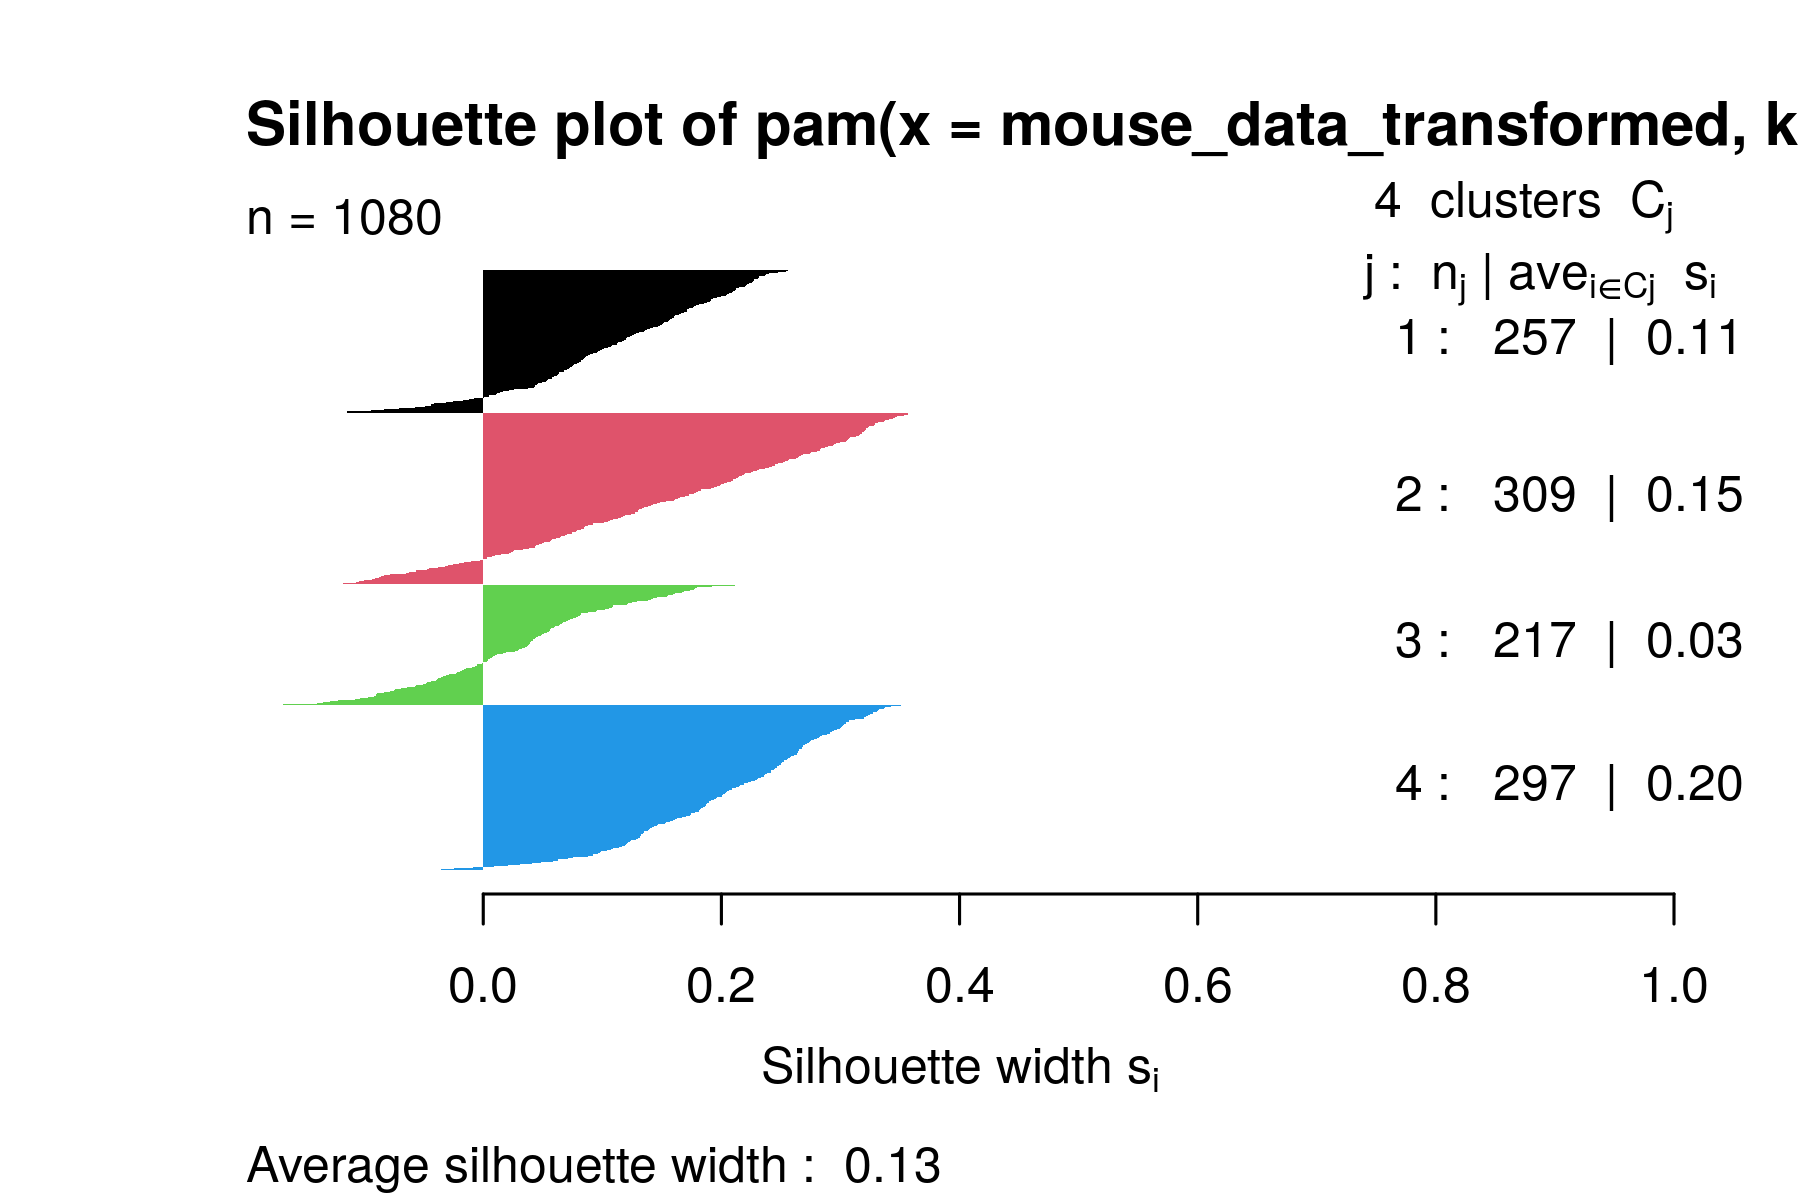

In [67]:
k<-4
pr<-pam(mouse_data_transformed,k=k, metric="manhattan")
ss<-silhouette(pr)
plot(ss,col=1:k,border=NA)

In [68]:
table(mouse$class,pr$cluster)
table(mouse$Genotype,pr$cluster)
table(mouse$Treatment,pr$cluster)
table(mouse$Behavior,pr$cluster)

        
          1  2  3  4
  c-CS-m 65 23 28 34
  c-CS-s 65 34 36  0
  c-SC-m  0 44 36 70
  c-SC-s  3 29 12 91
  t-CS-m 57 60 18  0
  t-CS-s 42 48 13  2
  t-SC-m  0 12 29 94
  t-SC-s 25 59 45  6

         
            1   2   3   4
  Control 133 130 112 195
  Ts65Dn  124 179 105 102

           
              1   2   3   4
  Memantine 122 139 111 198
  Saline    135 170 106  99

     
        1   2   3   4
  C/S 229 165  95  36
  S/C  28 144 122 261

## Algoritmos jerárquicos

Se basa en la idea central de que los objetos están más relacionados con objetos cercanos que con objetos más alejados. Estos algoritmos conectan "objetos" para formar "clusters" en función de su distancia. Hay dos enfoques para abordar este problema de agrupamiento:

* Aglomerativo (de abajo arriba): cada elemento comienza en su propio clúster. Iterativamente, los clústeres más similares se fusionan para finalizar con un gran clúster que contiene todos los elementos.
* Divisivo (de arriba hacia abajo): todos los elementos pertenecen al mismo grupo. Este clúster se divide iterativamente hasta que todos los clusters tengan solo un elemento.

La fusión o división de clusters se realiza en base a diferentes métodos para medir estas similitudes de clusters:

* single-linkage (SLCA): la distancia entre dos clusters es la distancia mínima que existe entre dos elementos que pertenecen a diferentes clusters.
![](img/cluster_single.png)
* complete-linkage (CLCA): la distancia entre dos clústeres es la distancia máxima que existe entre dos elementos que pertenecen a diferentes clústeres.
![](img/cluster_complete.png)
* average-linkage (unweighted pair group method with arithmetic mean, UPGMA): la distancia entre dos clusters es la distancia promedio que existe desde cualquier elemento en el primer clúster a cualquier elemento en el otro clúster.
![](img/cluster_average.png)
* cendroid-linkage (Unweighted pair group method with centroid, UPGMC): la distancia entre dos clusters es la distancia que existe entre los centroinds de cada cluster.
![](img/cluster_centroid.png)

### Ejemplo Iris

In [69]:
iris_data<-iris[,1:4]

for (i in 1:ncol(iris_data)){     
    mn<-mean(iris_data[,i],na.rm = T)
    sd<-sd(iris_data[,i],na.rm = T)
    
    iris_data[,i]<-(iris_data[,i]-mn)/sd    
}

In [70]:
d <- dist(as.matrix(iris_data),method = "euclidean")

In [72]:
str(d)

 'dist' num [1:11175] 1.172 0.843 1.1 0.259 1.035 ...
 - attr(*, "Size")= int 150
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 - attr(*, "method")= chr "euclidean"
 - attr(*, "call")= language dist(x = as.matrix(iris_data), method = "euclidean")


In [78]:
150*149/2

[1] 11175

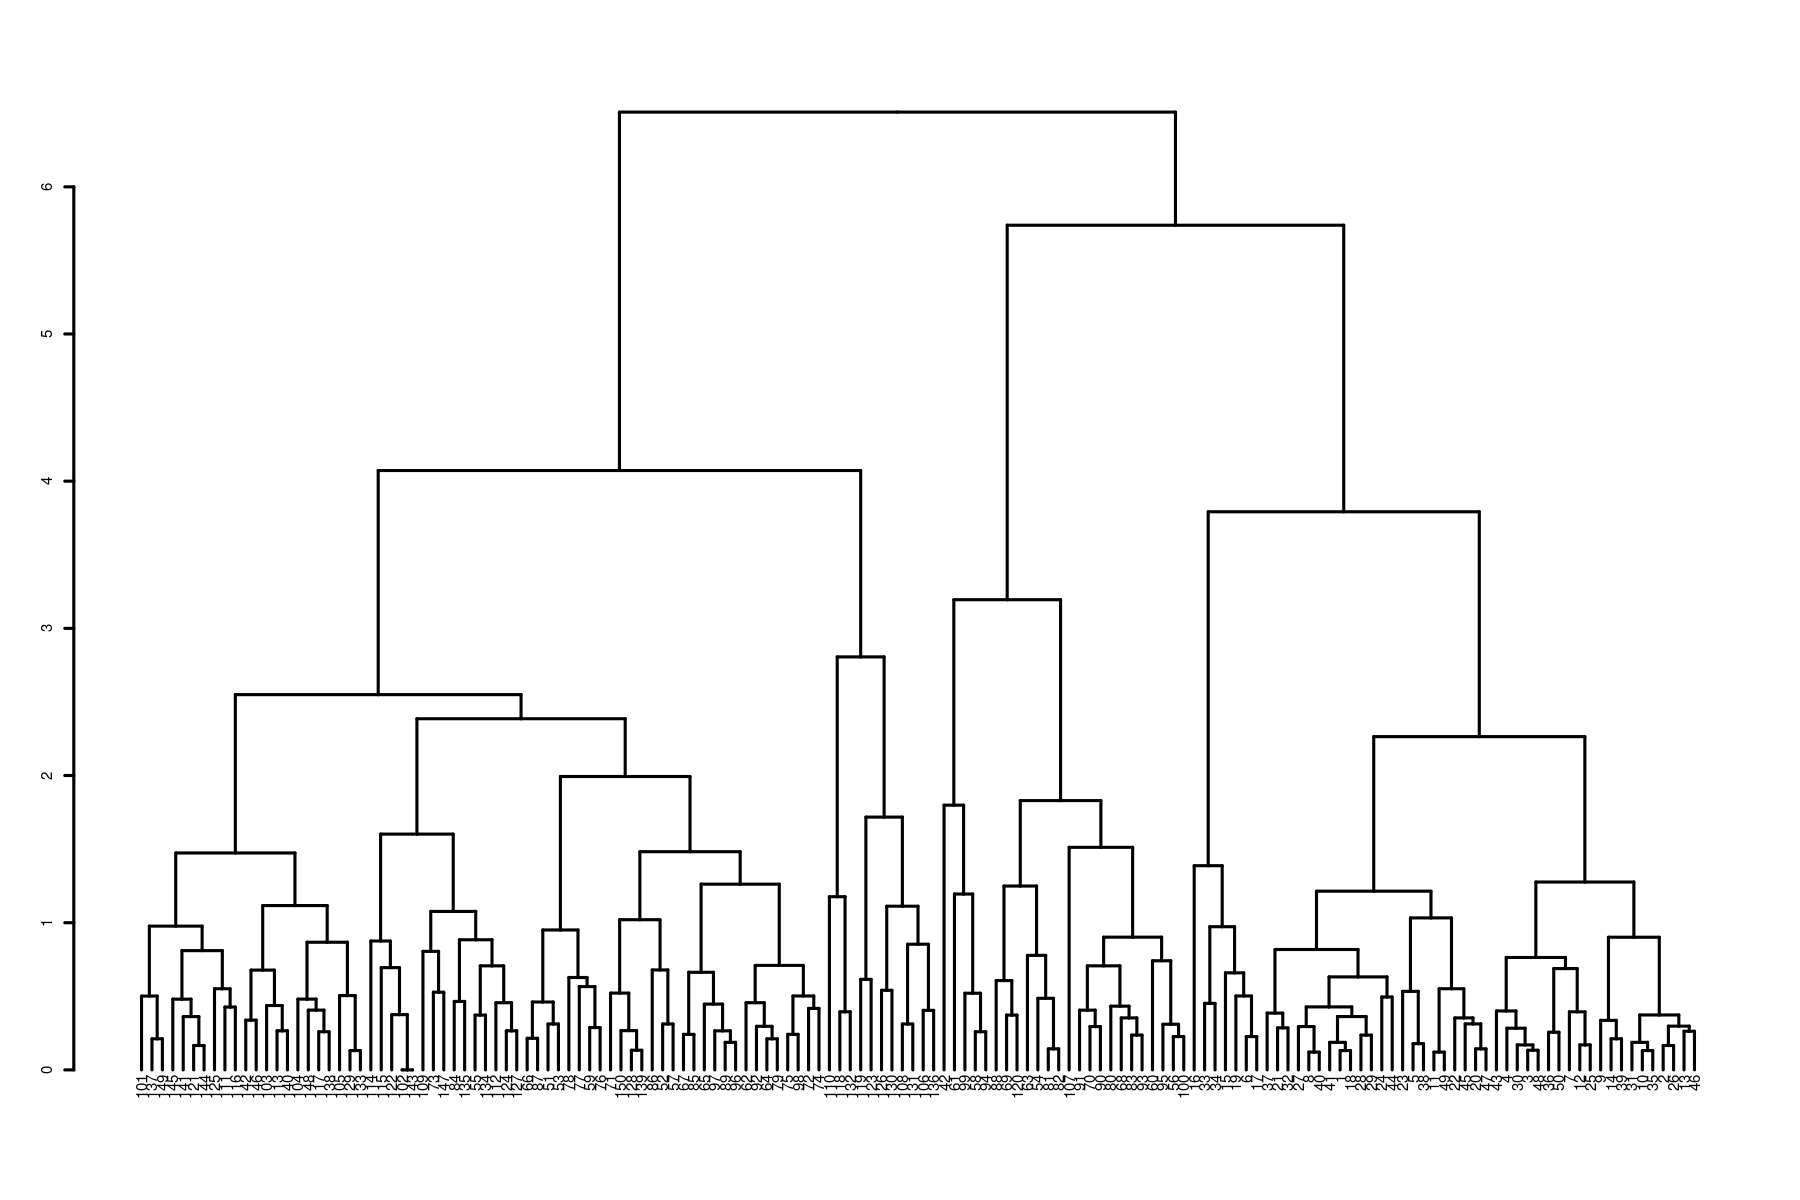

In [79]:
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
par(cex=0.3)
plot(hcd)

In [81]:
hcd

'dendrogram' with 2 branches and 150 members total, at height 6.507523 

In [80]:
iris$Species[labels(hcd)]

[1] virginica  virginica  virginica  virginica  virginica  virginica 
  [7] virginica  virginica  virginica  virginica  virginica  virginica 
 [13] virginica  virginica  virginica  virginica  virginica  virginica 
 [19] virginica  virginica  virginica  virginica  virginica  virginica 
 [25] virginica  virginica  virginica  virginica  versicolor virginica 
 [31] versicolor virginica  versicolor virginica  virginica  virginica 
 [37] virginica  versicolor versicolor versicolor versicolor versicolor
 [43] versicolor versicolor versicolor versicolor virginica  virginica 
 [49] virginica  versicolor versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] virginica  virginica  virginica  virginica  virginica  virginica 
 [73] virginica  virginica  virginica  virginica  virginica  setosa    
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] virginica  versicolor versicolor versicolor versicolor virginica 
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor versicolor setosa    
[103] setosa     setosa     setosa     setosa     setosa     setosa    
[109] setosa     setosa     setosa     setosa     setosa     setosa    
[115] setosa     setosa     setosa     setosa     setosa     setosa    
[121] setosa     setosa     setosa     setosa     setosa     setosa    
[127] setosa     setosa     setosa     setosa     setosa     setosa    
[133] setosa     setosa     setosa     setosa     setosa     setosa    
[139] setosa     setosa     setosa     setosa     setosa     setosa    
[145] setosa     setosa     setosa     setosa     setosa     setosa    
Levels: setosa versicolor virginica


---------------------
Welcome to dendextend version 1.15.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




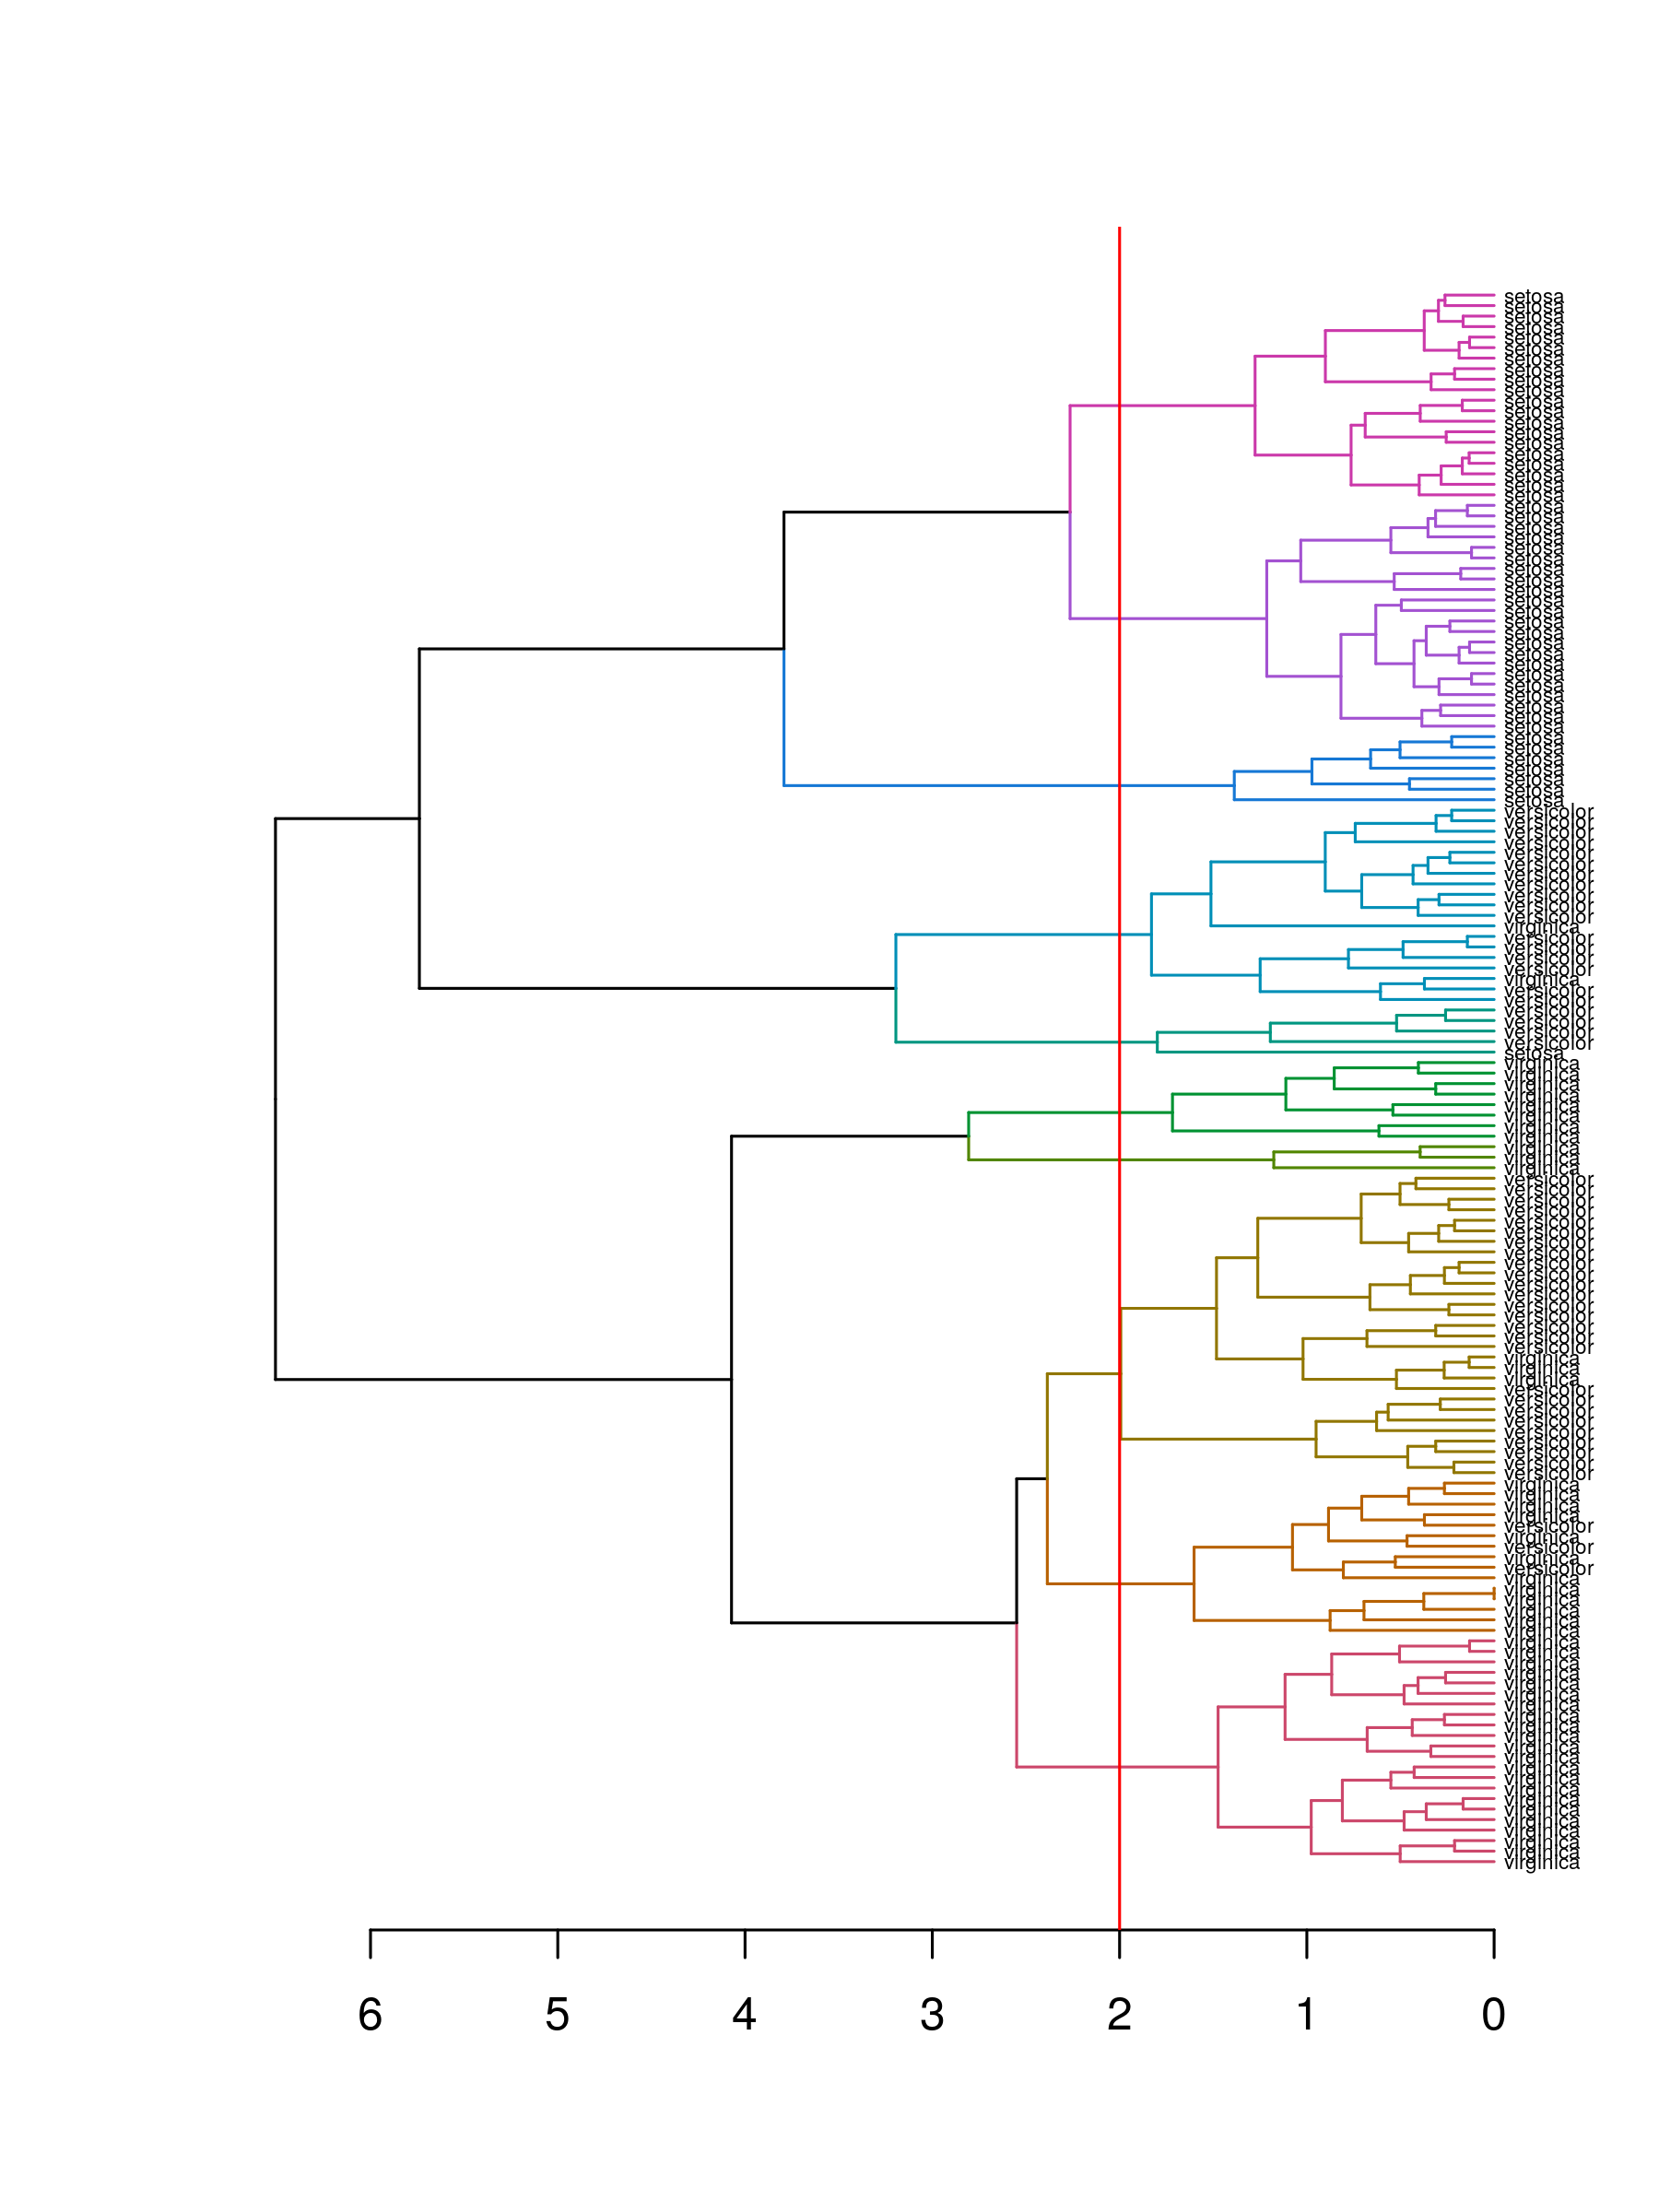

In [82]:
library(dendextend)
options(repr.plot.height=8,repr.plot.width=6,repr.plot.res = 300)
labels(hcd)<-iris$Species[labels(hcd)]
hcd<-set(hcd,"labels_cex", 0.45) 
plot(color_branches(hcd,h=2),horiz=TRUE,cex=0)
abline(v=2,col="red")
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

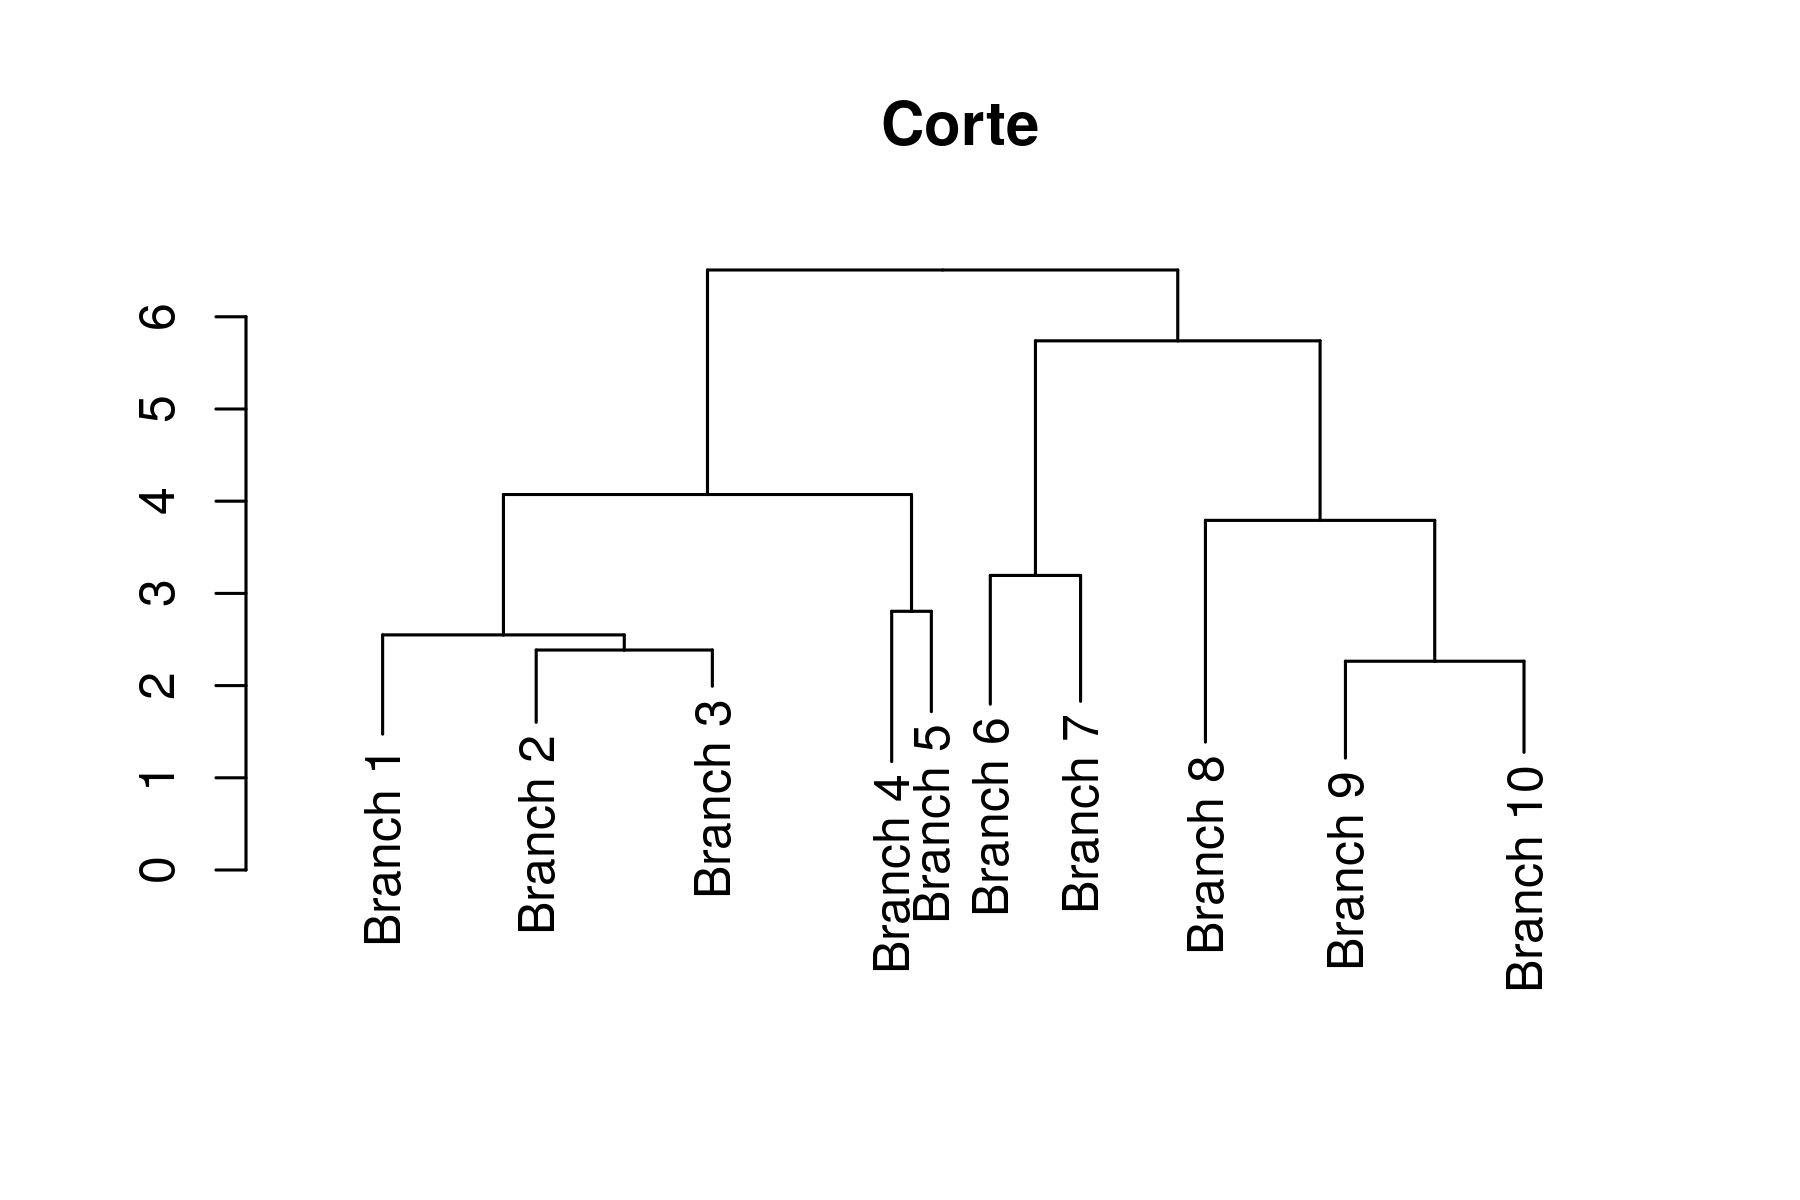

In [83]:
plot(cut(hcd, h = 2)$upper, main = "Corte", cex=1)

In [84]:
cut(hcd, h = 2)$lower

[[1]]
'dendrogram' with 2 branches and 22 members total, at height 1.473958 

[[2]]
'dendrogram' with 2 branches and 15 members total, at height 1.602231 

[[3]]
'dendrogram' with 2 branches and 29 members total, at height 1.9935 

[[4]]
'dendrogram' with 2 branches and 3 members total, at height 1.176572 

[[5]]
'dendrogram' with 2 branches and 8 members total, at height 1.717484 

[[6]]
'dendrogram' with 2 branches and 5 members total, at height 1.798563 

[[7]]
'dendrogram' with 2 branches and 19 members total, at height 1.829634 

[[8]]
'dendrogram' with 2 branches and 7 members total, at height 1.38744 

[[9]]
'dendrogram' with 2 branches and 22 members total, at height 1.214102 

[[10]]
'dendrogram' with 2 branches and 20 members total, at height 1.276517 


In [85]:
cutree(hc,h=2)

[1]  1  2  2  2  1  3  2  1  2  2  1  2  2  2  3  3  3  1  3  1  1  1  1  1  2
 [26]  2  1  1  1  2  2  1  3  3  2  2  1  1  2  1  1  4  2  1  1  2  1  2  1  2
 [51]  5  5  5  6  7  6  5  4  5  6  4  5  6  5  5  5  5  6  6  6  5  5  7  5  5
 [76]  5  5  5  5  6  6  6  6  7  5  5  5  6  5  6  6  5  6  4  6  5  5  5  4  6
[101]  8  7  8  8  8  9  6  9  7 10  8  7  8  7  7  8  8 10  9  6  8  7  9  7  8
[126]  9  7  5  8  9  9 10  8  7  7  9  8  8  5  8  8  8  7  8  8  8  7  8  8  5

Podemos cortar el arbol a una altura dada y con cuales de las especies se correspondería:

In [86]:
#d <- dist(as.matrix(iris_data),method = "euclidean")
#hc <- hclust(d,method="complete")
#hcd <- as.dendrogram(hc)

table(iris$Species,
      cutree(hc,h=2))

            
              1  2  3  4  5  6  7  8  9 10
  setosa     22 20  7  1  0  0  0  0  0  0
  versicolor  0  0  0  4 26 17  3  0  0  0
  virginica   0  0  0  0  3  2 12 22  8  3

La función cutree_1h conserva el orden del dendrograma que hemos dibujado antes:

In [87]:
table(iris$Species,
      cutree_1h.dendrogram(hcd,h=2))

            
              1  2  3  4  5  6  7  8  9 10
  setosa     20 22  7  0  1  0  0  0  0  0
  versicolor  0  0  0 17  4  0  0 26  3  0
  virginica   0  0  0  2  0  8  3  3 12 22

In [88]:
table(iris$Species,
      cutree_1h.dendrogram(hcd,h=5))

            
              1  2  3
  setosa     49  1  0
  versicolor  0 21 29
  virginica   0  2 48

In [89]:
table(iris$Species,
      cutree_1h.dendrogram(hcd,h=4.5))

            
              1  2  3
  setosa     49  1  0
  versicolor  0 21 29
  virginica   0  2 48

#### Ejemplo proteinas del ratón

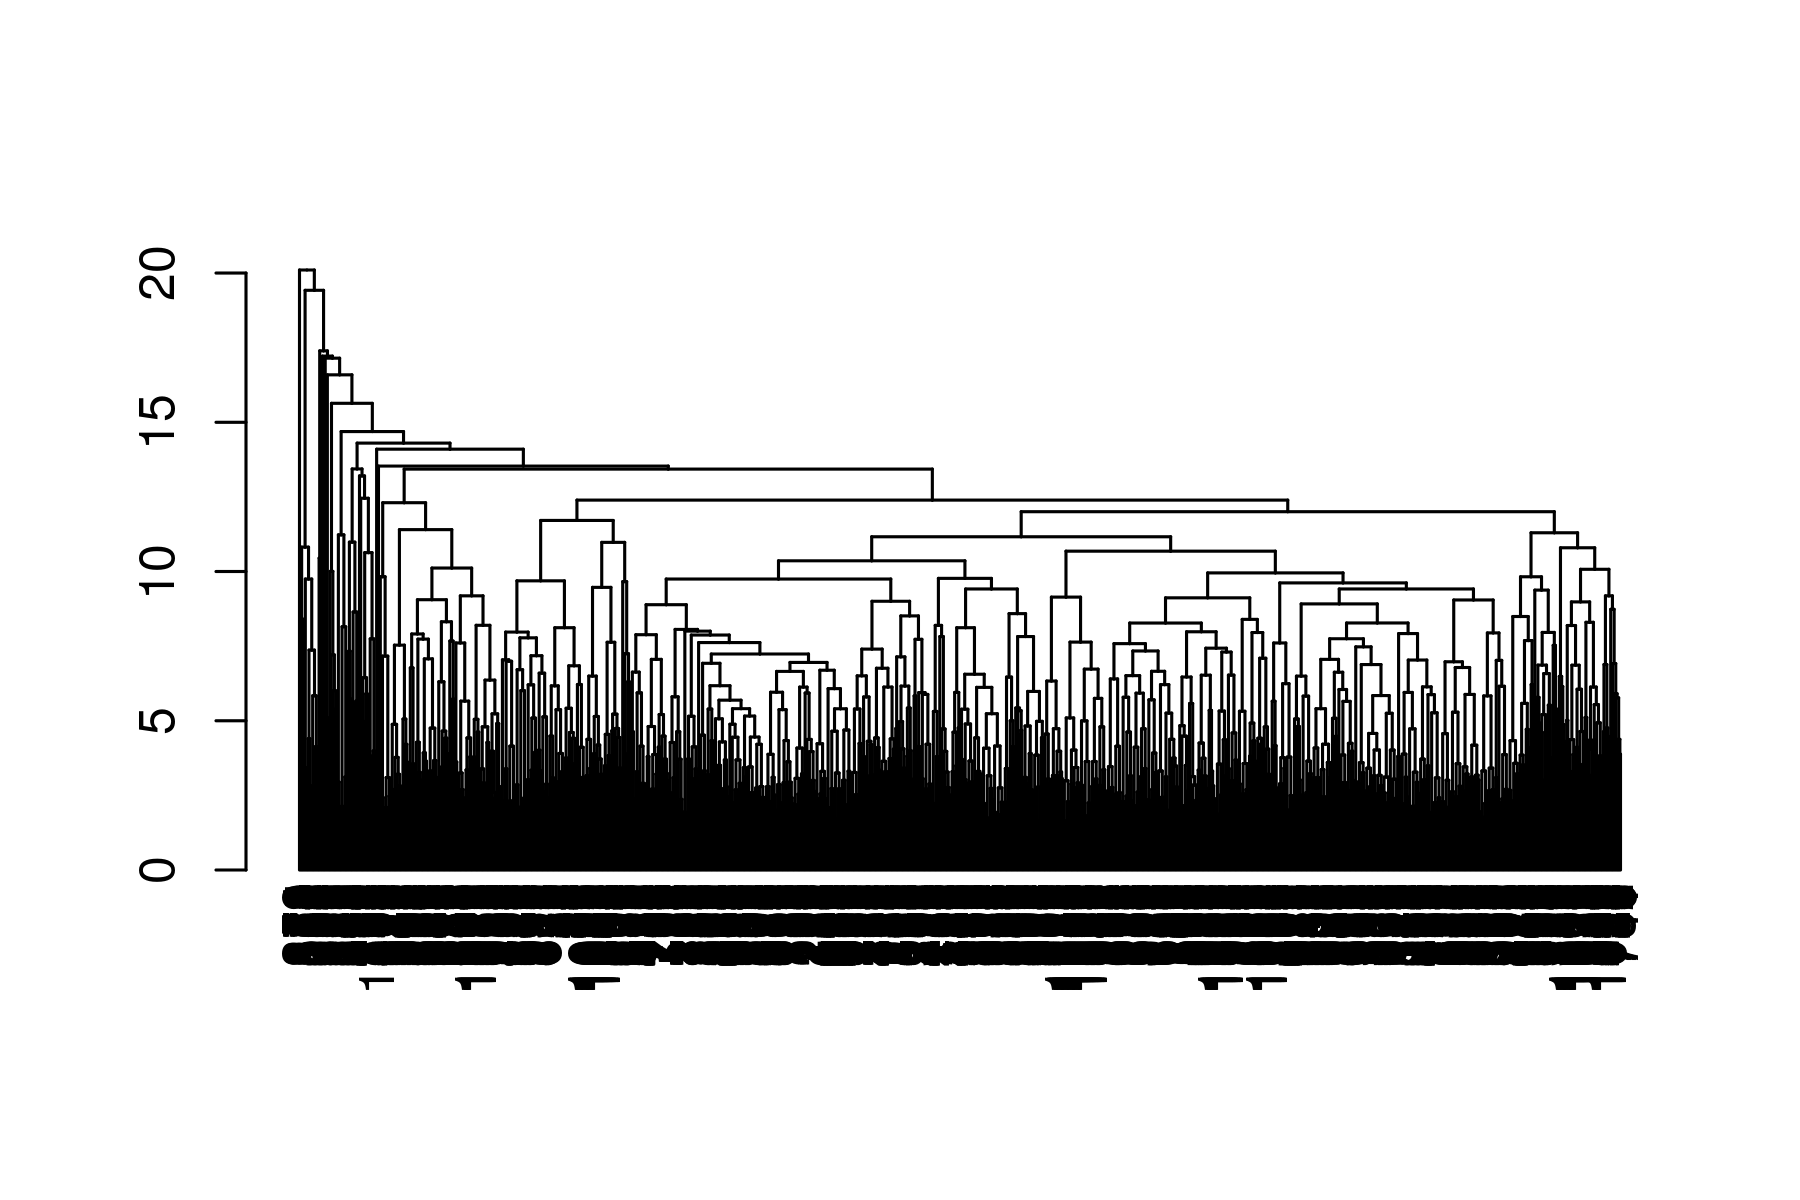

In [90]:
d <- dist(as.matrix(mouse_data_transformed),method = "euclidean")

hc <- hclust(d,method="average")
hcd <- as.dendrogram(hc)
plot(hcd)

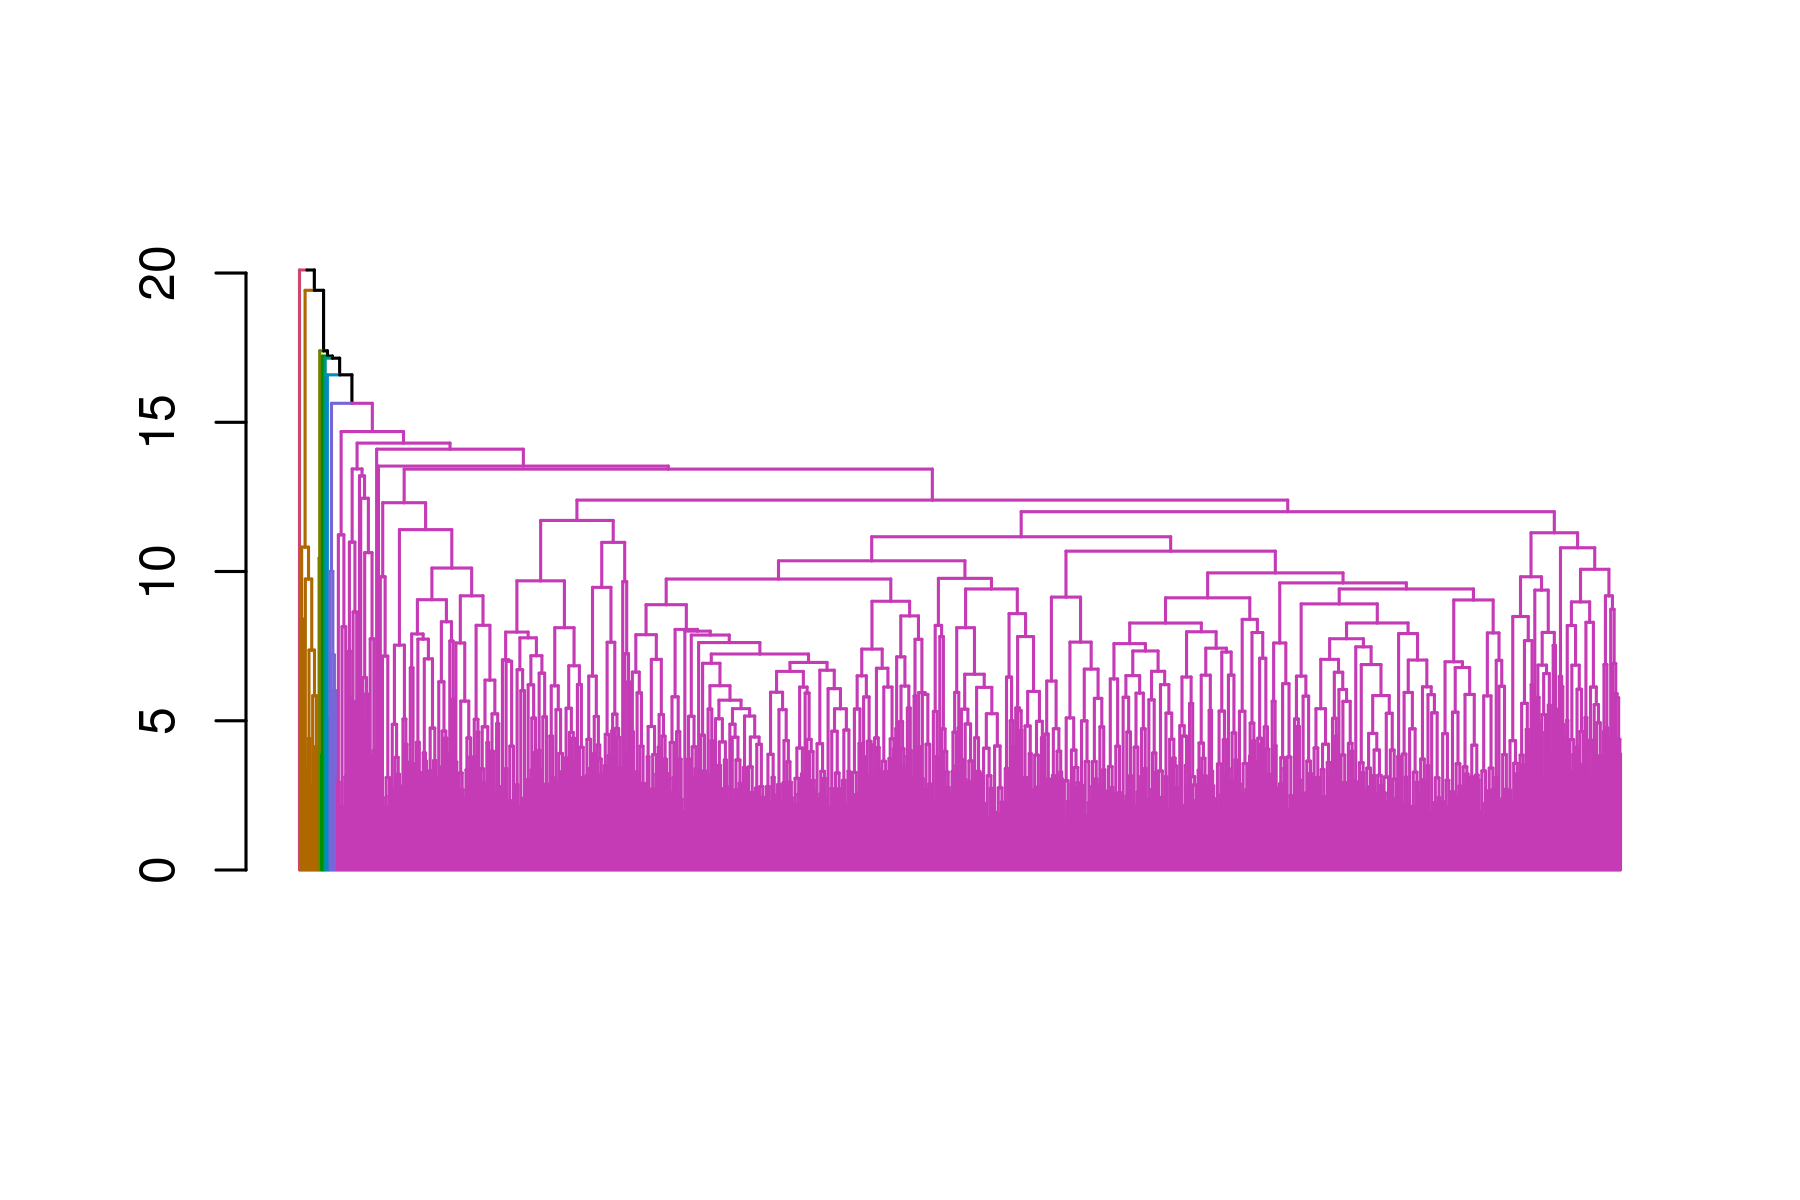

In [91]:
plot(color_branches(hcd, k=8),leaflab="none")

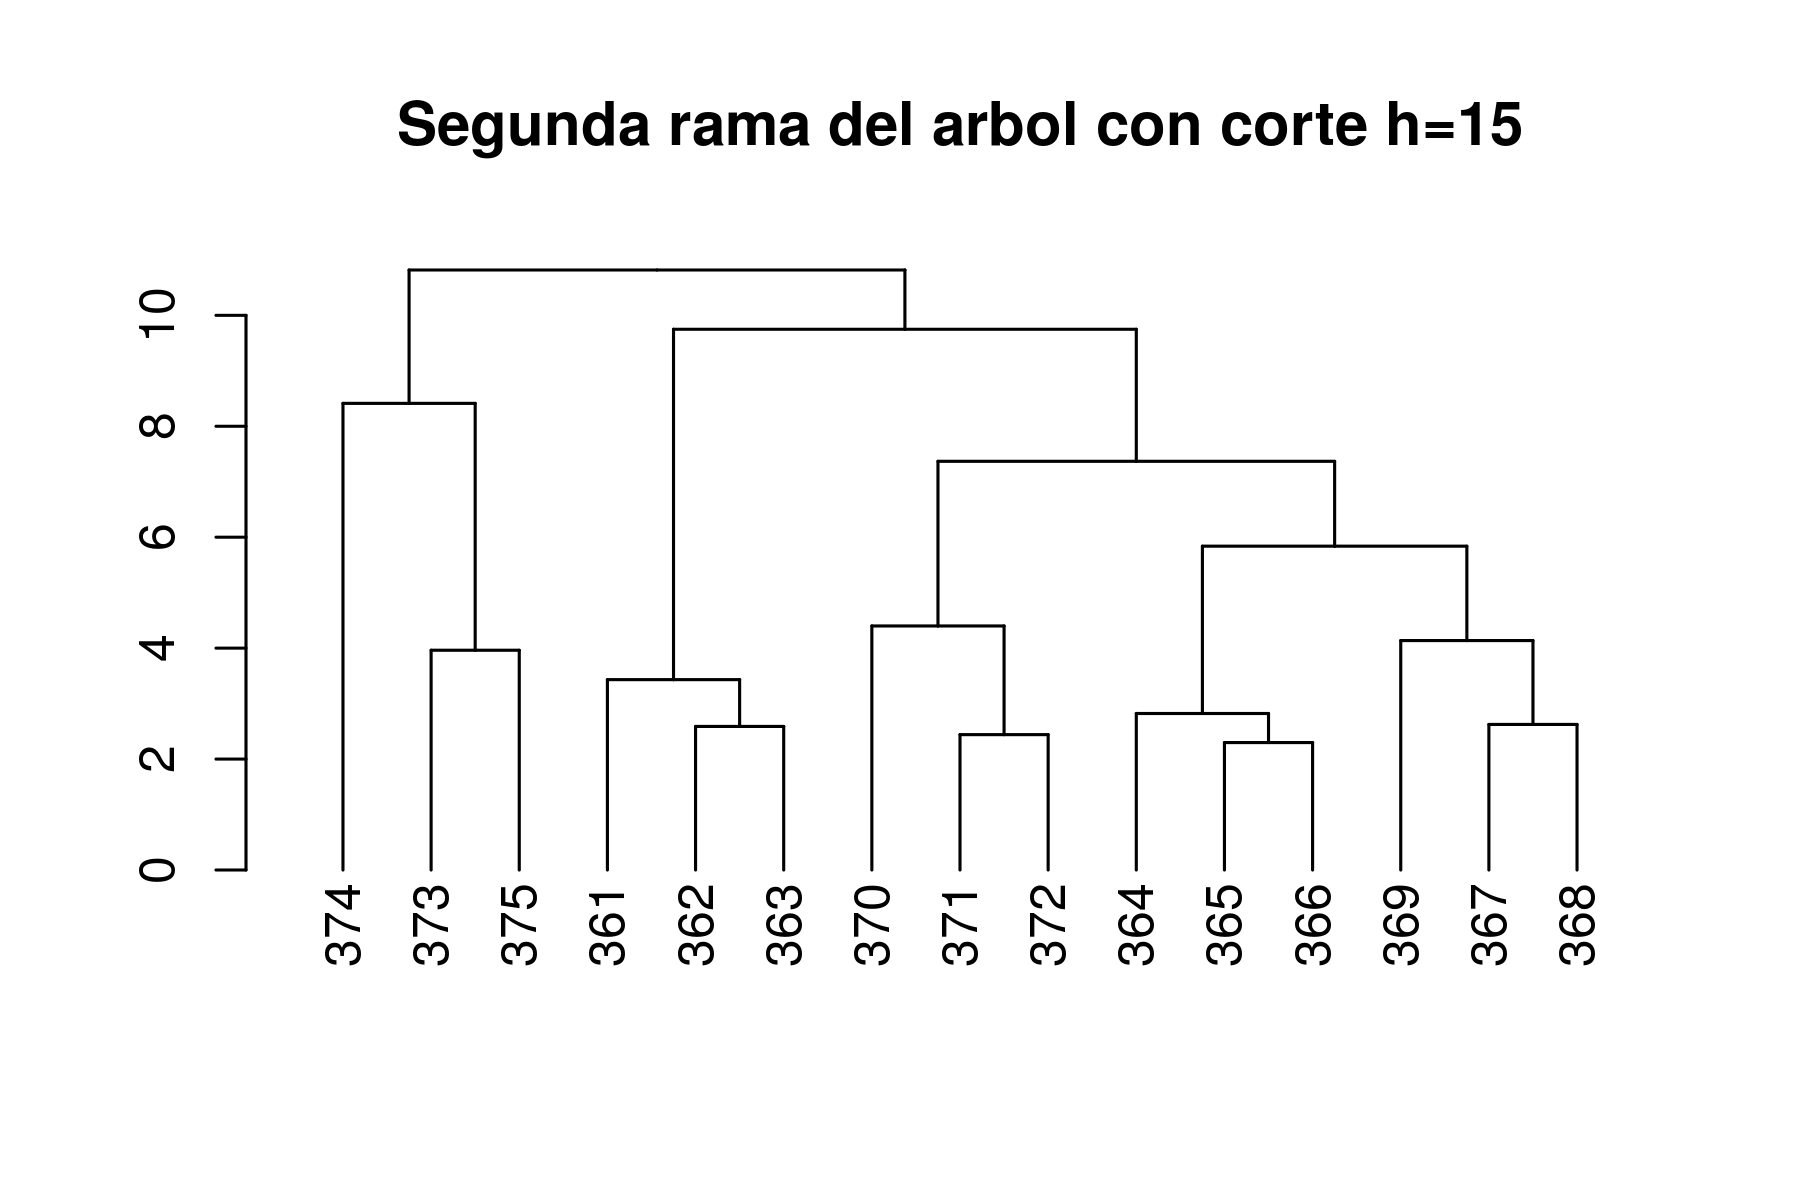

In [92]:
plot(cut(hcd, h = 15)$lower[[2]], main = "Segunda rama del arbol con corte h=15")

In [93]:
table(mouse$class,cutree(hc,k=3))

        
           1   2   3
  c-CS-m 150   0   0
  c-CS-s 119   1  15
  c-SC-m 150   0   0
  c-SC-s 135   0   0
  t-CS-m 135   0   0
  t-CS-s 105   0   0
  t-SC-m 135   0   0
  t-SC-s 135   0   0

In [94]:
table(mouse$class,cutree(hc,h=10))
table(mouse$Genotype,cutree(hc,22))
table(mouse$Treatment,cutree(hc,4))
table(mouse$Behavior,cutree(hc,4))

        
          1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  c-CS-m 68  1 14 42 18  3  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  c-CS-s 56  4 15  6  0  0  4  0  0  0  0  0  0  0  0 15  6  3  1 12  3  1  3
  c-SC-m  0  0  0  0 68  0  0  0 57  6 15  1  1  1  1  0  0  0  0  0  0  0  0
  c-SC-s 15  0  0  0 79  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  t-CS-m 93  0  0  9  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  t-CS-s 57  0 12 12  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  t-SC-m  0  0  0  0 81  0  0  0 12  0  0  0  6  0  0  0  0  0  0  0  0  0  0
  t-SC-s 39  0  0  0  0  0  0  0  0  0 15  0  0  0  0 15  0  0  0  0  0  0  0
        
         24 25 26 27 28 29 30 31 32 33 34 35
  c-CS-m  0  0  0  0  0  0  0  0  0  0  0  0
  c-CS-s  6  0  0  0  0  0  0  0  0  0  0  0
  c-SC-m  0  0  0  0  0  0  0  0  0  0  0  0
  c-SC-s  0  2  1 15  0  0  0  0  0  0  0  0
  t-CS-m  0  0  0  0 15  0  0  0  0  0  0  0
  t-CS-s  

         
            1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  Control 384   6  29  48   3   7   1   6  15   2  16   1   9   1  15   3   6
  Ts65Dn  333   0  12  21   0  68   0   6  36   0  21   0   0   0   0   0   3
         
           18  19  20  21  22
  Control   2   1  15   0   0
  Ts65Dn    0   0   0   9   1

           
              1   2   3   4
  Memantine 568   2   0   0
  Saline    494   0   1  15

     
        1   2   3   4
  C/S 509   0   1  15
  S/C 553   2   0   0

#### Ejemplo tipos de aceite

In [95]:
standarized_model <- caret::preProcess(olive, method = c("center", "scale"))
olive_standarized = predict(standarized_model,olive)

Warning message in dist(as.matrix(olive_standarized), method = "euclidean"):
“NAs introduced by coercion”


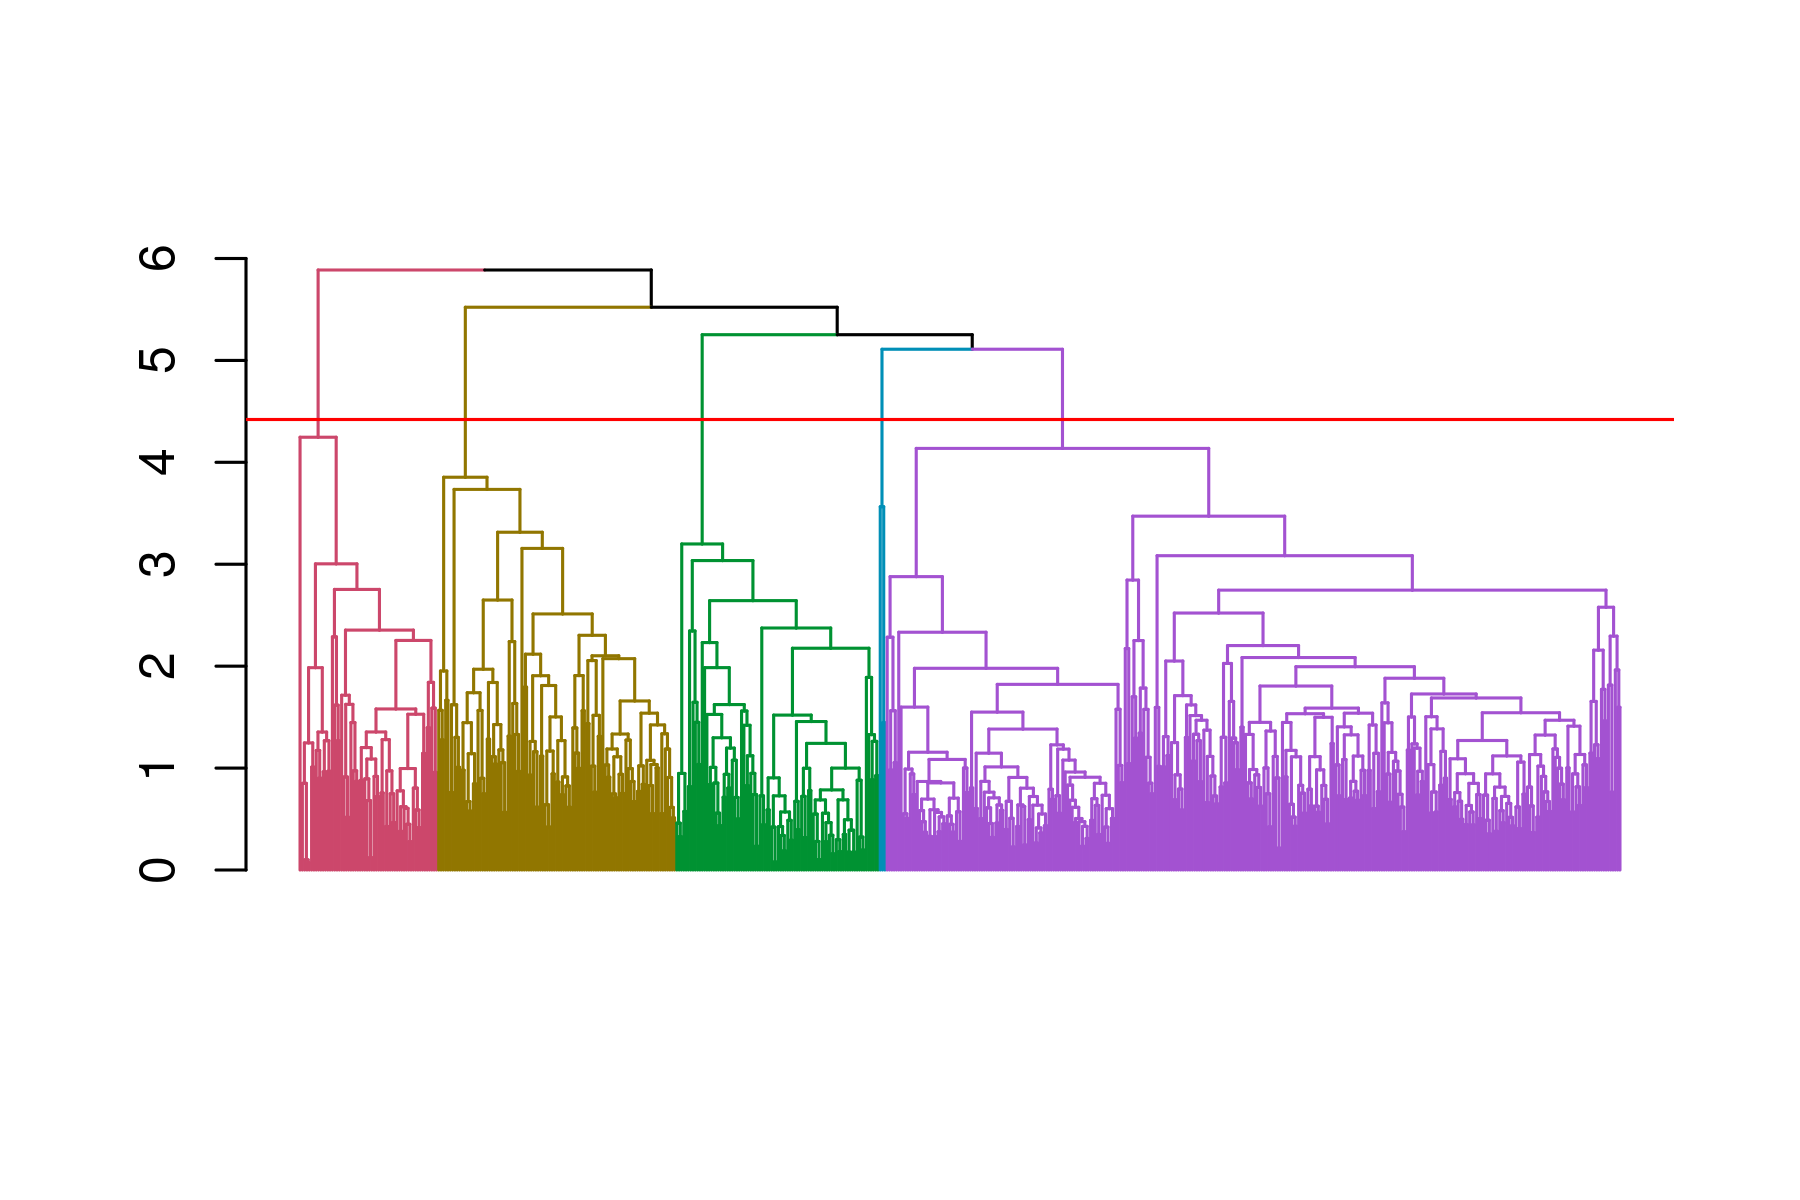

In [96]:
d <- dist(as.matrix(olive_standarized),method = "euclidean")

hc <- hclust(d,method="average")
hcd <- as.dendrogram(hc)
plot(color_branches(hcd, k=5),leaflab="none")
abline(h=4.42,col="red")

In [97]:
hc$height[hc$height>=4.3]

[1] 5.109430 5.252073 5.521547 5.887040

In [98]:
#cl<-cutree(hc,k=5)
cl<-cutree_1h.dendrogram(hcd,h=4.3)
olive$cluster = factor(cl)
summary(olive)

            region                 area        palmitic      palmitoleic    
 Northern Italy:151   South-Apulia   :206   Min.   : 6.10   Min.   :0.1500  
 Sardinia      : 98   Inland-Sardinia: 65   1st Qu.:10.95   1st Qu.:0.8775  
 Southern Italy:323   Calabria       : 56   Median :12.01   Median :1.1000  
                      Umbria         : 51   Mean   :12.32   Mean   :1.2609  
                      East-Liguria   : 50   3rd Qu.:13.60   3rd Qu.:1.6925  
                      West-Liguria   : 50   Max.   :17.53   Max.   :2.8000  
                      (Other)        : 94                                   
    stearic          oleic          linoleic        linolenic     
 Min.   :1.520   Min.   :63.00   Min.   : 4.480   Min.   :0.0000  
 1st Qu.:2.050   1st Qu.:70.00   1st Qu.: 7.707   1st Qu.:0.2600  
 Median :2.230   Median :73.03   Median :10.300   Median :0.3300  
 Mean   :2.289   Mean   :73.12   Mean   : 9.805   Mean   :0.3189  
 3rd Qu.:2.490   3rd Qu.:76.80   3rd Qu.:11.807  

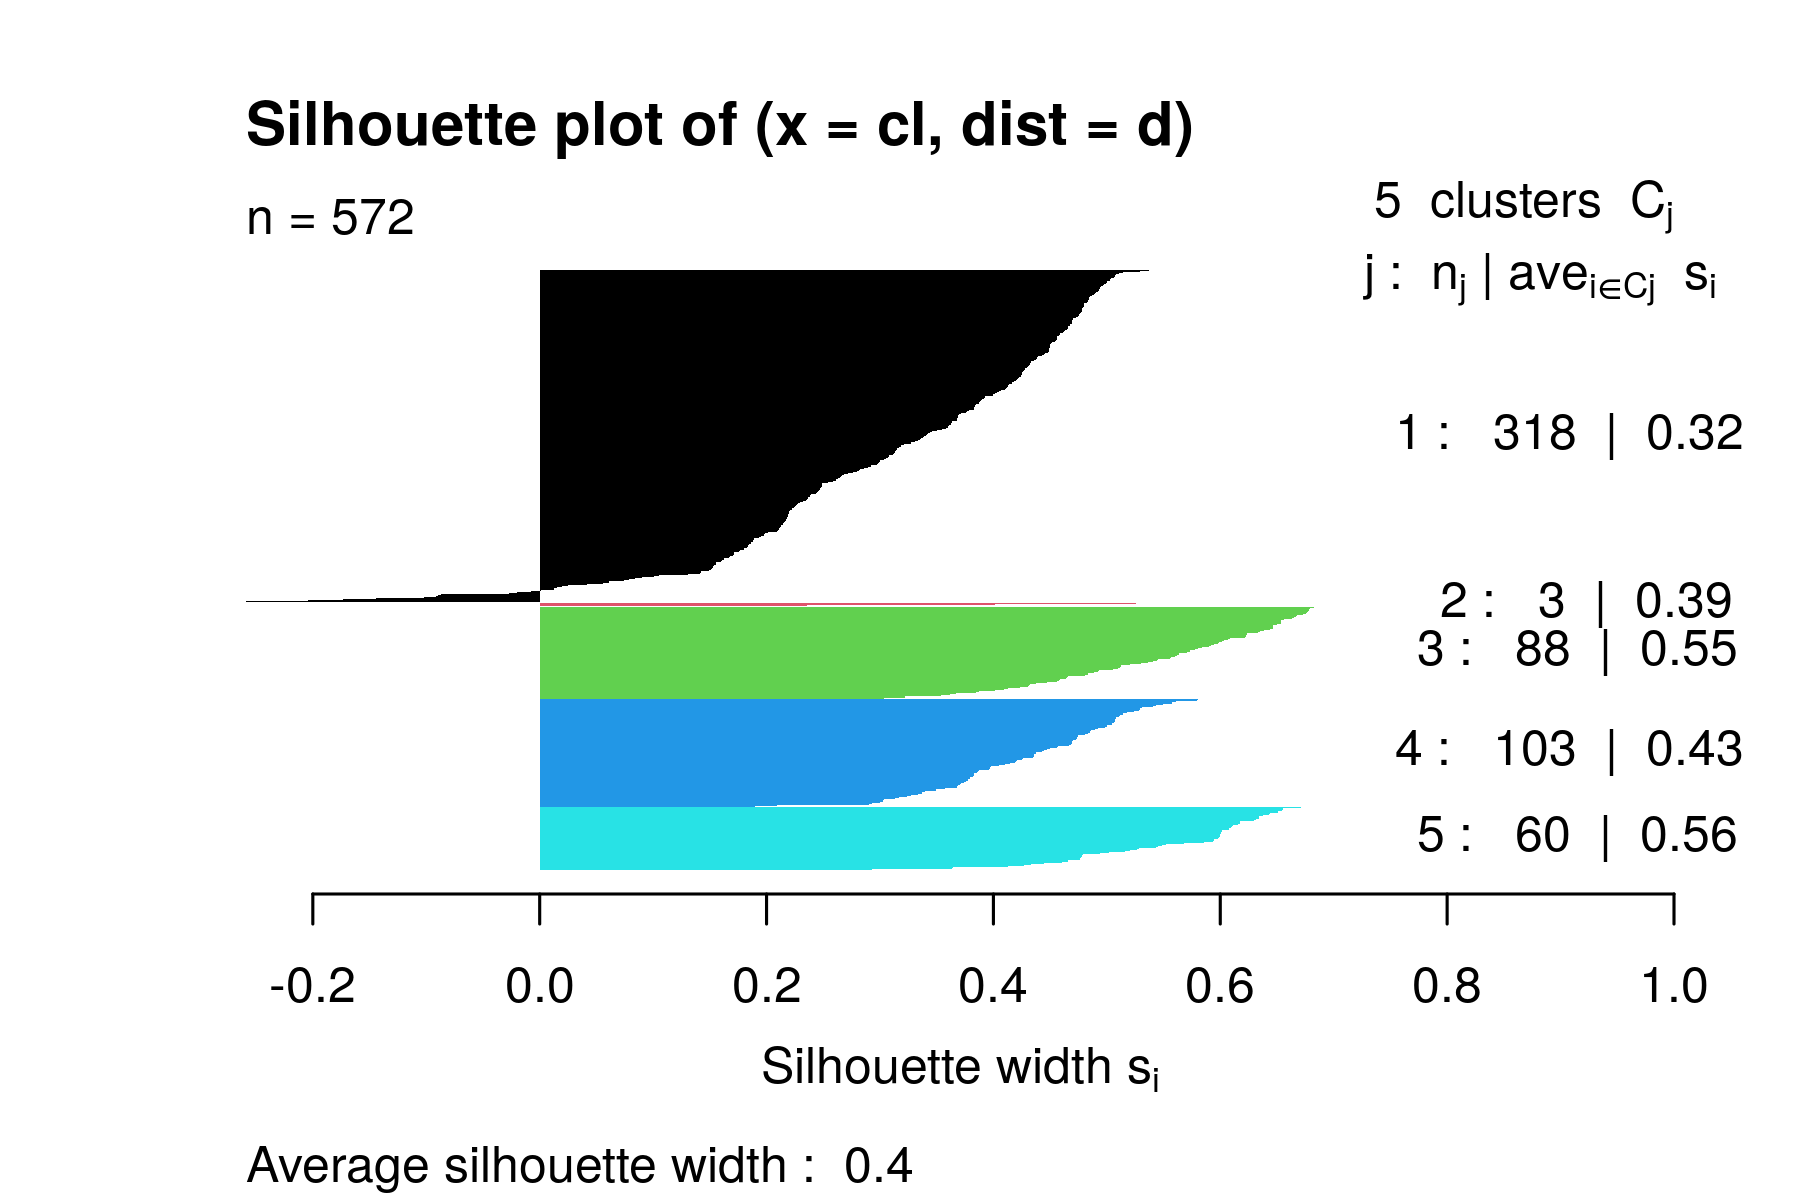

In [100]:
ss<-silhouette(cl, d)
plot(ss,col=1:max(cl),border=NA)

In [101]:
olive %>% filter(cluster==1) %>% summary()

            region                 area        palmitic      palmitoleic   
 Northern Italy:  5   South-Apulia   :203   Min.   :10.30   Min.   :0.350  
 Sardinia      : 98   Inland-Sardinia: 65   1st Qu.:11.47   1st Qu.:1.052  
 Southern Italy:215   Coast-Sardinia : 33   Median :13.34   Median :1.630  
                      Sicily         :  9   Mean   :13.05   Mean   :1.552  
                      East-Liguria   :  5   3rd Qu.:14.19   3rd Qu.:1.857  
                      Calabria       :  3   Max.   :17.53   Max.   :2.800  
                      (Other)        :  0                                  
    stearic          oleic          linoleic       linolenic     
 Min.   :1.520   Min.   :63.00   Min.   : 7.40   Min.   :0.1500  
 1st Qu.:2.010   1st Qu.:68.84   1st Qu.:11.01   1st Qu.:0.2800  
 Median :2.150   Median :70.20   Median :11.65   Median :0.3200  
 Mean   :2.163   Mean   :70.36   Mean   :11.63   Mean   :0.3250  
 3rd Qu.:2.340   3rd Qu.:71.92   3rd Qu.:12.43   3rd Qu.:0.367

In [102]:
olive %>% filter(cluster==2) %>% summary()

            region               area      palmitic      palmitoleic   
 Northern Italy:0   South-Apulia   :2   Min.   :14.69   Min.   :1.600  
 Sardinia      :0   Sicily         :1   1st Qu.:14.91   1st Qu.:1.610  
 Southern Italy:3   Calabria       :0   Median :15.14   Median :1.620  
                    Coast-Sardinia :0   Mean   :15.41   Mean   :1.647  
                    East-Liguria   :0   3rd Qu.:15.77   3rd Qu.:1.670  
                    Inland-Sardinia:0   Max.   :16.39   Max.   :1.720  
                    (Other)        :0                                  
    stearic          oleic          linoleic       linolenic    
 Min.   :2.980   Min.   :65.10   Min.   :11.19   Min.   :0.440  
 1st Qu.:3.145   1st Qu.:65.92   1st Qu.:11.21   1st Qu.:0.445  
 Median :3.310   Median :66.75   Median :11.24   Median :0.450  
 Mean   :3.220   Mean   :66.37   Mean   :11.23   Mean   :0.450  
 3rd Qu.:3.340   3rd Qu.:67.00   3rd Qu.:11.26   3rd Qu.:0.455  
 Max.   :3.370   Max.   :67.25   M

In [103]:
olive %>% filter(cluster==3) %>% summary()

            region                area       palmitic      palmitoleic    
 Northern Italy:81   Umbria         :51   Min.   : 9.11   Min.   :0.1500  
 Sardinia      : 0   East-Liguria   :30   1st Qu.:10.75   1st Qu.:0.5800  
 Southern Italy: 7   North-Apulia   : 6   Median :10.95   Median :0.7000  
                     Calabria       : 1   Mean   :10.99   Mean   :0.6878  
                     Coast-Sardinia : 0   3rd Qu.:11.20   3rd Qu.:0.8000  
                     Inland-Sardinia: 0   Max.   :12.20   Max.   :1.3600  
                     (Other)        : 0                                   
    stearic          oleic          linoleic       linolenic     
 Min.   :1.700   Min.   :76.10   Min.   :5.100   Min.   :0.1000  
 1st Qu.:1.900   1st Qu.:78.15   1st Qu.:6.000   1st Qu.:0.2425  
 Median :2.035   Median :79.45   Median :6.050   Median :0.3000  
 Mean   :2.117   Mean   :78.87   Mean   :6.288   Mean   :0.3124  
 3rd Qu.:2.322   3rd Qu.:79.61   3rd Qu.:6.700   3rd Qu.:0.3900  
 Max

In [ ]:
olive %>% filter(cluster==4) %>% summary()

In [ ]:
olive %>% filter(cluster==5) %>% summary()

#### Ejemplo expresión genética levadura

Ejemplo sacado de:
https://bio723-class.github.io/Bio723-book/clustering-in-r.html

Utilizando el dataset del artículo:
    Spellman PT, et al. 1998. Comprehensive identification of cell cycle-regulated genes of the yeast Saccharomyces cerevisiae by microarray hybridization. Mol Biol Cell 9(12): 3273-97.

Nos vamos a descargar la matriz de expresión de 724 genes en diferentes condiciones. Vamos a gruparlos por su similaridad

In [104]:
#library(tidyverse)
spellman <- read.csv("https://github.com/Bio723-class/example-datasets/raw/master/spellman-wide.csv", stringsAsFactors = T)
head(spellman)

expt  time YAL022C YAL040C YAL053W YAL067C YAR003W YAR007C YAR008W YAR018C ⋯
1 alpha  0   -0.36    1.04    0.21    0.01   -0.30   -0.48   -0.35   -0.46   ⋯
2 alpha  7   -0.42    0.19   -0.20    0.07   -0.45   -0.42    0.10    0.12   ⋯
3 alpha 14    0.29    0.47    0.20    0.17    0.75    0.87    0.47   -0.06   ⋯
4 alpha 21   -0.14   -1.03    0.15      NA    0.37    0.92    0.39   -0.76   ⋯
5 alpha 28   -0.19   -0.63    0.38   -0.10    0.27    0.67    0.17   -0.70   ⋯
6 alpha 35   -0.52   -0.68    0.37    0.08   -0.28   -0.18   -0.18   -0.79   ⋯
  YPR155C YPR156C YPR157W YPR159W YPR167C YPR174C YPR175W YPR202W YPR203W
1  0.09    0.09    0.60    0.17    0.07   -0.24   -0.41   -0.79   -0.68  
2 -0.27   -0.68    0.34    0.16    0.38   -0.40   -0.57   -0.25   -0.19  
3  0.35   -0.71   -0.05    0.17    0.00    0.97    1.15    1.18    1.23  
4  0.09   -1.86   -0.46    0.38   -0.08    0.62    0.69    0.84    0.84  
5  0.15   -1.07    0.10    0.47      NA    0.60    0.61    0.19    0.14  
6  0.28   -0.71   -0.34   -0.07    0.10   -0.11    0.00   -0.11   -0.44  
  YPR204W
1 -0.37  
2 -0.48  
3  0.97  
4  0.52  
5  0.18  
6 -0.11

In [105]:
summary(spellman)

    expt         time          YAL022C              YAL040C          
 alpha:18   Min.   :  0.0   Min.   :-1.1600000   Min.   :-1.0300000  
 cdc15:24   1st Qu.: 50.0   1st Qu.:-0.3700000   1st Qu.:-0.3100000  
 cdc28:17   Median :100.0   Median :-0.0100000   Median : 0.0250000  
 elu  :14   Mean   :121.2   Mean   :-0.0005556   Mean   : 0.0001389  
            3rd Qu.:170.0   3rd Qu.: 0.3325000   3rd Qu.: 0.2550000  
            Max.   :390.0   Max.   : 1.4900000   Max.   : 1.3200000  
                            NA's   :1            NA's   :1           
    YAL053W             YAL067C              YAR003W          
 Min.   :-1.050000   Min.   :-1.8300000   Min.   :-0.6900000  
 1st Qu.:-0.247500   1st Qu.:-0.4250000   1st Qu.:-0.2250000  
 Median : 0.020000   Median : 0.0100000   Median :-0.0200000  
 Mean   : 0.000606   Mean   : 0.0002817   Mean   : 0.0001408  
 3rd Qu.: 0.270000   3rd Qu.: 0.2900000   3rd Qu.: 0.2400000  
 Max.   : 0.860000   Max.   : 2.3900000   Max.   : 0.8400000  

In [110]:
1-abs(cor(spellman[,c(-1,-2)],use="pairwise.complete.obs"))

YAL022C   YAL040C   YAL053W   YAL067C   YAR003W   YAR007C   YAR008W  
YAL022C 0.0000000 0.4951078 0.9269932 0.7558822 0.9717690 0.8033374 0.9604507
YAL040C 0.4951078 0.0000000 0.8911990 0.9991307 0.8173519 0.8564986 0.9482275
YAL053W 0.9269932 0.8911990 0.0000000 0.6027237 0.5765348 0.6450712 0.5774676
YAL067C 0.7558822 0.9991307 0.6027237 0.0000000 0.8739961 0.9604950 0.8039162
YAR003W 0.9717690 0.8173519 0.5765348 0.8739961 0.0000000 0.3533341 0.3911978
YAR007C 0.8033374 0.8564986 0.6450712 0.9604950 0.3533341 0.0000000 0.3270793
YAR008W 0.9604507 0.9482275 0.5774676 0.8039162 0.3911978 0.3270793 0.0000000
YAR018C 0.3084678 0.6251743 0.8303207 0.6223444 0.8240290 0.6493467 0.6725066
YBL002W 0.9711137 0.6552532 0.6490359 0.7878616 0.7142903 0.6964393 0.7830331
YBL003C 0.8753980 0.6317618 0.7072228 0.8026538 0.7825015 0.7201466 0.9249590
YBL009W 0.9692251 0.7004256 0.7202145 0.6322897 0.5758047 0.6521129 0.7207640
YBL023C 0.4059544 0.6343792 0.8993989 0.8512683 0.8107205 0.9629405 0.7641291
YBL030C 0.4778084 0.7660556 0.8352369 0.9365843 0.9795247 0.7823976 0.8234949
YBL035C 0.9201843 0.9857688 0.5537871 0.8557881 0.3763607 0.1863651 0.1860578
YBL052C 0.8835228 0.9036736 0.9195017 0.7372179 0.7164622 0.5888455 0.7066363
YBL061C 0.8701924 0.7262175 0.8188029 0.8915601 0.7191101 0.5336097 0.4821568
YBL063W 0.7965333 0.6702163 0.8694447 0.7318299 0.8195331 0.9065635 0.8642561
YBL064C 0.9875150 0.9421314 0.9318562 0.7707003 0.9182731 0.8766127 0.8902218
YBL098W 0.3742679 0.7244003 0.9642120 0.9252499 0.8516669 0.5905943 0.7809495
YBL111C 0.7235416 0.8339744 0.8259410 0.8177406 0.4460828 0.4260858 0.5085416
YBL112C 0.7508593 0.8213881 0.5821176 0.9570268 0.5784725 0.4477548 0.5161671
YBL113C 0.7282194 0.7338599 0.7241083 0.8839103 0.6234527 0.4048645 0.5896238
YBR008C 0.8083017 0.7646862 0.7686991 0.6014338 0.8633626 0.9136761 0.9865783
YBR009C 0.9184246 0.5490623 0.7757722 0.8946988 0.7597843 0.7042363 0.9731716
YBR010W 0.8457369 0.5999131 0.7723913 0.9613052 0.7598168 0.6223583 0.9422541
YBR038W 0.3232516 0.7140629 0.8652284 0.8416914 0.7750085 0.4597033 0.6316813
YBR054W 0.4125864 0.5814653 0.8011127 0.6059180 0.9162366 0.6931806 0.8611237
YBR067C 0.9593520 0.9143331 0.8981716 0.9743622 0.8716655 0.8823477 0.7764432
YBR069C 0.3832144 0.4877952 0.8998324 0.8735056 0.9195831 0.7717467 0.7813757
YBR070C 0.9258819 0.8496561 0.5777407 0.6785398 0.3417257 0.3499663 0.1714772
⋮       ⋮         ⋮         ⋮         ⋮         ⋮         ⋮         ⋮        
YPL265W 0.7417185 0.9857715 0.8730807 0.6280740 0.9515127 0.8749477 0.8466779
YPL269W 0.8547671 0.6778752 0.9316140 0.9979174 0.8552717 0.9382213 0.9154496
YPL274W 0.9728620 0.9728225 0.7232047 0.7348947 0.9358199 0.8164289 0.9938004
YPL283C 0.7382968 0.7081426 0.8794477 0.8252641 0.6692712 0.4513133 0.6343641
YPR018W 0.9267280 0.9909105 0.9173421 0.9784626 0.4988889 0.3572837 0.3635136
YPR019W 0.4385108 0.5447454 0.9892445 0.7839716 0.9966411 0.9352304 0.9185026
YPR034W 0.8260327 0.7668554 0.9255989 0.9912831 0.9934016 0.8669679 0.7640761
YPR045C 0.9073185 0.9539210 0.9758761 0.9639578 0.7104501 0.8017087 0.8283945
YPR075C 0.5671654 0.6523333 0.8625621 0.9072373 0.8631203 0.5642970 0.8263008
YPR076W 0.6084261 0.7054973 0.4812126 0.6042427 0.6762856 0.5882336 0.5497477
YPR106W 0.6899501 0.6946212 0.4691239 0.7298618 0.7545441 0.6121929 0.6943040
YPR107C 0.6492966 0.7560616 0.9547143 0.9496645 0.8941005 0.7873533 0.8878467
YPR111W 0.8370031 0.9349684 0.5965465 0.9943563 0.6981342 0.6355670 0.5226606
YPR119W 0.5055784 0.8461998 0.7001008 0.9504620 0.6691822 0.4248635 0.6006286
YPR120C 0.9049044 0.9560662 0.5770503 0.8174678 0.3361135 0.1918794 0.2483737
YPR128C 0.7093021 0.9182148 0.9200550 0.8633503 0.7256495 0.4752946 0.6259100
YPR135W 0.8733017 0.7596214 0.5928360 0.9262205 0.3685824 0.2544619 0.3921397
YPR138C 0.7806908 0.9117207 0.9353826 0.7930175 0.7656187 0.6164142 0.6694552
YPR141C 0.8306851 0.7853726 0.6179107 0.4923399 0.7785655 0.8997232 0.7322010
YPR149W 0.5160208 0.8223180 0.

Las dos primeras columnas indican el tipo de experimento que se ha realizado. Las siguientes columnas indican el nivel de expresión genética del gen en cuestión, indicado por la columna.
Por tanto cada columna, a partir de la tercera nos da los niveles de expresión de un gen en diferentes condiciones. Queremos encontrar los genes que muestran un comportamiento similar.

Como distancia ahora vamos a utilizar la correlación. Más concretamente: 1-cor
De esta forma si dos genes tienen correlación muy cercana a 1 tendrán una distancia muy cercana a 0. A menor correlación, mayor distancia.

In [111]:
spellman.cor<-cor(spellman[,c(-1,-2)],use="pairwise.complete.obs")
dim(spellman.cor)

[1] 724 724

In [113]:
724*724

[1] 524176

In [114]:
724*723/2

[1] 261726

In [112]:
spellman.dist<- as.dist(1 - abs(spellman.cor))
str(spellman.dist)

 'dist' num [1:261726] 0.495 0.927 0.756 0.972 0.803 ...
 - attr(*, "Labels")= chr [1:724] "YAL022C" "YAL040C" "YAL053W" "YAL067C" ...
 - attr(*, "Size")= int 724
 - attr(*, "call")= language as.dist.default(m = 1 - abs(spellman.cor))
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE


In [115]:
spellman.tree <- hclust(spellman.dist, method="complete")
spellman.dend <- as.dendrogram(spellman.tree) 

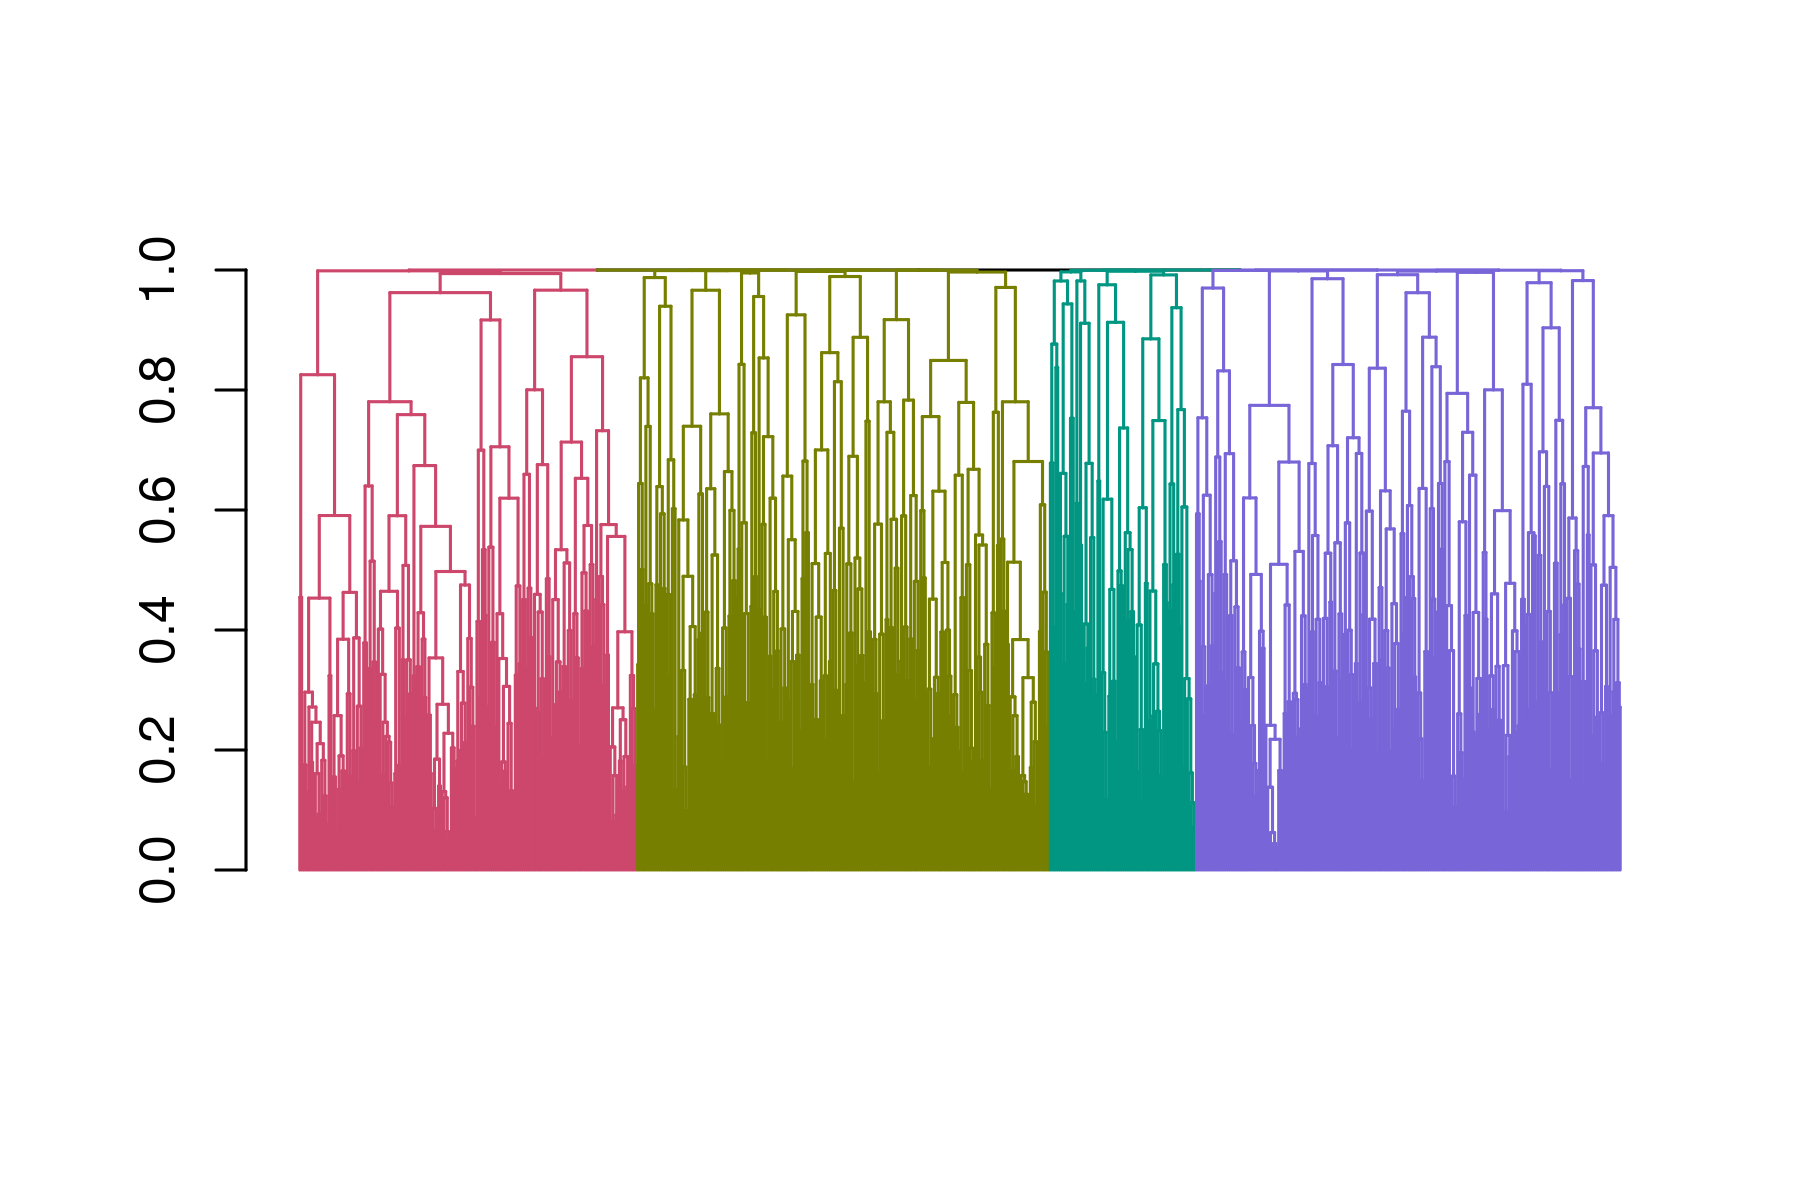

In [117]:
library(dendextend)

plot(color_branches(spellman.dend, k=4),leaflab="none")

In [118]:
clusters <- cutree(spellman.dend, k=4)

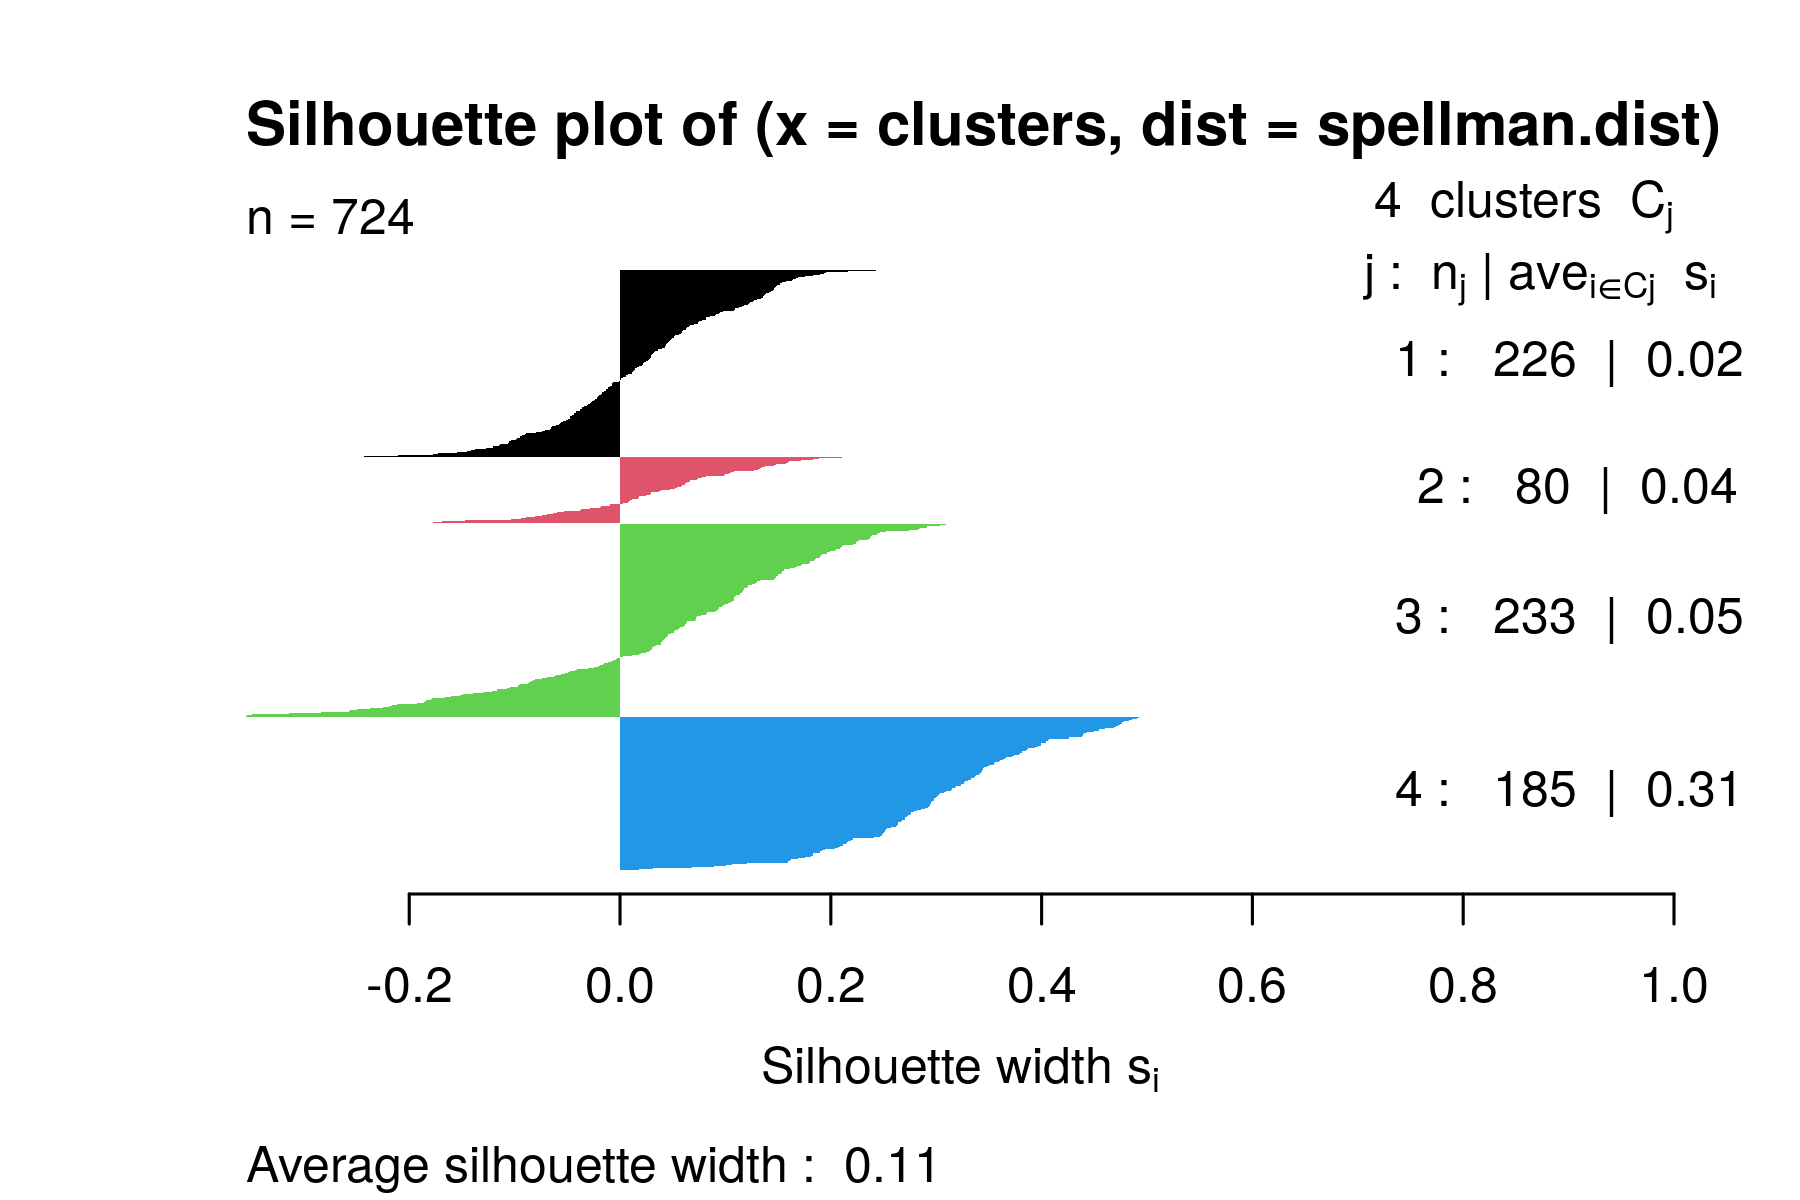

In [119]:
library(cluster)
ss<-silhouette(clusters, spellman.dist)
plot(ss,col=1:max(clusters),border=NA)

In [120]:
names(clusters[clusters==4])

[1] "YAR003W" "YAR007C" "YAR008W" "YBL035C" "YBL111C" "YBL112C" "YBL113C"
  [8] "YBR070C" "YBR071W" "YBR088C" "YBR089W" "YCL022C" "YCL024W" "YCL060C"
 [15] "YCL061C" "YCR065W" "YDL003W" "YDL018C" "YDL101C" "YDL102W" "YDL103C"
 [22] "YDL105W" "YDL156W" "YDL157C" "YDL211C" "YDL227C" "YDR053W" "YDR097C"
 [29] "YDR279W" "YDR353W" "YDR400W" "YDR440W" "YDR503C" "YDR507C" "YDR528W"
 [36] "YDR545W" "YEL075C" "YEL076C" "YEL077C" "YER001W" "YER095W" "YER111C"
 [43] "YER170W" "YER189W" "YER190W" "YFL008W" "YFL060C" "YFL064C" "YFR039C"
 [50] "YGL038C" "YGL060W" "YGL061C" "YGL162W" "YGL207W" "YGR041W" "YGR109C"
 [57] "YGR143W" "YGR151C" "YGR152C" "YGR153W" "YGR188C" "YGR221C" "YGR238C"
 [64] "YGR296W" "YHL049C" "YHL050C" "YHR110W" "YHR123W" "YHR127W" "YHR149C"
 [71] "YHR153C" "YHR159W" "YHR218W" "YIL025C" "YIL026C" "YIL056W" "YIL066C"
 [78] "YIL119C" "YIL122W" "YIL132C" "YIL140W" "YIL141W" "YIL177C" "YJL018W"
 [85] "YJL019W" "YJL072C" "YJL073W" "YJL074C" "YJL115W" "YJL181W" "YJL187C"
 [92] "YJL196C" "YJL225C" "YJR006W" "YJR030C" "YJR148W" "YJR154W" "YJR155W"
 [99] "YKL042W" "YKL045W" "YKL089W" "YKL108W" "YKL165C" "YKR012C" "YKR013W"
[106] "YKR021W" "YKR077W" "YLL002W" "YLL022C" "YLL032C" "YLL066C" "YLL067C"
[113] "YLR032W" "YLR049C" "YLR103C" "YLR121C" "YLR151C" "YLR183C" "YLR212C"
[120] "YLR233C" "YLR234W" "YLR235C" "YLR236C" "YLR297W" "YLR313C" "YLR383W"
[127] "YLR457C" "YLR458W" "YLR462W" "YLR463C" "YLR464W" "YLR465C" "YLR466W"
[134] "YLR467W" "YML012W" "YML027W" "YML060W" "YML061C" "YML102W" "YML109W"
[141] "YMR048W" "YMR076C" "YMR078C" "YMR179W" "YMR199W" "YNL082W" "YNL102W"
[148] "YNL165W" "YNL225C" "YNL231C" "YNL233W" "YNL262W" "YNL273W" "YNL289W"
[155] "YNL304W" "YNL309W" "YNL339C" "YOL007C" "YOL011W" "YOL017W" "YOL069W"
[162] "YOL090W" "YOR023C" "YOR033C" "YOR058C" "YOR114W" "YOR144C" "YOR229W"
[169] "YOR321W" "YPL014W" "YPL153C" "YPL208W" "YPL209C" "YPL221W" "YPL256C"
[176] "YPL283C" "YPR018W" "YPR120C" "YPR135W" "YPR157W" "YPR174C" "YPR175W"
[183] "YPR202W" "YPR203W" "YPR204W"

# Cluster por densidad



## Density Based Clustering of Applications with Noise (DBSCAN)

DBSCAN es un algoritmo basado en la proximidad y la densidad de las observaciones para formar grupos. La agrupación DBSCAN puede identificar valores atípicos, observaciones que no pertenecerán a ningún grupo.

En DBSCAN hay 3 tipos de puntos:
 * núcleo: punto que tiene al menos *minPts* puntos a una distancia $\varepsilon$.
 * puntos (densamente-)alcanzables: punto que tiene al menos un núcleo a una distancia $\varepsilon$.
 * ruido:  El resto de puntos

Donde los parámetros $\varepsilon$ y *minPts* son:
  * $\varepsilon$: distancia de corte de un punto desde (punto central, que se analiza a continuación) para que se considere parte de un grupo. Comúnmente conocido como epsilon (abreviado como eps).
  *  *minPts* : número mínimo de puntos necesarios para formar un clúster.

La agrupación DBSCAN se puede resumir en los siguientes pasos:
  * Para cada punto P identifica los N puntos dentro de distancia $\varepsilon$ 
     * si N >= minPts : Etiqueta P como punto de tipo *núcleo*
     * si N < minPts : 
         * Si hay un punto de *núcleo* a una distancia $\varepsilon$, se etiqueta como *punto densamente alcanzable*
         * Si NO hay un punto de *núcleo* a una distancia $\varepsilon$, se etiqueta como *ruido*.
         
   Un cluster estaría formado por todos los puntos de *núcleo* y los puntos *densamente alcanzables* que están densamente conectados por la distancia  $\varepsilon$. 
   Existe una variante DBSCAN* la cual solo considera los puntos de cluster como puntos de *núcleo* el resto son ruido.

![](img/dbscan_1.png)
![](img/dbscan_2.png)

Ejemplo de clasificación de estrellas sacadas de:
http://burro.astr.cwru.edu/Academics/Astr221/HW/HW5/HW5.html

El dataset contiene 6219 estrellas que muestran la magnitud aparente en el rango visible. El dataset contiene 5 columnas:
* id de la estrella
* Magnitud aparente en el espectro visible
* Color observado en el rango B-V (Blue-Visible)
* Paralaje de la estrella observada (en segundo de arco)
* Incertidumbre del paralaje (en miliarcsec)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/ParsecDef.svg/240px-ParsecDef.svg.png)

Podemos calcular la distancia a la estrella en Parsecs en función de los segundos de arco:
\\[
\Delta=\frac{1}{\pi}
\\]
1 pársec = 206265 ua = 3,2616 años luz 

La magnitud absoluta de una estrella está relacionada con la magnitud aparente por:
\\[
Mv = mv– 5·log_{10} \Delta +5
\\]

Si pintamos la magnitud absoluta de una estrella en función de su temperatura (color) obtenemos lo que se llama un diagrama Hertzsprung–Russell, a veces abreviado como diagrama H-R.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/HRDiagram.png/421px-HRDiagram.png)

In [121]:
hr=read.csv("data/yaletrigplx.dat",col.names = c("id","mv","BV","parallax","error"),sep="" )
head(hr)

id mv   BV   parallax error
1 3  8.45 1.05 0.0717   113  
2 4  9.01 1.44 0.0886    23  
3 6  8.60 0.94 0.0147    55  
4 7  5.96 0.67 0.0455    50  
5 7  6.43 0.64 0.0455    50  
6 8  5.70 0.52 0.0495    97

In [122]:
hr$parsec=1/hr$parallax
hr$Mv<-hr$mv-5*log10(hr$parsec)+5

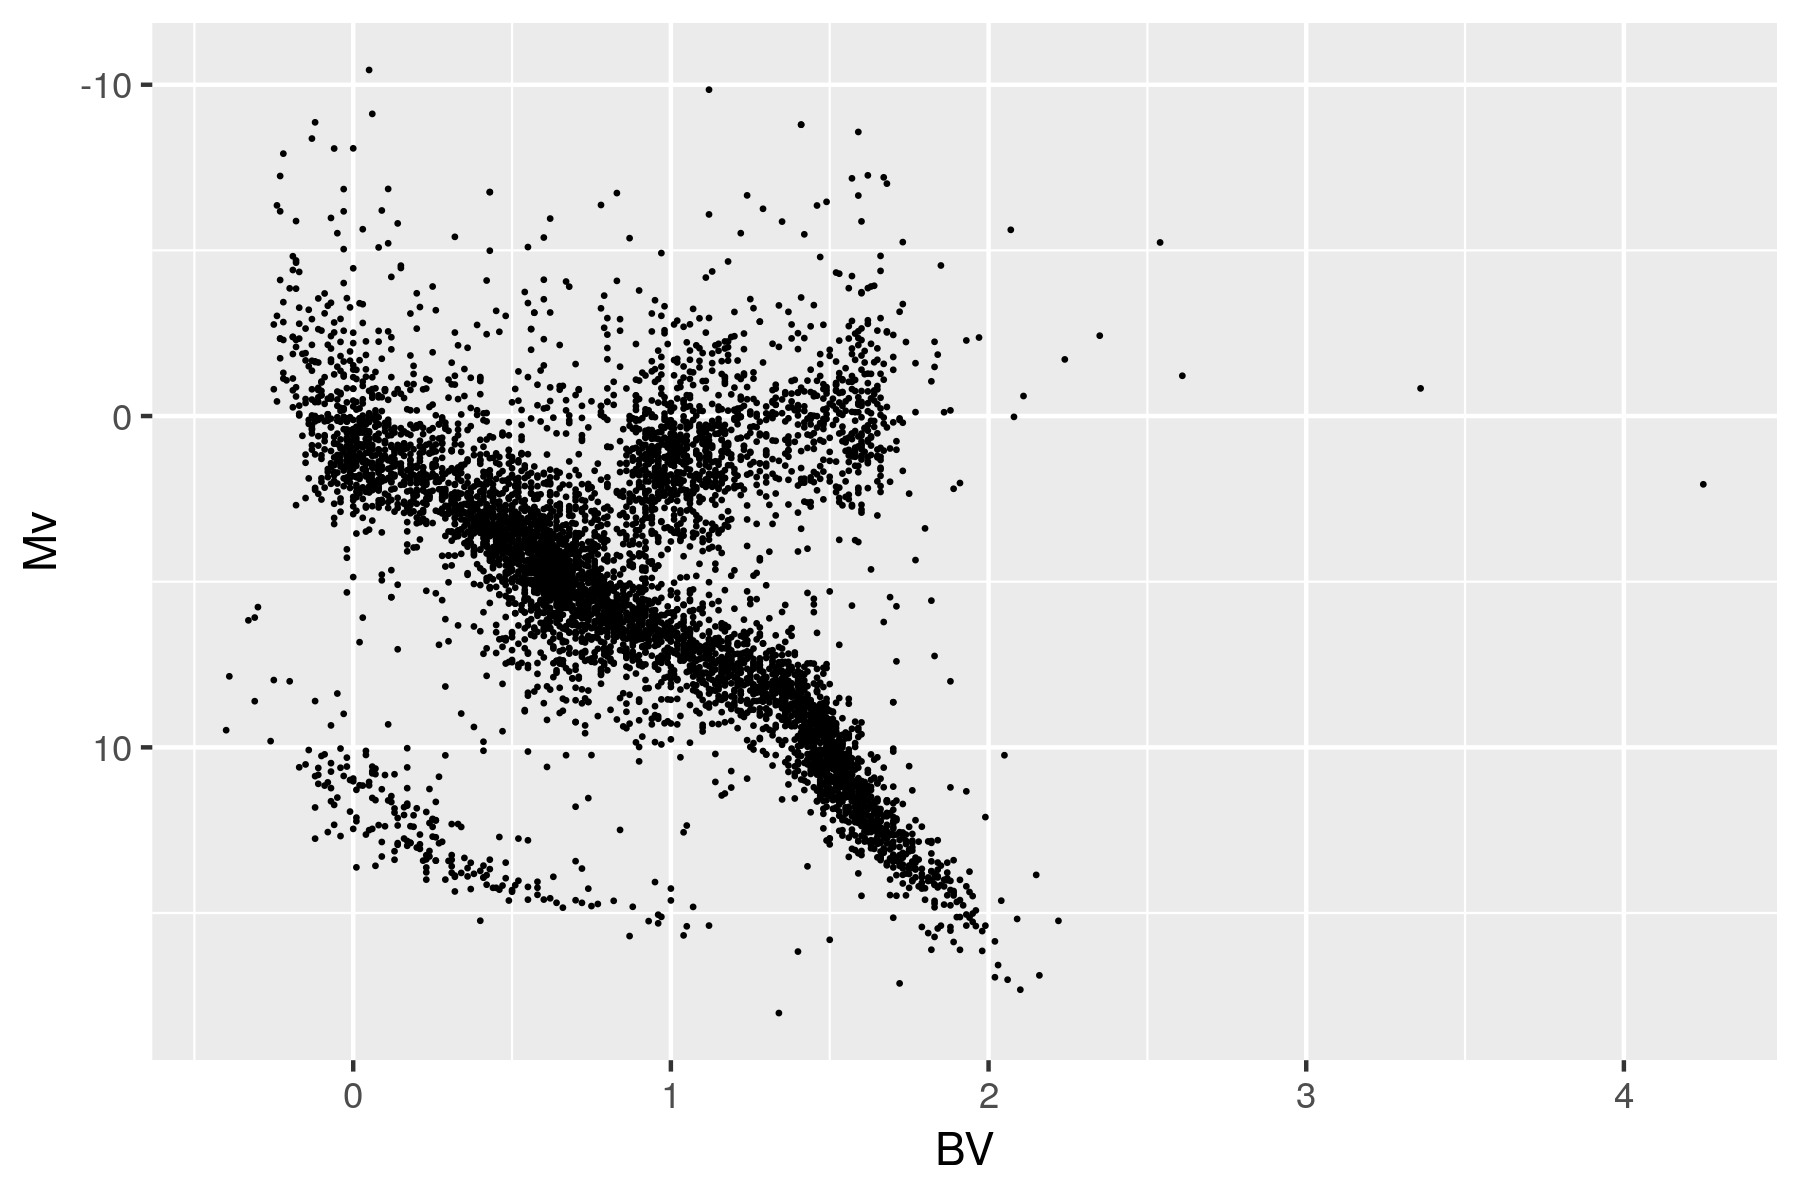

In [123]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

ggplot(hr,aes(y=Mv,x=BV))+geom_point(size=0.1)+scale_y_reverse()

In [127]:
library(dbscan)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [124]:
hr$norm_Mv=(hr$Mv-mean(hr$Mv))/sd(hr$Mv)
hr$norm_BV=(hr$BV-mean(hr$BV))/sd(hr$BV)

In [125]:
summary(hr)

       id             mv              BV             parallax     
 Min.   :   3   Min.   :-1.46   Min.   :-0.4000   Min.   :0.0001  
 1st Qu.:1384   1st Qu.: 5.22   1st Qu.: 0.5200   1st Qu.:0.0151  
 Median :2860   Median : 7.40   Median : 0.8900   Median :0.0276  
 Mean   :2844   Mean   : 8.00   Mean   : 0.8866   Mean   :0.0361  
 3rd Qu.:4232   3rd Qu.:10.24   3rd Qu.: 1.3500   3rd Qu.:0.0458  
 Max.   :5822   Max.   :18.06   Max.   : 4.2500   Max.   :0.7698  
     error            parsec                Mv             norm_Mv        
 Min.   :  4.00   Min.   :    1.299   Min.   :-10.445   Min.   :-3.48834  
 1st Qu.: 61.00   1st Qu.:   21.834   1st Qu.:  1.619   1st Qu.:-0.75396  
 Median : 95.00   Median :   36.232   Median :  4.532   Median :-0.09362  
 Mean   : 97.52   Mean   :   94.885   Mean   :  4.945   Mean   : 0.00000  
 3rd Qu.:137.00   3rd Qu.:   66.225   3rd Qu.:  8.063   3rd Qu.: 0.70664  
 Max.   :643.00   Max.   :10000.000   Max.   : 18.020   Max.   : 2.96359  
    no

DBSCAN clustering for 6219 objects.
Parameters: eps = 0.09, minPts = 30
The clustering contains 3 cluster(s) and 2269 noise points.

   0    1    2    3 
2269 3147  386  417 

Available fields: cluster, eps, minPts

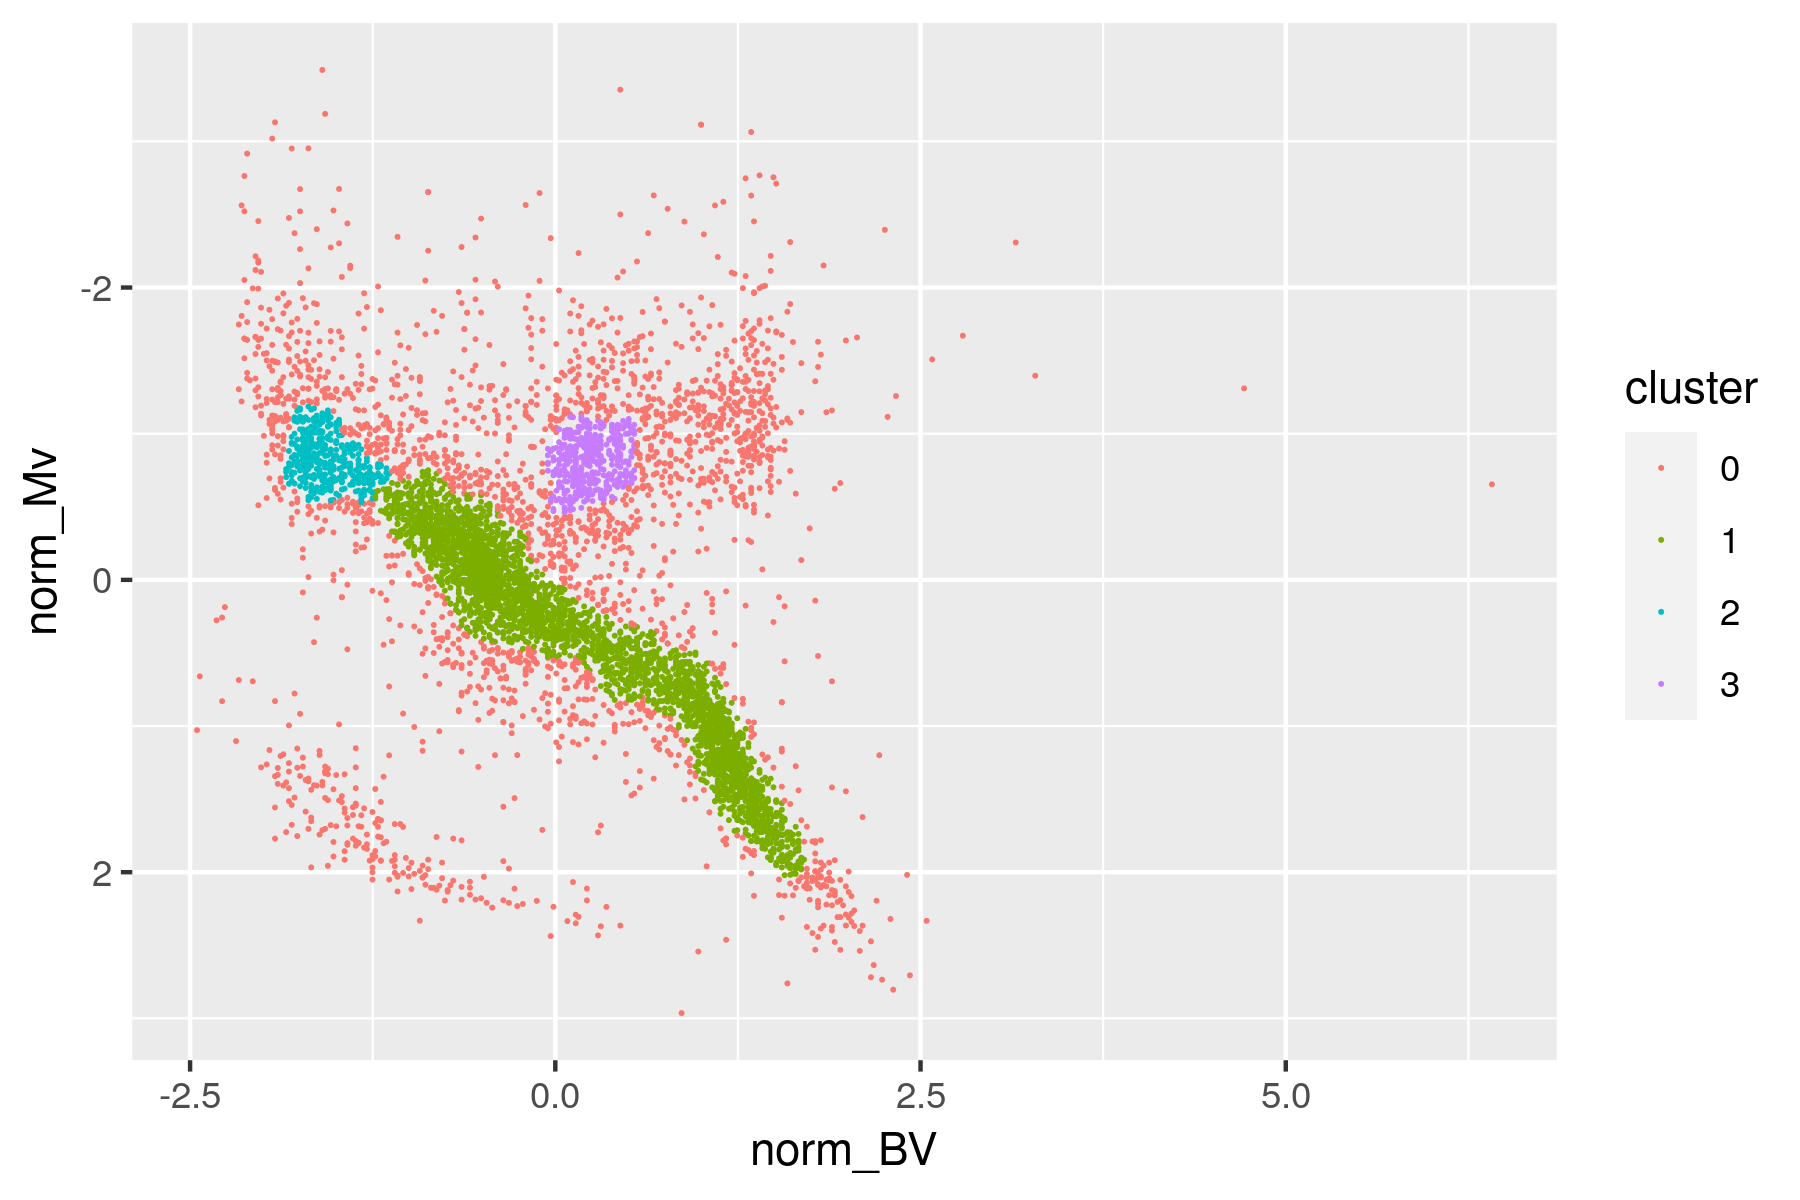

In [133]:
hr_cl<-dbscan(hr[,c("norm_Mv","norm_BV")], minPts = 30,eps=0.09, borderPoints=TRUE)
hr_cl
hr$cluster<-as.factor(hr_cl$cluster)
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster))+geom_point(size=0.01)+scale_y_reverse()

Warning message in hullplot(hr[, c("norm_Mv", "norm_BV")], hr_cl):
“Not enough colors. Some colors will be reused.”


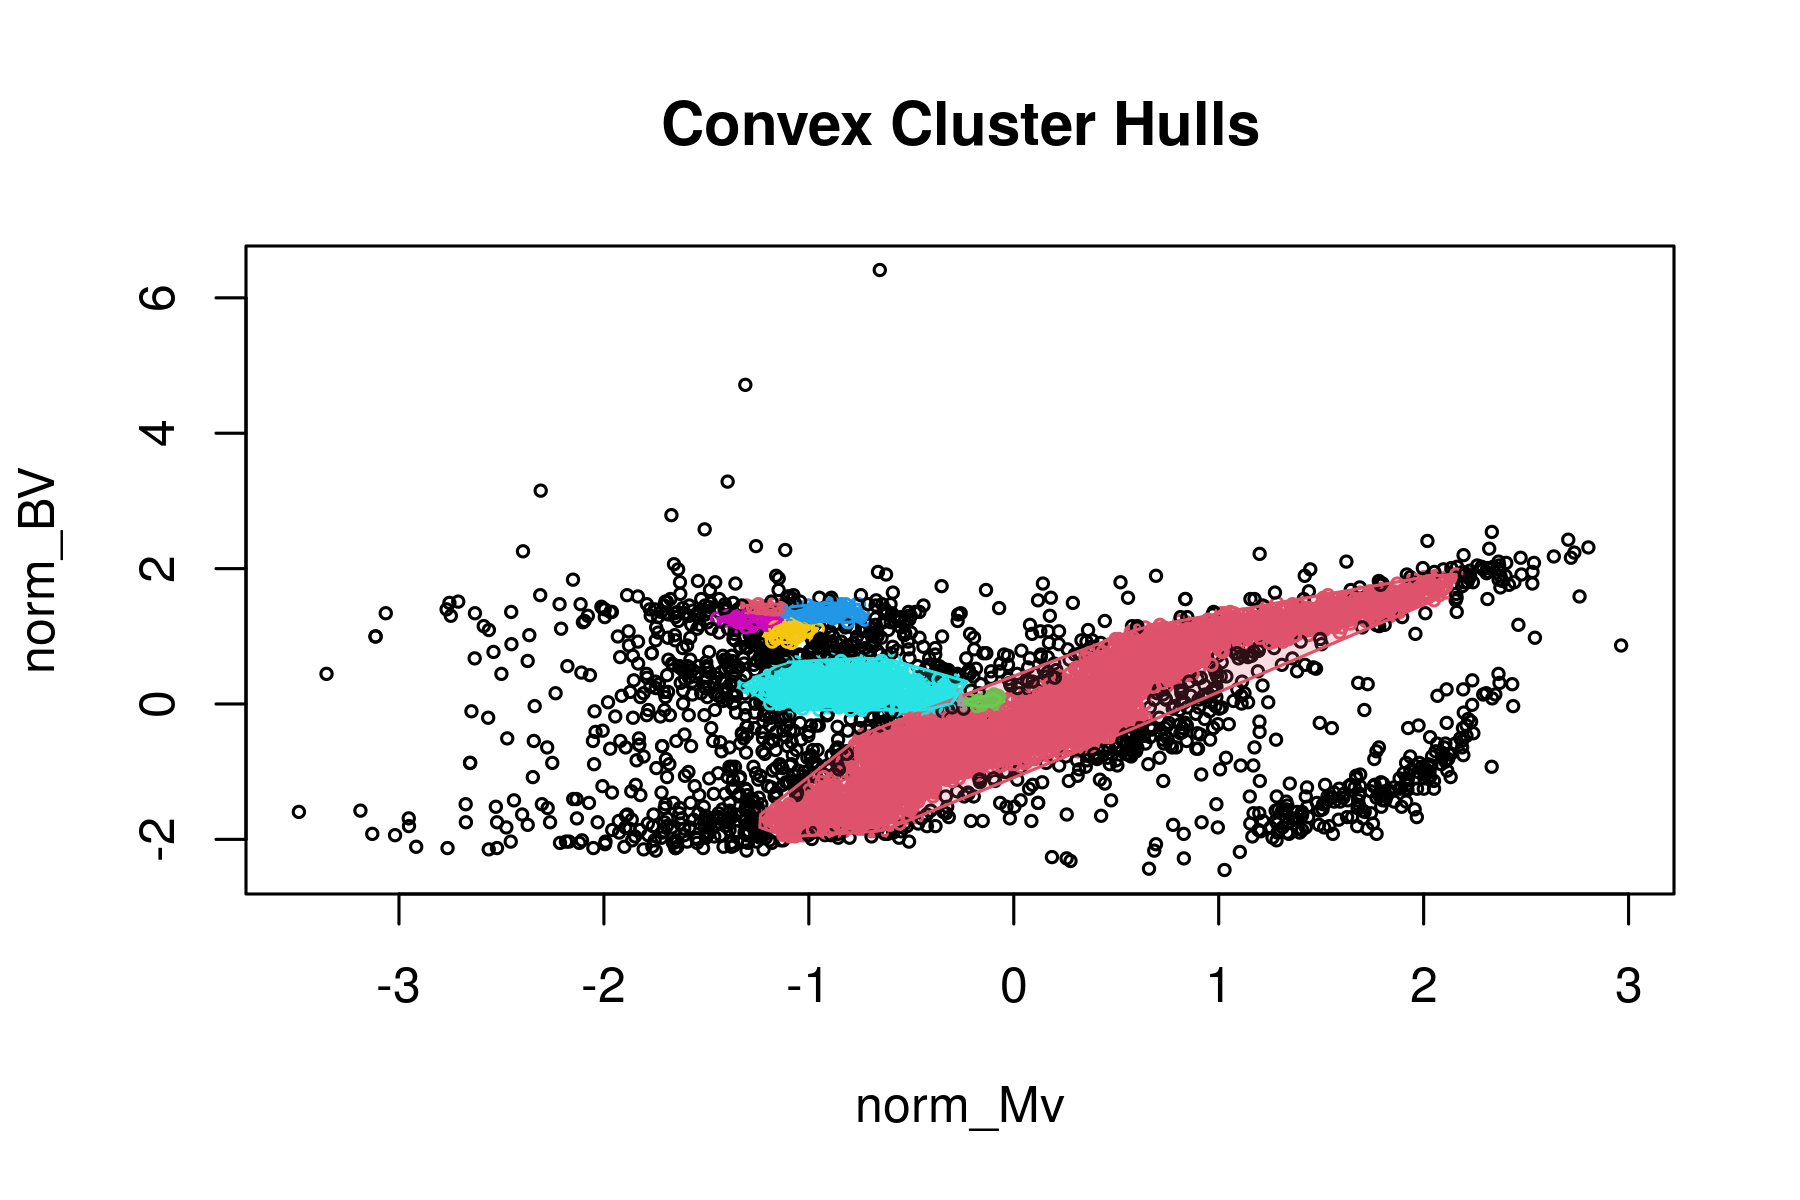

In [129]:
hullplot(hr[,c("norm_Mv","norm_BV")],hr_cl)

kNNdist devuelve un vector con la distancia a los k elementos más cercanos de cada punto:

In [130]:
k30_dist <- hr %>% select(norm_Mv,norm_BV) %>% kNNdist(k=30) 
head(cbind(hr,k30_dist))

id mv   BV   parallax error parsec   Mv       norm_Mv     norm_BV    cluster
1 3  8.45 1.05 0.0717   113   13.94700 7.727596  0.63070816  0.3115325 1      
2 4  9.01 1.44 0.0886    23   11.28668 8.747169  0.86180930  1.0549348 1      
3 6  8.60 0.94 0.0147    55   68.02721 4.436587 -0.11524733  0.1018549 2      
4 7  5.96 0.67 0.0455    50   21.97802 4.250057 -0.15752702 -0.4128082 1      
5 7  6.43 0.64 0.0455    50   21.97802 4.720057 -0.05099463 -0.4699930 1      
6 8  5.70 0.52 0.0495    97   20.20202 4.173026 -0.17498722 -0.6987321 1      
  k30_dist  
1 0.09636325
2 0.05858586
3 0.14865610
4 0.05946376
5 0.04528637
6 0.05934106

El codo en la curva de lo valores de kNNdist nos puede dar una zona en la que el valor de eps de mejores resultados:

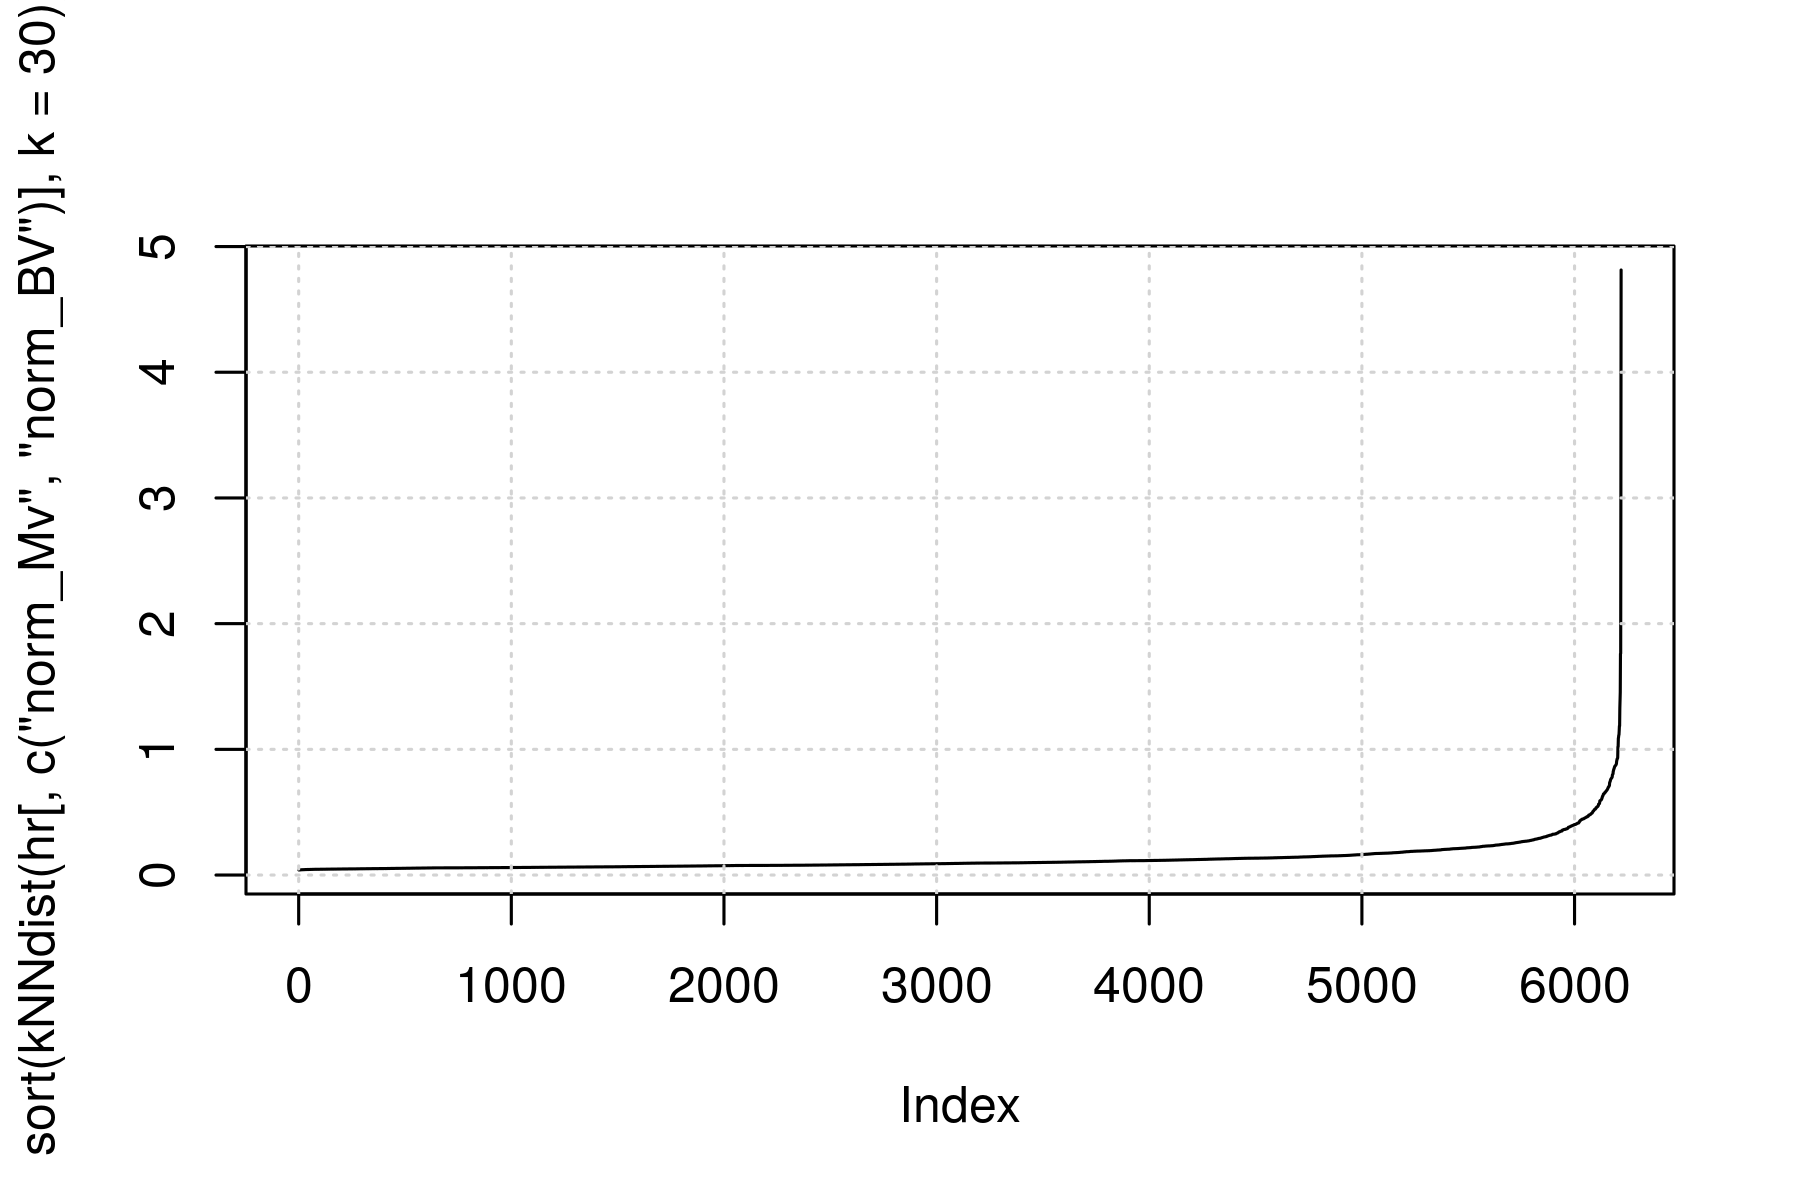

In [134]:
plot(sort(kNNdist(hr[,c("norm_Mv","norm_BV")], k=30)),t='l')
grid()

DBSCAN clustering for 6219 objects.
Parameters: eps = 0.3, minPts = 30
The clustering contains 2 cluster(s) and 178 noise points.

   0    1    2 
 178 5871  170 

Available fields: cluster, eps, minPts

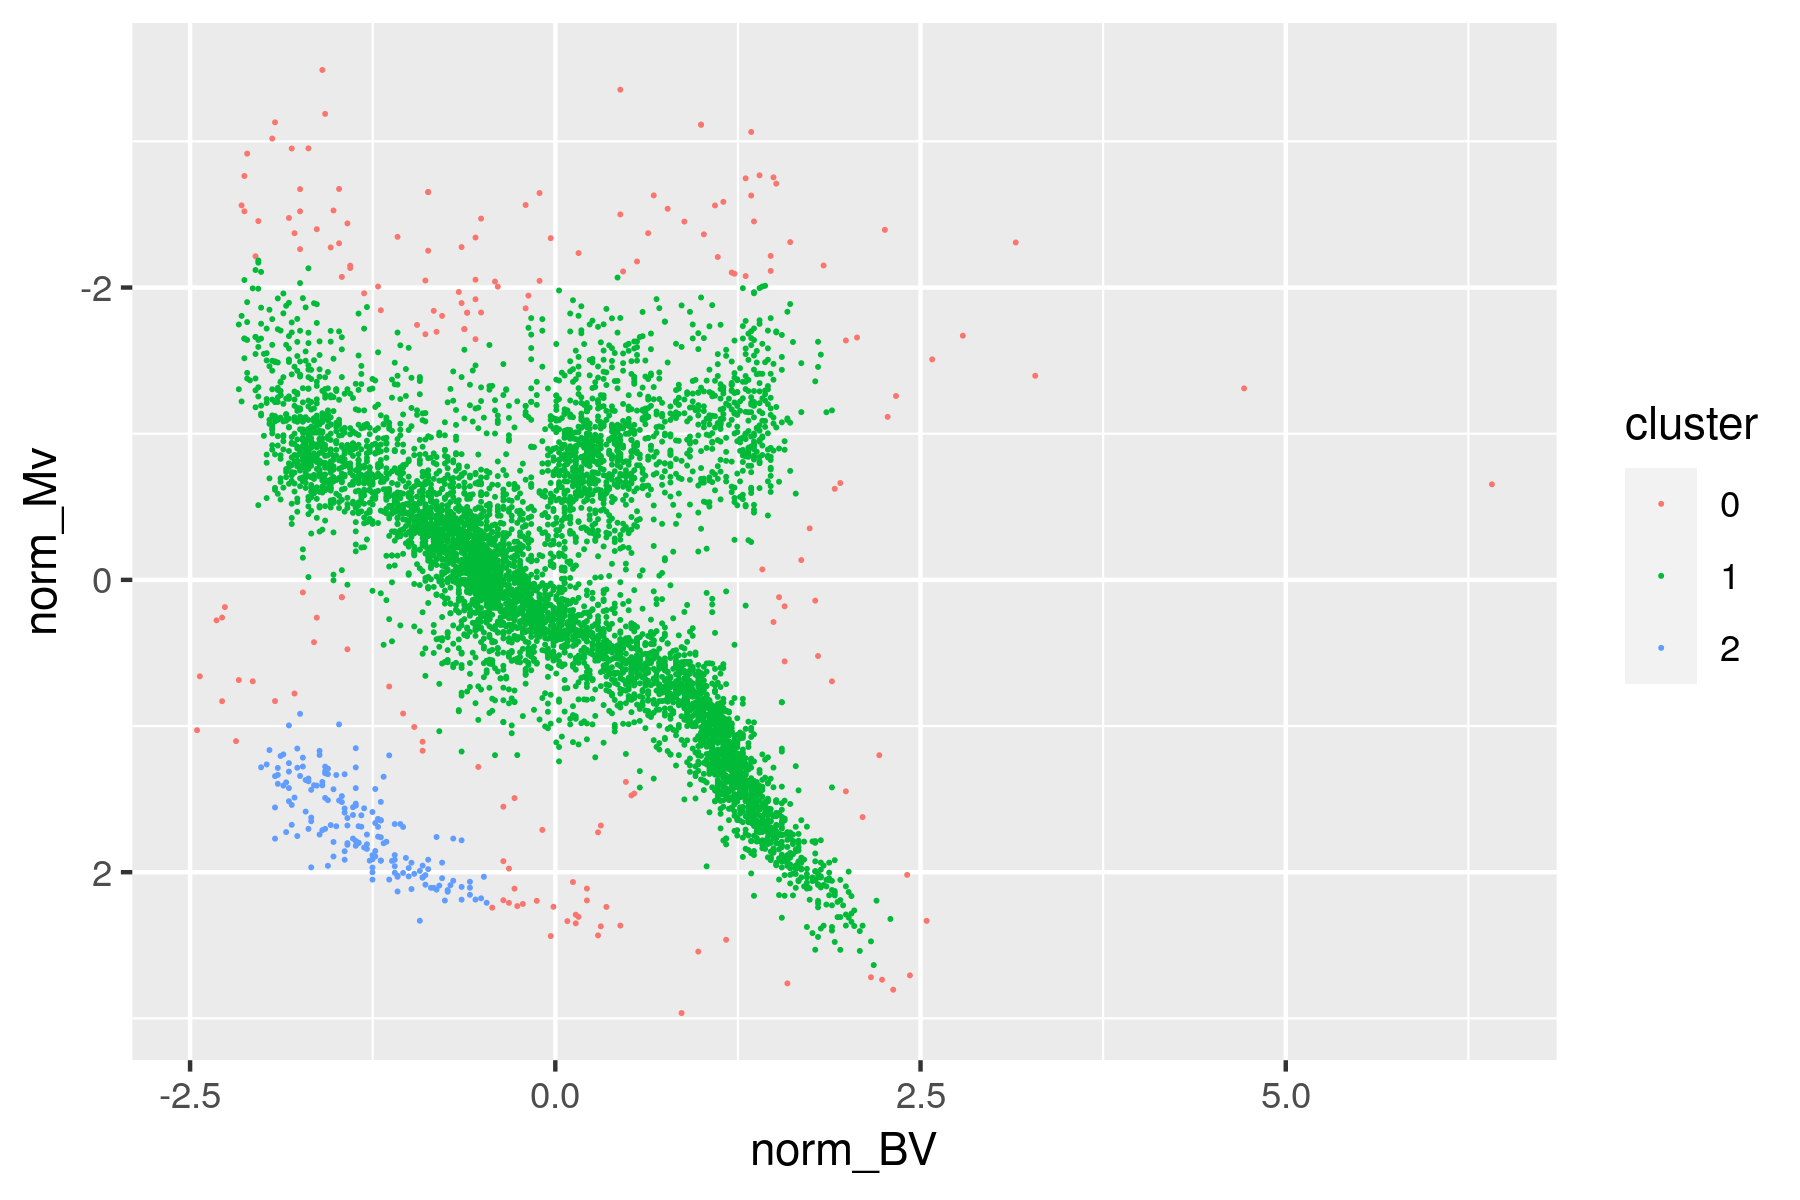

In [135]:
hr_cl<-dbscan(hr[,c("norm_Mv","norm_BV")], minPts = 30,eps=0.3, borderPoints=TRUE)
hr_cl
hr$cluster<-as.factor(hr_cl$cluster)
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster))+geom_point(size=0.01)+scale_y_reverse()

### Ejemplo dataset Iris

In [136]:
data(iris)

preproc<-caret::preProcess(iris[,1:4], method = c("center", "scale"))
iris_norm<-predict(preproc,iris[,1:4])
summary(iris_norm)

  Sepal.Length       Sepal.Width       Petal.Length      Petal.Width     
 Min.   :-1.86378   Min.   :-2.4258   Min.   :-1.5623   Min.   :-1.4422  
 1st Qu.:-0.89767   1st Qu.:-0.5904   1st Qu.:-1.2225   1st Qu.:-1.1799  
 Median :-0.05233   Median :-0.1315   Median : 0.3354   Median : 0.1321  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.67225   3rd Qu.: 0.5567   3rd Qu.: 0.7602   3rd Qu.: 0.7880  
 Max.   : 2.48370   Max.   : 3.0805   Max.   : 1.7799   Max.   : 1.7064  

Buscamos el valor de eps mirando la distancia de cada muestra a sus 4 vecinos más próximos: 

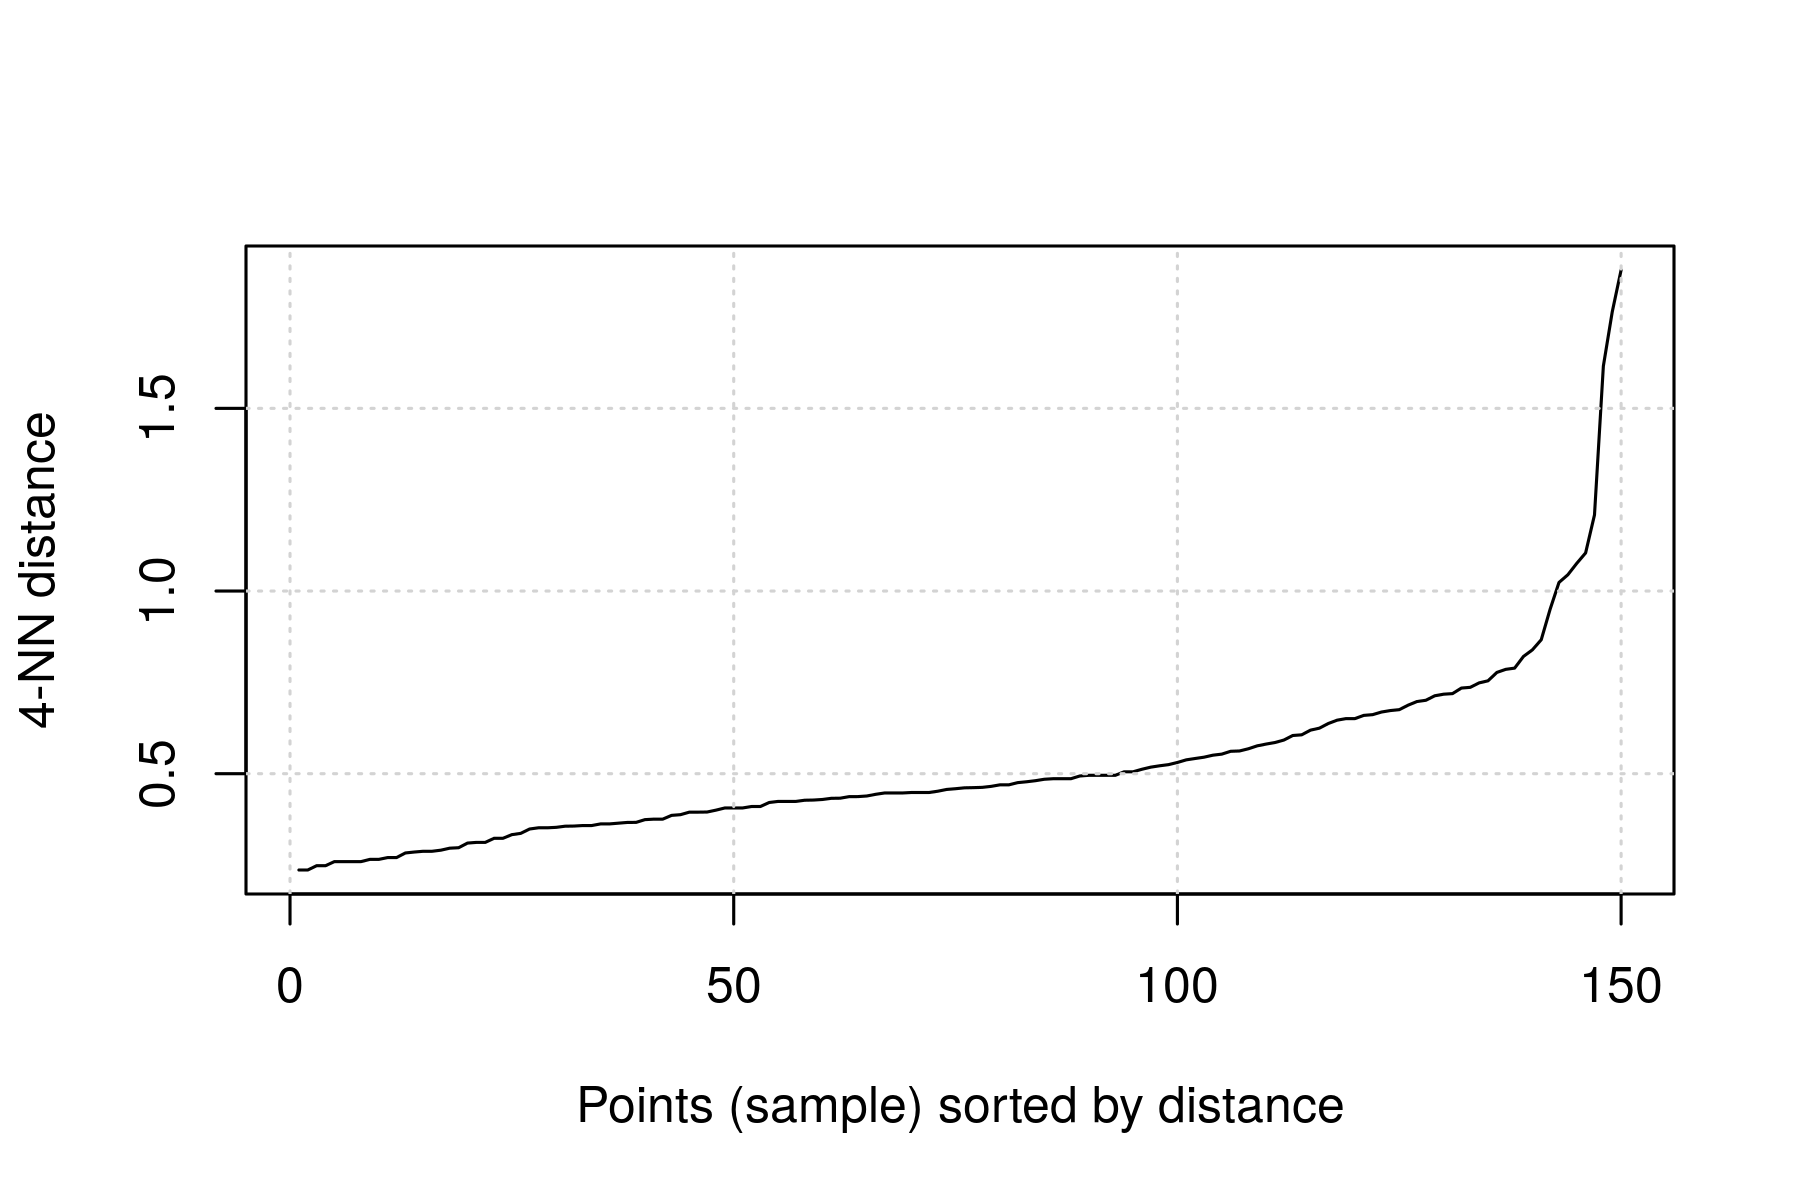

In [137]:
kNNdistplot(iris_norm, k=4)
grid()

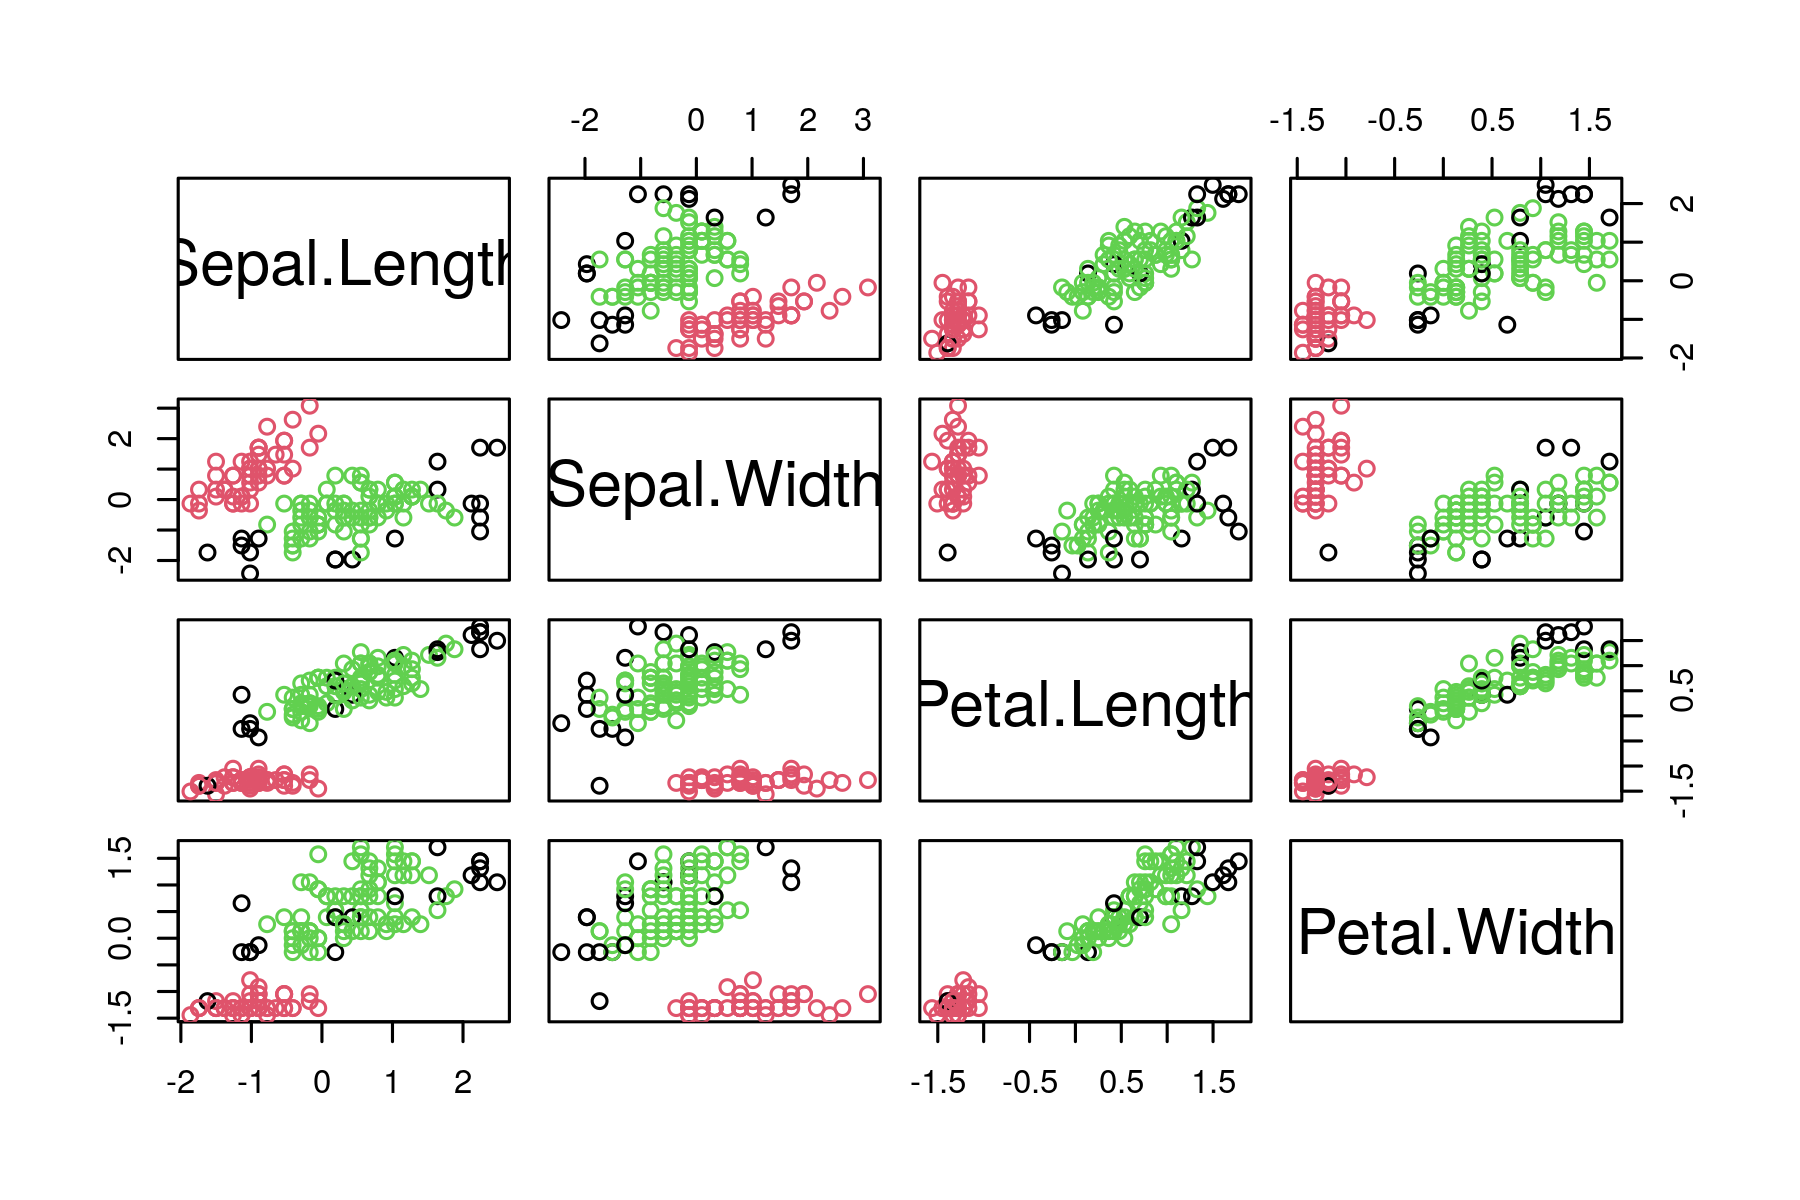

In [138]:
cl <- dbscan(iris_norm, eps = 0.6, minPts = 4)
pairs(iris_norm, col = cl$cluster+1L)

In [139]:
df=data.frame(dist=kNNdist(iris_norm,k=4),
              cl=as.factor(cl$cluster),
              sp=iris$Species)
table(df$cl,df$sp)

   
    setosa versicolor virginica
  0      1          6        11
  1     49          0         0
  2      0         44        39

In [ ]:
head(df)

In [140]:
library(dplyr)
df %>% group_by(cl) %>% summarize(mean(dist))

cl mean(dist)
1 0  0.9844577 
2 1  0.4015259 
3 2  0.4932574

## Hiercarchical DBSCAN (HDBSCAN)

HDBSCAN esencialmente calcula la jerarquía de todos los clústeres de DBSCAN* para un *minPts* dato, y luego utiliza una estabilidad basada método de extracción para encontrar cortes óptimos en la jerarquía, por lo tanto produciendo una solución plana.
      
Hay que tener en cuenta que *minPts* no solo actúa como un tamaño mínimo de clúster para detectar, pero también como un factor de suavizado de las estimaciones de densidad calculado implícitamente desde HDBSCAN.

https://cran.r-project.org/web/packages/dbscan/vignettes/hdbscan.html

In [ ]:
set.seed(123)
N<-1000
x<-c(rnorm(N,mean=1,sd=0.5),rnorm(N,mean=3.5,sd=0.5),rnorm(2*N,mean=8,sd=1))
df <- data.frame(x=x,y=runif(length(x)))
head(df)

In [ ]:
library(ggplot2)
options(repr.plot.height=2,repr.plot.width=6,repr.plot.res = 300)

ggplot(df,aes(x=x,y=y))+geom_point(size=0.1)+geom_density2d(h=c(1,2))

In [ ]:
ggplot(df,aes(x=x))+geom_density(bw=0.15)

In [ ]:
library(dbscan)
minPts <- 500

cl <- hdbscan(df[,c("x","y")], minPts = minPts,gen_simplified_tree=TRUE,gen_hdbscan_tree=TRUE)

HDBSCAN no es más que una ejecución de dbscan* para diferentes valores de epsilon.

Vamos a demostrarlo a continuación:

In [ ]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

plot(cl$hc)

In [ ]:
## cutree doesn't distinguish noise as 0, so we make a new method to do it manually 
cut_tree <- function(hcl, eps, core_dist){
  cuts <- cutree(hcl, h=eps)
  cuts[which(core_dist > eps)] <- 0 # Use core distance to distinguish noise
  cuts
}
core_dist <- kNNdist(df[,c("x","y")], k=cl$minPts-1)
plot(sort(core_dist),t='l')
options(repr.plot.height=2,repr.plot.width=6,repr.plot.res = 300)

In [ ]:
eps_value=0.7
#eps_value=1.2
#eps_value=1.5

cut_cl <- cut_tree(cl$hc, eps_value, core_dist)

dbscan_cl <- dbscan(df[,c("x","y")], eps = eps_value, minPts = minPts, borderPoints = F) # DBSCAN* doesn't include border points

(all.equal(rle(cut_cl)$lengths, rle(dbscan_cl$cluster)$lengths) == "TRUE")
# Ejemplo de como funciona rle
#c(rep(6:10, 1:5),6,6)
#rle(c(rep(6:10, 1:5),6,6))

In [ ]:
#cut_cl<-cutree(cl$hc, h=1.2)
table(cut_cl)
table(dbscan_cl$cluster)

In [ ]:

df$cluster<-factor(cut_cl)
#df$cluster<-factor(dbscan_cl$cluster)
ggplot(df,aes(x=x,y=y,color=cluster))+geom_point(size=0.1)

#### Estabilidad de clusters

In [ ]:
cl <- hdbscan(df[,c("x","y")], minPts = minPts,gen_simplified_tree=TRUE,gen_hdbscan_tree=TRUE)
cl

In [ ]:
df$cluster<-as.factor(cl$cluster)
options(repr.plot.height=2,repr.plot.width=6,repr.plot.res = 300)
ggplot(df,aes(x=x,y=y,color=cluster))+geom_point(size=0.1)

Para calcular la estabilidad definimos $\lambda=\frac{1}{\varepsilon}$. Suponiendo que vamos probando con valores $\varepsilon$ decrecientes, lo que equivale a $\lambda$ creciente. Para un cluster podemos definir los valores $\lambda_{birth}$ y $\lambda_{death}$ como el valor de $\lambda$ en el cual el cluster aparece (como división de un cluster mayor) y desaparece al dividirse en clusters más pequeños.

Podemos definir $\lambda_p$ como el valor en el intervalo $[\lambda_{birth},\lambda_{death}]$ en el cual el punto $p$ se escapa del cluster estudiado. 

Se define la estabilidad de un cluster como:
\\[
\sum_p\in{cluster} (\lambda_p - \lambda_{birth})
\\]

Finalmente se hace un recorrido de abajo a arriba del arbol. Empezando por las hojas calculamos la estabilidad de cada uno de los clusters que van saliendo a medida que subimos (disminuimos $\lambda$):

* Si estabilidad cluster >= suma estabilidad hijos : Dejamos la estabilidad del cluster como está
* Si estabilidad cluster <  suma estabilidad hijos : Definimos la estabilid del cluster como la suma de estabilidad de los hijos.

En estos diagramas se ve mejor. La anchura representa el número de puntos que hay en cada cluster en cada momento para un $\varepsilon$ dado. El área representa su estabilidad. El cluster óptimo que devuelve HDBSCAN es aquellos cuyos clusters tengan un mayor area.

En esos clusters de mayor area, se normaliza el valor $\lambda_p$ entre [0,1] para ver el grado de afinidad del punto $p$ a su cluster. Ese valor se almacena en *membership_prob*.

In [ ]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

plot(cl, show_flat = T)

In [ ]:
print(cl$cluster_scores)

In [ ]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

cl <- hdbscan(df[,c("x","y")], minPts = 20,gen_simplified_tree=TRUE,gen_hdbscan_tree=TRUE)
cl
plot(cl, show_flat = T,scale=3)

In [ ]:
print(cl$cluster_scores)

### Ejemplo con diagrama H-R

In [ ]:
cl <- hdbscan(hr[,c("norm_Mv","norm_BV")], minPts = 30,gen_simplified_tree=TRUE,gen_hdbscan_tree=TRUE)
cl

In [ ]:
hr$cluster<-as.factor(cl$cluster)
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster))+geom_point(size=0.01)+scale_y_reverse()

In [ ]:
plot(cl)

In [ ]:
plot(cl,  scale=3, show_flat = T)

In [ ]:
print(cl$cluster_scores)

In [ ]:
hr$cluster<-as.factor(cl$cluster)
hr$membership_prob <- cl$membership_prob
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster,alpha=membership_prob))+geom_point(size=0.01)+scale_y_reverse()

In [ ]:
cl <- hdbscan(hr[,c("norm_Mv","norm_BV")], minPts = 7,gen_simplified_tree=TRUE,gen_hdbscan_tree=TRUE)
hr$cluster<-as.factor(cl$cluster)
hr$membership_prob <- cl$membership_prob
ggplot(hr,aes(y=norm_Mv,x=norm_BV,color=cluster,alpha=membership_prob))+geom_point(size=0.01)+scale_y_reverse()

In [ ]:
plot(cl)